# PRUEBA TÉCNICA - EXPERIMENTALITY

In [1]:
import pandas as pd 
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import json

In [2]:
dict_categoria = {1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 
                 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23:'Comedy', 24: 'Entertainment', 
                 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 30: 'Movies', 31: 'Anime/Animation',
                 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family',
                 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 
                 44: 'Trailers'}

#### Se identificó las mismas categorías e id para todos los países 

In [3]:
with open('CA_category_id.json', 'rb') as f:
    category_Ca = json.load(f)

category_Ca

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [4]:
with open('RU_category_id.json', 'rb') as f:
    category_Ru = json.load(f)

category_Ru

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

## CANADA

In [5]:
canada = pd.read_csv('CAvideos.csv')
canada.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Eminem's new track Walk on Water ft. Beyoncé i...  
1  STill got a lot of packages. Probably will las...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  I know it's been a while since we did this sho...  
4  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...

In [6]:
canada = canada.drop(['thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description'], axis = 1)

In [7]:
canada['category_name'] = canada['category_id'].apply(lambda x: dict_categoria.get(x, 'NaN'))

In [8]:
canada['trending_date'] = pd.to_datetime(pd.Series(canada['trending_date'].apply(lambda x:'20'+x[0:2]+'.'+x[6:]+'.'+x[3:5])))
canada['publish_time'] = pd.to_datetime(pd.Series(canada['publish_time'].apply(lambda x:x[:19])))

In [9]:
df_canada = canada.copy()
df_canada.head()

video_id trending_date  \
0  n1WpP7iowLc    2017-11-14   
1  0dBIkQ4Mz1M    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   
3  d380meD0W0M    2017-11-14   
4  2Vv-BfVoq4g    2017-11-14   

                                               title channel_title  \
0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id        publish_time  \
0           10 2017-11-10 17:00:03   
1           23 2017-11-13 17:00:00   
2           23 2017-11-12 19:05:24   
3           24 2017-11-12 18:01:41   
4           10 2017-11-09 11:04:14   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count  category_name  
0     43420         125882          Music  
1      1688          13030         Comedy  
2      5339           8181         Comedy  
3      1989          17518  Entertainment  
4     21082          85067          Music

In [10]:
df_canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   video_id       40881 non-null  object        
 1   trending_date  40881 non-null  datetime64[ns]
 2   title          40881 non-null  object        
 3   channel_title  40881 non-null  object        
 4   category_id    40881 non-null  int64         
 5   publish_time   40881 non-null  datetime64[ns]
 6   tags           40881 non-null  object        
 7   views          40881 non-null  int64         
 8   likes          40881 non-null  int64         
 9   dislikes       40881 non-null  int64         
 10  comment_count  40881 non-null  int64         
 11  category_name  40881 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 3.7+ MB


In [11]:
df_canada.isnull().sum()

video_id         0
trending_date    0
title            0
channel_title    0
category_id      0
publish_time     0
tags             0
views            0
likes            0
dislikes         0
comment_count    0
category_name    0
dtype: int64

In [12]:
df_canada.describe(include="object")

video_id                                title channel_title  \
count         40881                                40881         40881   
unique        24427                                24573          5076   
top     VYOjWnS4cMY  Drake - God's Plan (Official Audio)     SET India   
freq              8                                   15           192   

          tags  category_name  
count    40881          40881  
unique   20157             17  
top     [none]  Entertainment  
freq      2385          13451

- Mostrar que contenido se ve en el país

In [13]:
df_canada['category_name'].unique()

array(['Music', 'Comedy', 'Entertainment', 'News & Politics',
       'People & Blogs', 'Howto & Style', 'Film & Animation',
       'Science & Technology', 'Gaming', 'Sports', 'NaN',
       'Pets & Animals', 'Travel & Events', 'Autos & Vehicles',
       'Education', 'Shows', 'Movies'], dtype=object)

## Contenido viral

In [14]:
views_media = df_canada['views'].mean() 
print(views_media)
likes_media = df_canada['likes'].mean()
print(likes_media)
comments_media = df_canada['comment_count'].mean()
print(comments_media)

1147035.9107898534
39582.68824148137
5042.974707076637


In [15]:
viralCa = df_canada[(df_canada['views'] > views_media) & (df_canada['likes'] > likes_media) & (df_canada['comment_count'] > comments_media)]
viralCa.iloc[:50]

video_id trending_date  \
0    n1WpP7iowLc    2017-11-14   
2    5qpjK5DgCt4    2017-11-14   
3    d380meD0W0M    2017-11-14   
4    2Vv-BfVoq4g    2017-11-14   
5    0yIWz1XEeyc    2017-11-14   
6    _uM5kFfkhB8    2017-11-14   
8    JzCsM1vtn78    2017-11-14   
10   H1KBHFXm2Bg    2017-11-14   
13   7MxiQ4v0EnE    2017-11-14   
23   PRlmRnU9qts    2017-11-14   
32   V4Uuxg6jmbo    2017-11-14   
40   GBVxEpQr8R8    2017-11-14   
44   9fNvbeBLwGc    2017-11-14   
48   exMNBvwCfRY    2017-11-14   
49   c64I9HNpiOY    2017-11-14   
55   9t9u_yPEidY    2017-11-14   
87   k3kgQrU5-p0    2017-11-14   
90   6p-QzY5bxJ0    2017-11-14   
103  kOnQocd799Y    2017-11-14   
122  ujyTQNNjjDU    2017-11-14   
156  3t2jdkDBfPc    2017-11-14   
164  0PpNlNJ6Nng    2017-11-14   
200  0dBIkQ4Mz1M    2017-11-15   
204  kgaO45SyaO4    2017-11-15   
214  n1WpP7iowLc    2017-11-15   
218  2kyS6SvSYSE    2017-11-15   
219  5qpjK5DgCt4    2017-11-15   
227  d380meD0W0M    2017-11-15   
240  oP-6Z1RlaIc    2017-11-15   
244  _uM5kFfkhB8    2017-11-15   
252  JzCsM1vtn78    2017-11-15   
258  H1KBHFXm2Bg    2017-11-15   
282  2Vv-BfVoq4g    2017-11-15   
305  PRlmRnU9qts    2017-11-15   
351  V4Uuxg6jmbo    2017-11-15   
374  9t9u_yPEidY    2017-11-15   
381  9fNvbeBLwGc    2017-11-15   
395  c64I9HNpiOY    2017-11-15   
400  8-Cjsnq8kVU    2017-11-16   
401  kgaO45SyaO4    2017-11-16   
406  5530I_pYjbo    2017-11-16   
407  0dBIkQ4Mz1M    2017-11-16   
410  sottGW1p5os    2017-11-16   
413  bAkEd8r7Nnw    2017-11-16   
418  Ax1P5Q8Kr9g    2017-11-16   
419  cmoknv58jjE    2017-11-16   
420  ve3oQBjcAGI    2017-11-16   
424  n2K4II8N6r4    2017-11-16   
438  Ehke7aPI9l0    2017-11-16   
448  5qpjK5DgCt4    2017-11-16   

                                                 title  \
0           Eminem - Walk On Water (Audio) ft. Beyoncé   
2    Racist Superman | Rudy Mancuso, King Bach & Le...   
3                             I Dare You: GOING BALD!?   
4          Ed Sheeran - Perfect (Official Music Video)   
5    Jake Paul Says Alissa Violet CHEATED with LOGA...   
6               Vanoss Superhero School - New Students   
8                 THE LOGANG MADE HISTORY. LOL. AGAIN.   
10     21 Savage - Bank Account (Official Music Video)   
13   Daang ( Full Video ) | Mankirt Aulakh | Sukh S...   
23   Jake Paul - Saturday Night (Song) feat. Nick C...   
32            The Try Guys Bake Bread Without A Recipe   
40                  ON VOUS DÉVOILE NOTRE VRAI SALAIRE   
44   HOLIDAY 2017 ⭐️ COLLECTION & SKIN FROST PALETT...   
48                        LES PIRES DOUBLAGES FRANÇAIS   
49   Padmavati : Ek Dil Ek Jaan Video Song | Deepik...   
55   Jennifer Lopez - Amor, Amor, Amor (Official Vi...   
87   Transforming a Homeless Mans Life... **SUPER E...   
90   The 'Stranger Things' Kids Were Nearly a Motow...   
103  Everything Wrong With Baby Driver In 14 Minute...   
122                 G-Eazy - The Plan (Official Video)   
156                       Switching to the iPhone X...   
164  Will It Watermarble?! Sister Edition | Waterma...   
200                      PLUSH - Bad Unboxing Fan Mail   
204                                   The New SpotMini   
214         Eminem - Walk On Water (Audio) ft. Beyoncé   
218                 WE WANT TO TALK ABOUT OUR MARRIAGE   
219  Racist Superman | Rudy Mancuso, King Bach & Le...   
227                           I Dare You: GOING BALD!?   
240  Triple H returns to join Team Raw at Survivor ...   
244             Vanoss Superhero School - New Students   
252               THE LOGANG MADE HISTORY. LOL. AGAIN.   
258    21 Savage - Bank Account (Official Music Video)   
282        Ed Sheeran - Perfect (Official Music Video)   
305  Jake Paul - Saturday Night (Song) feat. Nick C...   
351           The Try Guys Bake Bread Without A Recipe   
374  Jennifer Lopez - Amor, Amor, Amor (Official Vi...   
381  HOLIDAY 2017 ⭐️ COLLECTION & SKIN FROST PALETT...   
395  Padmavati : Ek Dil Ek Jaan Video Song | Deepik...   
400        

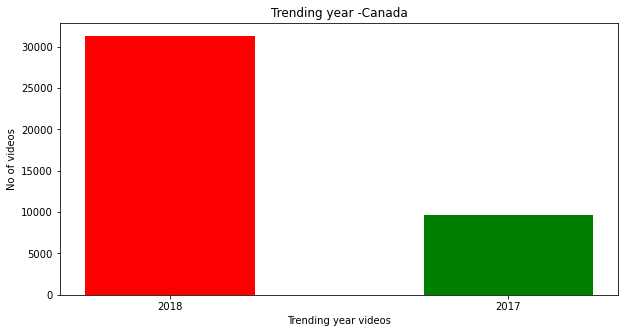

In [17]:
day=df_canada['trending_date'].dt.strftime('%Y')
total_dict=(day.value_counts()).to_dict()
count= pd.DataFrame(list(total_dict.items()),columns=['Trending year videos','No of videos'])

fig = plt.figure(figsize=(10,5))
plt.bar(count['Trending year videos'], count['No of videos'],color=['red', 'green'], width=0.5)
plt.xlabel("Trending year videos")
plt.ylabel("No of videos")
plt.title("Trending year -Canada")
plt.show()

<AxesSubplot:title={'center':'Contenido viral - Canada'}>

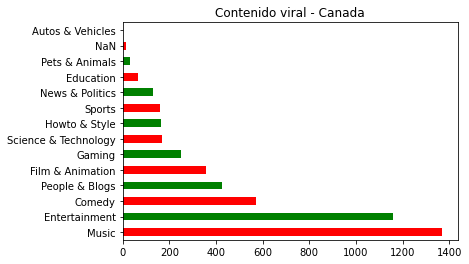

In [126]:
categoria = viralCa['category_name'].value_counts()
categoria.plot(kind='barh', title="Contenido viral - Canada",color=['red','green'])

<ipython-input-18-d38adf5c7abf>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  b = a['category_name','likes'].max()


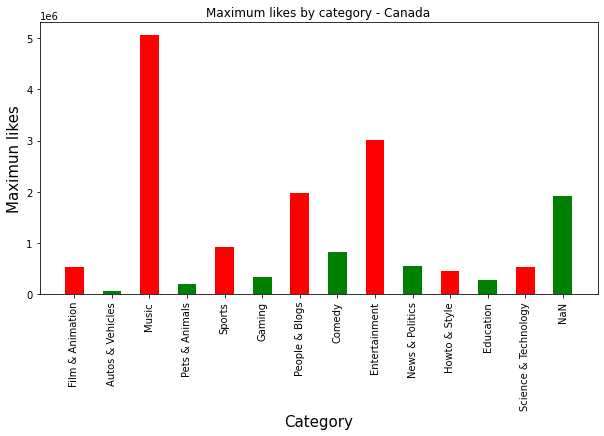

In [18]:
a = viralCa.groupby('category_id')
b = a['category_name','likes'].max()

fig=plt.figure(figsize=(10,5))
plt.bar(b['category_name'],b['likes'],color=['red','green'],width=0.5)
plt.xticks(rotation=90)
plt.xlabel("Category",size=15)
plt.ylabel("Maximun likes",size=15)
plt.title("Maximum likes by category - Canada")
plt.show()

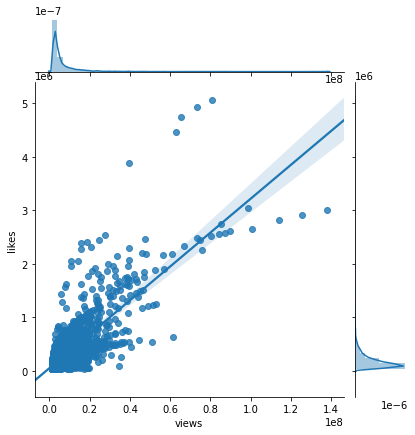

In [20]:
sns.jointplot(x='views', y='likes', data=viralCa,kind='reg')


#### Mostrar los principales canales

<function matplotlib.pyplot.show(close=None, block=None)>

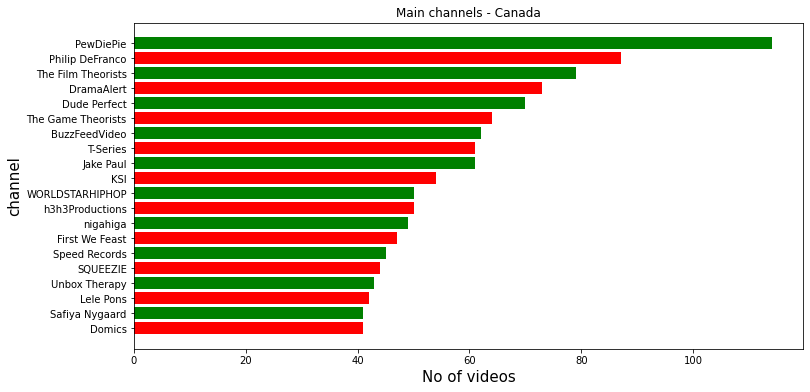

In [19]:
views_channels = viralCa.groupby('channel_title').size().reset_index(name="video_count").sort_values("video_count", ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('video_count')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['video_count'],color=['red','green'])
plt.xlabel("No of videos",size=15)
plt.ylabel("channel",size=15)
plt.title("Main channels - Canada")
plt.show

## Contenido polémico

In [21]:
polemicoCa = df_canada.sort_values(by = 'views', ascending = False)
polemicoCa.iloc[:50]

video_id trending_date  \
5900   FlsCjmMhFmw    2017-12-13   
5623   FlsCjmMhFmw    2017-12-12   
5398   FlsCjmMhFmw    2017-12-11   
5197   FlsCjmMhFmw    2017-12-10   
34361  VYOjWnS4cMY    2018-05-13   
4699   6ZfuNTqbHE8    2017-12-07   
4451   6ZfuNTqbHE8    2017-12-06   
34131  VYOjWnS4cMY    2018-05-12   
4202   6ZfuNTqbHE8    2017-12-05   
36453  7C2z4GqqS5E    2018-05-23   
3998   6ZfuNTqbHE8    2017-12-04   
4996   FlsCjmMhFmw    2017-12-09   
3798   6ZfuNTqbHE8    2017-12-03   
36153  7C2z4GqqS5E    2018-05-22   
33916  VYOjWnS4cMY    2018-05-11   
3598   6ZfuNTqbHE8    2017-12-02   
35900  7C2z4GqqS5E    2018-05-21   
35685  7C2z4GqqS5E    2018-05-20   
22029  _I_D_8Z4sJE    2018-03-06   
33714  VYOjWnS4cMY    2018-05-10   
1712   TyHvyGVs42U    2017-11-22   
3398   6ZfuNTqbHE8    2017-12-01   
31796  u9Mv98Gr5pY    2018-04-30   
4795   FlsCjmMhFmw    2017-12-08   
31537  u9Mv98Gr5pY    2018-04-29   
17237  BhIEIO0vaBE    2018-02-10   
21783  _I_D_8Z4sJE    2018-03-05   
31317  u9Mv98Gr5pY    2018-04-28   
16967  BhIEIO0vaBE    2018-02-09   
39208  aJOTlE1K90k    2018-06-06   
20055  xpVfcZ0ZcFM    2018-02-24   
33514  VYOjWnS4cMY    2018-05-09   
1424   TyHvyGVs42U    2017-11-21   
25400  QwievZ1Tx-8    2018-03-23   
30900  ffxKSjUwKdU    2018-04-25   
31115  u9Mv98Gr5pY    2018-04-27   
25145  QwievZ1Tx-8    2018-03-22   
16762  BhIEIO0vaBE    2018-02-08   
23594  -BQJo3vK8O8    2018-03-14   
38801  xTlNMmZKwpA    2018-06-04   
24456  tCXGJQYZ9JA    2018-03-18   
11214  LsoLEjrDogU    2018-01-09   
24926  QwievZ1Tx-8    2018-03-21   
12683  dfnCAmr569k    2018-01-18   
16560  BhIEIO0vaBE    2018-02-07   
29630  DPxL7dO5XPc    2018-04-19   
21553  _I_D_8Z4sJE    2018-03-04   
24723  QwievZ1Tx-8    2018-03-20   
24177  tCXGJQYZ9JA    2018-03-17   
23394  -BQJo3vK8O8    2018-03-13   

                                                   title  \
5900   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
5623   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
5398   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
5197   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
34361  Childish Gambino - This Is America (Official V...   
4699   Marvel Studios' Avengers: Infinity War Officia...   
4451   Marvel Studios' Avengers: Infinity War Officia...   
34131  Childish Gambino - This Is America (Official V...   
4202   Marvel Studios' Avengers: Infinity War Officia...   
36453                BTS (방탄소년단) 'FAKE LOVE' Official MV   
3998   Marvel Studios' Avengers: Infinity War Officia...   
4996   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
3798   Marvel Studios' Avengers: Infinity War Officia...   
36153                BTS (방탄소년단) 'FAKE LOVE' Official MV   
33916  Childish Gambino - This Is America (Official V...   
3598   Marvel Studios' Avengers: Infinity War Officia...   
35900                BTS (방탄소년단) 'FAKE LOVE' Official MV   
35685                BTS (방탄소년단) 'FAKE LOVE' Official MV   
22029  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...   
33714  Childish Gambino - This Is America (Official V...   
1712           Luis Fonsi, Demi Lovato - Échame La Culpa   
3398   Marvel Studios' Avengers: Infinity War Officia...   
31796                      VENOM - Official Trailer (HD)   
4795   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
31537                      VENOM - Official Trailer (HD)   
17237                                    To Our Daughter   
21783  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...   
31317                      VENOM - Official Trailer (HD)   
16967                                    To Our Daughter   
39208              Maroon 5 - Girls Like You ft. Cardi B   
20055                                 Drake - God’s Plan   
33514  Childish Gambino - This Is America (Official V...   
1424           Luis Fonsi, Demi Lovato - Échame La Culpa   
25400  Marvel Studios' Avengers: Infinity War - Offic...   
30900               Ariana Grande - No Tears Left To Cry   
31115        

<AxesSubplot:title={'center':'Contenido polémico - Canada'}>

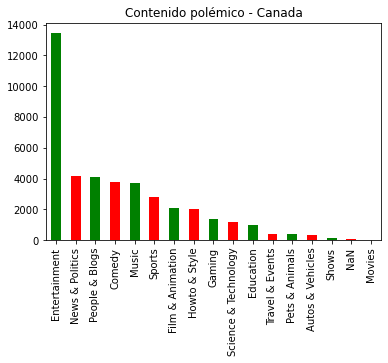

In [22]:
polemicoCa['category_name'].value_counts().plot(kind = "bar", title="Contenido polémico - Canada", color=['green','red'])

<function matplotlib.pyplot.show(close=None, block=None)>

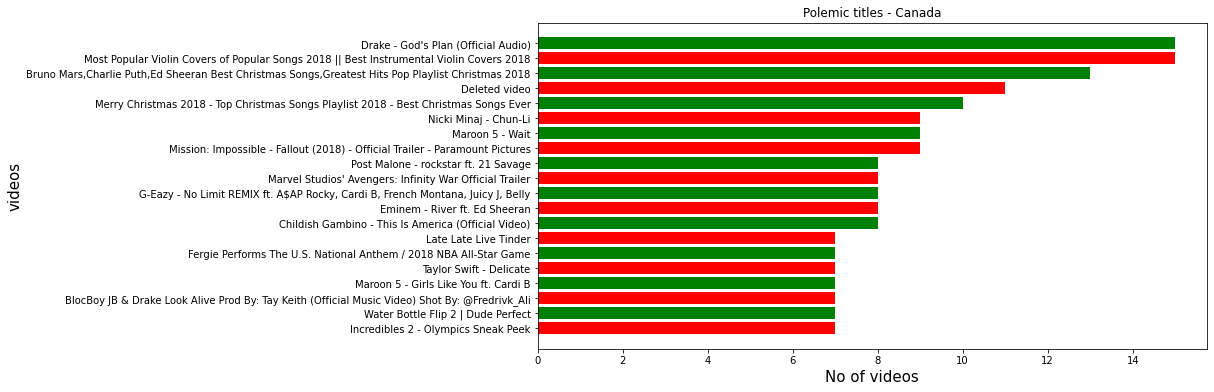

In [25]:
views_videos = polemicoCa.groupby('title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
videos_sort = views_videos.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(videos_sort['title'], videos_sort['views'],color=['red','green'])
plt.xlabel("No of videos",size=15)
plt.ylabel("videos",size=15)
plt.title("Polemic titles - Canada")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

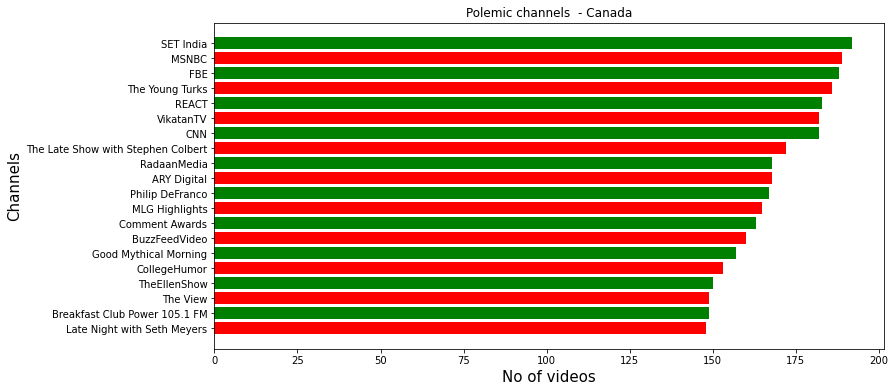

In [26]:
views_channels = polemicoCa.groupby('channel_title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['views'],color=['red','green'])
plt.xlabel("No of videos",size=15)
plt.ylabel("Channels",size=15)
plt.title("Polemic channels  - Canada")
plt.show

## Sección específica

In [29]:
seccionCa = df_canada[df_canada['category_name'] == 'Film & Animation']
seccionCa.head()

video_id trending_date  \
12   FyZMnhUtLfE    2017-11-14   
18   fy-CuCzaPp8    2017-11-14   
19   kzwfHumJyYc    2017-11-14   
45   -Toujzk3ysk    2017-11-14   
103  kOnQocd799Y    2017-11-14   

                                                 title  \
12          猎场 | Game Of Hunting 12【TV版】（胡歌、張嘉譯、祖峰等主演）   
18   Rooster Teeth Animated Adventures - Drunk Baby...   
19   Sharry Mann: Cute Munda ( Song Teaser) | Parmi...   
45   Gerrymandering, Conservative Comedians, Bobby ...   
103  Everything Wrong With Baby Driver In 14 Minute...   

                 channel_title  category_id        publish_time  \
12                        大劇獨播            1 2017-11-12 16:00:01   
18               Rooster Teeth            1 2017-11-13 14:00:03   
19             Lokdhun Punjabi            1 2017-11-12 12:20:39   
45   Real Time with Bill Maher            1 2017-11-11 05:30:08   
103                 CinemaSins            1 2017-11-09 17:14:11   

                                                  tags    views  likes  \
12   電視劇|"大陸電視劇"|"猎场"|"职场"|"商战"|"爱情"|"都市"|"胡歌"|"陈龙"...   158815    218   
18   Rooster Teeth|"RT"|"animation"|"television"|"f...   308568  19541   
19   sharry mann|"sharry mann new song"|"sharry man...  1096327  33966   
45   DNC Chairwoman Donna Brazile|"Hacks"|"The Insi...   458964   4903   
103  baby driver|"edgar wright"|"everything wrong w...  2736733  58967   

     dislikes  comment_count     category_name  
12         30            186  Film & Animation  
18         70            495  Film & Animation  
19        798            882  Film & Animation  
45        392           1289  Film & Animation  
103      3492           7915  Film & Animation

<function matplotlib.pyplot.show(close=None, block=None)>

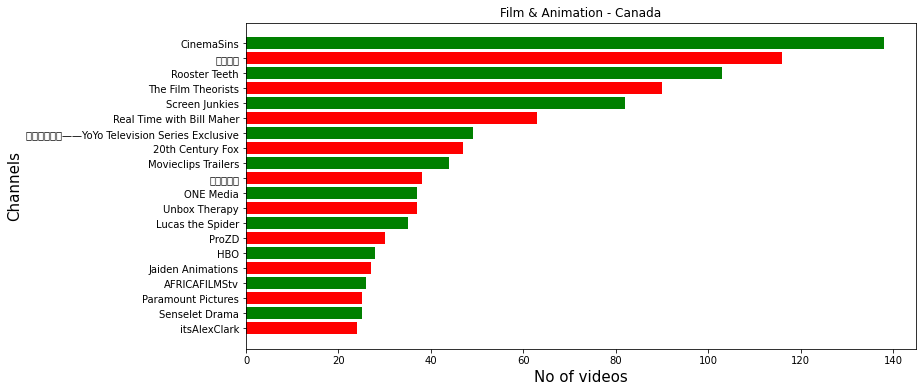

In [32]:
views_channels = seccionCa.groupby('channel_title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['views'],color=['red','green'])
plt.xlabel("No of videos",size=15)
plt.ylabel("Channels",size=15)
plt.title("Film & Animation - Canada")
plt.show

## Mejor rango de duración de video

####  El mejor rango de duracion de video no se puede analizar, ya que no existe un campo en el dataframe donde se pueda ver la duracion de cada video, este DF solo muestra la fecha y la hora cuando fue publicado y el tranding date

#### Sin embargo, a través del campo publish_time se puede conocer las horas en las que hubo mas videos tranding

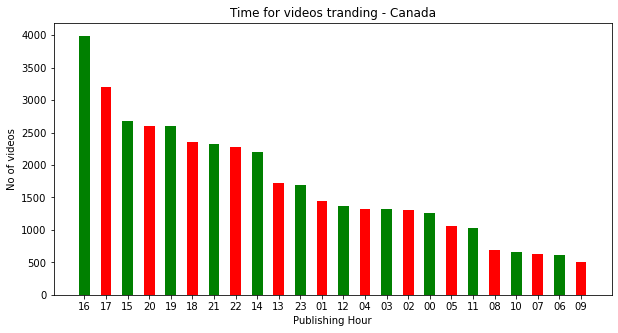

In [33]:
hour = polemicoCa.publish_time.apply(lambda x: x.strftime("%H"))
total_dict=(hour.value_counts().to_dict())
count= pd.DataFrame(list(total_dict.items()),columns = ['Publishing Hour', 'No of videos'])
fig=plt.figure(figsize=(10,5))
plt.bar(count['Publishing Hour'],count['No of videos'],color=['green','red'],width=0.5)
plt.xlabel("Publishing Hour")
plt.ylabel("No of videos")
plt.title("Time for videos tranding - Canada")
plt.show()

In [34]:
df_canada['Trending dif_days'] = df_canada.apply(lambda row: (row.trending_date-row.publish_time).days, axis = 1)
df_canada.head()

video_id trending_date  \
0  n1WpP7iowLc    2017-11-14   
1  0dBIkQ4Mz1M    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   
3  d380meD0W0M    2017-11-14   
4  2Vv-BfVoq4g    2017-11-14   

                                               title channel_title  \
0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id        publish_time  \
0           10 2017-11-10 17:00:03   
1           23 2017-11-13 17:00:00   
2           23 2017-11-12 19:05:24   
3           24 2017-11-12 18:01:41   
4           10 2017-11-09 11:04:14   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count  category_name  Trending dif_days  
0     43420         125882          Music                  3  
1      1688          13030         Comedy                  0  
2      5339           8181         Comedy                  1  
3      1989          17518  Entertainment                  1  
4     21082          85067          Music                  4

## Tags que podrian posicionarlo mejor

In [35]:
titulo = df_canada['title'].value_counts(ascending = False).to_frame()
titulo.head(10)

title
Drake - God's Plan (Official Audio)                    15
Most Popular Violin Covers of Popular Songs 201...     15
Bruno Mars,Charlie Puth,Ed Sheeran Best Christm...     13
Deleted video                                          11
Merry Christmas 2018 - Top Christmas Songs Play...     10
Mission: Impossible - Fallout (2018) - Official...      9
Maroon 5 - Wait                                         9
Nicki Minaj - Chun-Li                                   9
Post Malone - rockstar ft. 21 Savage                    8
Marvel Studios' Avengers: Infinity War Official...      8

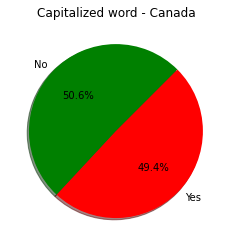

In [36]:
def capitalized_word(title):
    for i in title.split():
        if i.isupper():
            return True
    return False
df_canada["capitalized"] = df_canada["title"].apply(capitalized_word)
counts_capitalized = df_canada["capitalized"].value_counts().to_dict()
plt.pie([counts_capitalized[False], counts_capitalized[True]], labels=['No', 'Yes'], autopct='%1.1f%%', shadow=True, colors=['green', 'red'],startangle=45)
plt.title("Capitalized word - Canada")
plt.show()

## Caracteristicas titulo video

In [42]:
titulo = df_canada['tags'].value_counts(ascending = False).to_frame()
titulo.head(5)

tags
[none]                                              2385
the real|"daytime"|"talk show"|"women"|"tamera ...   127
best vines 2018|"funny vines"|"funny videos"|"f...   120
Vaani rani|"rani"|"Radhika in funny character"|...   116
senegal|"video"|"divertissement"|"humour"|"yous...    85

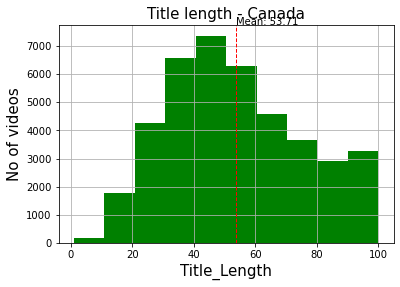

In [40]:
df_canada["title_length"] = df_canada["title"].apply(lambda x: len(x))
fig = df_canada['title_length'].hist(color="green")
fig.axvline(df_canada['title_length'].mean(), color='red', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
fig.text(df_canada['title_length'].mean(), max_ylim, 'Mean: {:.2f}'.format(df_canada['title_length'].mean()))
plt.xlabel("Title_Length",fontsize=15)
plt.ylabel("No of videos",fontsize=15)
plt.title("Title length - Canada",size=15)
plt.show()

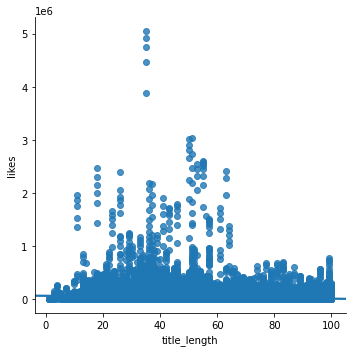

In [44]:
sns.lmplot(x="title_length", y="likes", data = df_canada)

## Germany

In [41]:
germany = pd.read_csv('DEvideos.csv')
germany

video_id trending_date  \
0      LgVi6y5QIjM      17.14.11   
1      Bayt7uQith4      17.14.11   
2      1ZAPwfrtAFY      17.14.11   
3      AHtypnRk7JE      17.14.11   
4      ZJ9We4bjcg0      17.14.11   
...            ...           ...   
40835  fn5WNxy-Wcw      18.14.06   
40836  zAFv43lxqHE      18.14.06   
40837  zSXG5I6Y2fA      18.14.06   
40838  5d115sePmaU      18.14.06   
40839  go-F6xvezAM      18.14.06   

                                                   title  \
0      Sing zu Ende! | Gesangseinlagen vom Feinsten |...   
1      Kinder ferngesteuert im Kiosk! Erwachsene abzo...   
2      The Trump Presidency: Last Week Tonight with J...   
3                                    Das Fermi-Paradoxon   
4               18 SONGS mit Kelly MissesVlog (Sing-off)   
...                                                  ...   
40835  KINGDOM HEARTS III – E3 2018 Pirates of the Ca...   
40836                                     YMS: The Visit   
40837  Ungut umgeschult – Grünwald als Ersthelfer am ...   
40838  Assassin's Creed Odyssey: E3 2018 Welt-Enthüll...   
40839  Гироскутер - Азбука Уральских Пельменей Б - Ур...   

                 channel_title  category_id              publish_time  \
0                    inscope21           24  2017-11-13T17:08:49.000Z   
1      LUKE! Die Woche und ich           23  2017-11-12T22:30:01.000Z   
2              LastWeekTonight           24  2017-11-13T07:30:00.000Z   
3            100SekundenPhysik           27  2017-11-12T15:00:01.000Z   
4                         rezo           24  2017-11-12T13:10:36.000Z   
...                        ...          ...                       ...   
40835           Kingdom Hearts           20  2018-06-12T01:54:02.000Z   
40836     YourMovieSucksDOTorg           24  2018-06-13T21:58:43.000Z   
40837  Grünwald Freitagscomedy           24  2018-06-12T10:01:28.000Z   
40838      Assassin's Creed DE           20  2018-06-11T21:16:55.000Z   
40839       Уральские Пельмени           23  2018-06-13T15:02:15.000Z   

                                                    tags    views   likes  \
0      inscope21|"sing zu ende"|"gesangseinlagen"|"ge...   252786   35885   
1      Kinder|"ferngesteuert"|"Kinder ferngesteuert"|...   797196   53576   
2      last week tonight trump presidency|"last week ...  2418783   97190   
3      Physik|"Wissenschaft"|"Technik"|"Science-Ficti...   380247   31821   
4      kelly|"missesvlog"|"kelly song"|"bausa"|"bausa...   822213  100684   
...                                                  ...      ...     ...   
40835  Kingdom Hearts|"KH3"|"Kingdom Hearts 3"|"Pirat...  1394530   46778   
40836                                             [none]   139733   11155   
40837  Günter Grünwald|"Grünwald Freitagscomedy"|"Gün...    26054     364   
40838  Assassin's Creed|"Assassins Creed"|"Assassin's...  1139198   14900   
40839  Гироскутер|"уральские пельмени гироскутер"|"мя...   316328   11394   

       dislikes  comment_count  \
0           230           1539   
1           302           1278   
2          6146          12703   
3           458           1955   
4          2467          10244   
...         ...            ...   
40835       501           9878   
40836       119           1968   
40837        11              8   
40838      1421           1587   
40839       352            550   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg              False   
1      https://i.ytimg.com/vi/Bayt7uQith4/default.jpg              False   
2      https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg              False   
3      https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg              False   
4      https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg              False   
...                                               ...                ...   
40835  https://i.ytimg.com/vi/fn5WNxy-Wcw/default.jpg              False   
40836  https://i.ytimg.com/vi/zAFv43l

In [42]:
germany = germany.drop(['thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description'], axis = 1)

In [43]:
germany['category_name'] = germany['category_id'].apply(lambda x: dict_categoria.get(x, 'NaN'))

In [44]:
germany['trending_date'] = pd.to_datetime(pd.Series(germany['trending_date'].apply(lambda x:'20'+x[0:2]+'.'+x[6:]+'.'+x[3:5])))
germany['publish_time'] = pd.to_datetime(pd.Series(germany['publish_time'].apply(lambda x:x[:19])))

In [45]:
df_germany = germany.copy()
df_germany.head()

video_id trending_date  \
0  LgVi6y5QIjM    2017-11-14   
1  Bayt7uQith4    2017-11-14   
2  1ZAPwfrtAFY    2017-11-14   
3  AHtypnRk7JE    2017-11-14   
4  ZJ9We4bjcg0    2017-11-14   

                                               title            channel_title  \
0  Sing zu Ende! | Gesangseinlagen vom Feinsten |...                inscope21   
1  Kinder ferngesteuert im Kiosk! Erwachsene abzo...  LUKE! Die Woche und ich   
2  The Trump Presidency: Last Week Tonight with J...          LastWeekTonight   
3                                Das Fermi-Paradoxon        100SekundenPhysik   
4           18 SONGS mit Kelly MissesVlog (Sing-off)                     rezo   

   category_id        publish_time  \
0           24 2017-11-13 17:08:49   
1           23 2017-11-12 22:30:01   
2           24 2017-11-13 07:30:00   
3           27 2017-11-12 15:00:01   
4           24 2017-11-12 13:10:36   

                                                tags    views   likes  \
0  inscope21|"sing zu ende"|"gesangseinlagen"|"ge...   252786   35885   
1  Kinder|"ferngesteuert"|"Kinder ferngesteuert"|...   797196   53576   
2  last week tonight trump presidency|"last week ...  2418783   97190   
3  Physik|"Wissenschaft"|"Technik"|"Science-Ficti...   380247   31821   
4  kelly|"missesvlog"|"kelly song"|"bausa"|"bausa...   822213  100684   

   dislikes  comment_count  category_name  
0       230           1539  Entertainment  
1       302           1278         Comedy  
2      6146          12703  Entertainment  
3       458           1955      Education  
4      2467          10244  Entertainment

In [46]:
df_germany.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40840 entries, 0 to 40839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   video_id       40840 non-null  object        
 1   trending_date  40840 non-null  datetime64[ns]
 2   title          40840 non-null  object        
 3   channel_title  40840 non-null  object        
 4   category_id    40840 non-null  int64         
 5   publish_time   40840 non-null  datetime64[ns]
 6   tags           40840 non-null  object        
 7   views          40840 non-null  int64         
 8   likes          40840 non-null  int64         
 9   dislikes       40840 non-null  int64         
 10  comment_count  40840 non-null  int64         
 11  category_name  40840 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 3.7+ MB


In [47]:
df_canada.isnull().sum()

video_id             0
trending_date        0
title                0
channel_title        0
category_id          0
publish_time         0
tags                 0
views                0
likes                0
dislikes             0
comment_count        0
category_name        0
Trending dif_days    0
capitalized          0
title_length         0
dtype: int64

In [48]:
df_germany.describe(include="object")

video_id                                            title  \
count         40840                                            40840   
unique        29627                                            29682   
top     pk0iqFne5eU  Nur 2% aller Menschen schaffen diese 5 Rätsel..   
freq              7                                               20   

       channel_title    tags  category_name  
count          40840   40840          40840  
unique          6085   23557             18  
top          Galileo  [none]  Entertainment  
freq             200    3031          15292

In [49]:
df_germany['category_name'].unique()

array(['Entertainment', 'Comedy', 'Education', 'People & Blogs',
       'Film & Animation', 'Autos & Vehicles', 'Sports', 'Howto & Style',
       'News & Politics', 'Music', 'Gaming', 'Shows',
       'Science & Technology', 'NaN', 'Pets & Animals', 'Travel & Events',
       'Trailers', 'Movies'], dtype=object)

## Contenido viral

In [50]:
views_mediaDe = df_germany['views'].mean() 
print(views_mediaDe)
likes_mediaDe = df_germany['likes'].mean()
print(likes_mediaDe)
comments_mediaDe = df_germany['comment_count'].mean()
print(comments_mediaDe)

603455.3184378061
21875.50288932419
2785.856513222331


In [51]:
viralDe = df_germany[(df_germany['views'] > views_mediaDe) & (df_germany['likes'] > likes_mediaDe) & (df_germany['comment_count'] > comments_mediaDe)]
viralDe.iloc[:50]

video_id trending_date  \
2    1ZAPwfrtAFY    2017-11-14   
4    ZJ9We4bjcg0    2017-11-14   
11   2kyS6SvSYSE    2017-11-14   
26   lqJbw2pWZLk    2017-11-14   
31   2Vv-BfVoq4g    2017-11-14   
36   n1WpP7iowLc    2017-11-14   
41   0dBIkQ4Mz1M    2017-11-14   
54   JzCsM1vtn78    2017-11-14   
58   U3xLOo-CNwo    2017-11-14   
60   0yIWz1XEeyc    2017-11-14   
83   5qpjK5DgCt4    2017-11-14   
110  d380meD0W0M    2017-11-14   
116  LUzsOyWp9lw    2017-11-14   
119  GSid9wlRqBQ    2017-11-14   
129  nc99ccSXST0    2017-11-14   
149  AE8tATPge7o    2017-11-14   
170  _uM5kFfkhB8    2017-11-14   
207  1ZAPwfrtAFY    2017-11-15   
212  kgaO45SyaO4    2017-11-15   
215  5530I_pYjbo    2017-11-15   
217  UhAKwwjn2f8    2017-11-15   
221  gjXrm2Q-te4    2017-11-15   
225  oP-6Z1RlaIc    2017-11-15   
227  0dBIkQ4Mz1M    2017-11-15   
231  ve3oQBjcAGI    2017-11-15   
233  bAkEd8r7Nnw    2017-11-15   
235  ZJ9We4bjcg0    2017-11-15   
240  2kyS6SvSYSE    2017-11-15   
245  ItYOdWRo0JY    2017-11-15   
262  CtBca6H6Teg    2017-11-15   
285  Ax1P5Q8Kr9g    2017-11-15   
286  yTV6dGEOU5w    2017-11-15   
302  9SK1I0V6U5c    2017-11-15   
307  ndLYcaq7VMY    2017-11-15   
314  jEtTDPkjoFc    2017-11-15   
407  8-Cjsnq8kVU    2017-11-16   
408  kgaO45SyaO4    2017-11-16   
411  5530I_pYjbo    2017-11-16   
412  sottGW1p5os    2017-11-16   
418  Ehke7aPI9l0    2017-11-16   
427  VsYmwBOYfW8    2017-11-16   
436  bAkEd8r7Nnw    2017-11-16   
444  1ZAPwfrtAFY    2017-11-16   
451  gjXrm2Q-te4    2017-11-16   
461  UhAKwwjn2f8    2017-11-16   
483  ve3oQBjcAGI    2017-11-16   
499  Gc_BnMrFhPc    2017-11-16   
502  ItYOdWRo0JY    2017-11-16   
518  0dBIkQ4Mz1M    2017-11-16   
523  1YEXXIWqkMM    2017-11-16   

                                                 title  \
2    The Trump Presidency: Last Week Tonight with J...   
4             18 SONGS mit Kelly MissesVlog (Sing-off)   
11                  WE WANT TO TALK ABOUT OUR MARRIAGE   
26   Kollegah & Farid Bang ✖️ 180.000€ SHOPPING-TOU...   
31         Ed Sheeran - Perfect (Official Music Video)   
36          Eminem - Walk On Water (Audio) ft. Beyoncé   
41                       PLUSH - Bad Unboxing Fan Mail   
54                THE LOGANG MADE HISTORY. LOL. AGAIN.   
58   12 Weird Ways To Sneak Food Into Class / Back ...   
60   Jake Paul Says Alissa Violet CHEATED with LOGA...   
83   Racist Superman | Rudy Mancuso, King Bach & Le...   
110                           I Dare You: GOING BALD!?   
116  YOUTUBERS REACT TO TOP 10 TWITTER ACCOUNTS OF ...   
119  Julien Bam reagiert auf HATE Kommentare (zum a...   
129                5 Ice Cream Gadgets put to the Test   
149  IS GPU MINING STILL PROFITABLE? - Mining Adven...   
170             Vanoss Superhero School - New Students   
207  The Trump Presidency: Last Week Tonight with J...   
212                                   The New SpotMini   
215                              How I Trained My Cats   
217                                     Söz | 21.Bölüm   
221     Jimmy Fallon Pays Tribute to His Mother Gloria   
225  Triple H returns to join Team Raw at Survivor ...   
227                      PLUSH - Bad Unboxing Fan Mail   
231  Everything Wrong With Wonder Woman In 14 Minut...   
233       Slow Mo Katana Sword - 4K - The Slow Mo Guys   
235           18 SONGS mit Kelly MissesVlog (Sing-off)   
240                 WE WANT TO TALK ABOUT OUR MARRIAGE   
245        Selling My iPhone X To a Machine at Walmart   
262                   Honest Trailers - Batman Forever   
285  Huge IGN Failure Exposed, Why Zoella Is Being ...   
286        Как мы для Усманова акции Фейсбука покупали   
302                        Lie Detector | Anwar Jibawi   
307  Как живет Овечкин в США.  Сергей Полонский п...   
314  Eminem Performs 'Walk On Water' | MTV EMAs 201...   
407                     Deadpool’s “Wet on Wet” Teaser   
408                                   The New SpotMini   
411                              How I Trained My Cats   
412        

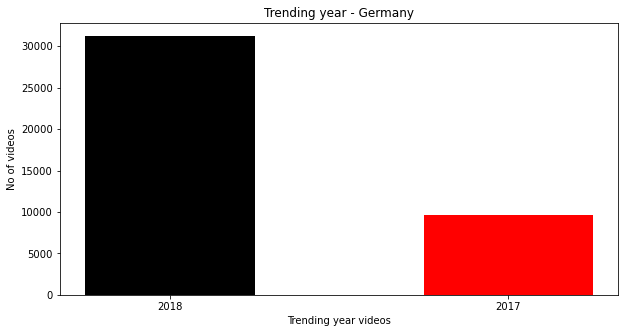

In [53]:
day=df_germany['trending_date'].dt.strftime('%Y')
total_dict=(day.value_counts()).to_dict()
count= pd.DataFrame(list(total_dict.items()),columns=['Trending year videos','No of videos'])

fig = plt.figure(figsize=(10,5))
plt.bar(count['Trending year videos'], count['No of videos'],color=['black', 'red'], width=0.5)
plt.xlabel("Trending year videos")
plt.ylabel("No of videos")
plt.title("Trending year - Germany")
plt.show()

<AxesSubplot:title={'center':'Contenido viral - Germany'}>

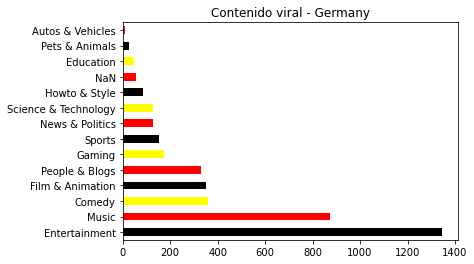

In [54]:
categoria = viralDe['category_name'].value_counts()
categoria.plot(kind='barh', title="Contenido viral - Germany",color=['black','red','yellow'])

<ipython-input-55-31b851b7541e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  b = a['category_name','likes'].max()


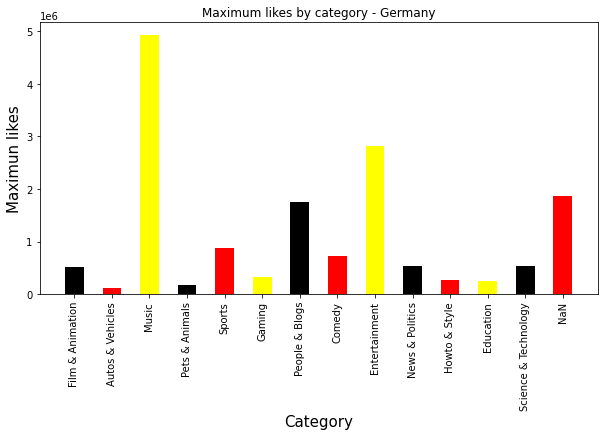

In [55]:
a = viralDe.groupby('category_id')
b = a['category_name','likes'].max()

fig=plt.figure(figsize=(10,5))
plt.bar(b['category_name'],b['likes'],color=['black','red','yellow'],width=0.5)
plt.xticks(rotation=90)
plt.xlabel("Category",size=15)
plt.ylabel("Maximun likes",size=15)
plt.title("Maximum likes by category - Germany")
plt.show()

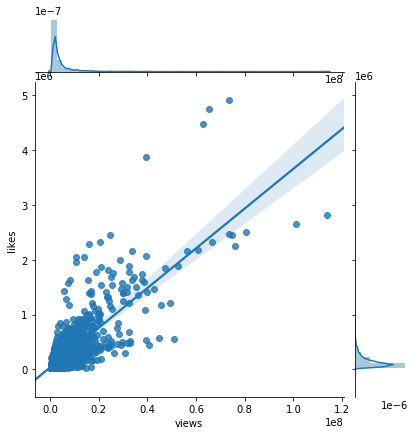

In [92]:
sns.jointplot(x='views', y='likes', data=viralDe,kind='reg')

#### Mostrar los principales canales

<function matplotlib.pyplot.show(close=None, block=None)>

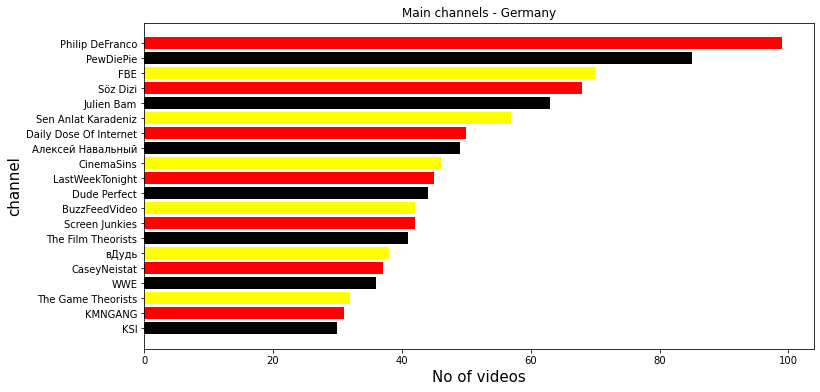

In [56]:
views_channels = viralDe.groupby('channel_title').size().reset_index(name="video_count").sort_values("video_count", ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('video_count')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['video_count'],color=['black','red','yellow'])
plt.xlabel("No of videos",size=15)
plt.ylabel("channel",size=15)
plt.title("Main channels - Germany")
plt.show

## Contenido polémico

In [57]:
polemicoDe = df_germany.sort_values(by = 'views', ascending = False)
polemicoDe.iloc[:50]

video_id trending_date  \
5455   FlsCjmMhFmw    2017-12-11   
5221   FlsCjmMhFmw    2017-12-10   
4062   6ZfuNTqbHE8    2017-12-04   
5004   FlsCjmMhFmw    2017-12-09   
3808   6ZfuNTqbHE8    2017-12-03   
36291  7C2z4GqqS5E    2018-05-22   
34104  VYOjWnS4cMY    2018-05-11   
3601   6ZfuNTqbHE8    2017-12-02   
35954  7C2z4GqqS5E    2018-05-21   
35699  7C2z4GqqS5E    2018-05-20   
33746  VYOjWnS4cMY    2018-05-10   
3399   6ZfuNTqbHE8    2017-12-01   
4799   FlsCjmMhFmw    2017-12-08   
21891  _I_D_8Z4sJE    2018-03-05   
31395  u9Mv98Gr5pY    2018-04-28   
17036  BhIEIO0vaBE    2018-02-09   
33534  VYOjWnS4cMY    2018-05-09   
31145  u9Mv98Gr5pY    2018-04-27   
16799  BhIEIO0vaBE    2018-02-08   
23729  -BQJo3vK8O8    2018-03-14   
25051  QwievZ1Tx-8    2018-03-21   
16588  BhIEIO0vaBE    2018-02-07   
21597  _I_D_8Z4sJE    2018-03-04   
24761  QwievZ1Tx-8    2018-03-20   
23532  -BQJo3vK8O8    2018-03-13   
30656  ffxKSjUwKdU    2018-04-24   
35511  7C2z4GqqS5E    2018-05-19   
30936  u9Mv98Gr5pY    2018-04-26   
1274   TyHvyGVs42U    2017-11-20   
3199   6ZfuNTqbHE8    2017-11-30   
11049  LsoLEjrDogU    2018-01-08   
24550  QwievZ1Tx-8    2018-03-19   
16384  BhIEIO0vaBE    2018-02-06   
23995  tCXGJQYZ9JA    2018-03-16   
12234  dfnCAmr569k    2018-01-16   
19744  xpVfcZ0ZcFM    2018-02-22   
31     2Vv-BfVoq4g    2017-11-14   
35995  yDiXQl7grPQ    2018-05-21   
5681   vn9mMeWcgoM    2017-12-12   
31283  rRr1qiJRsXk    2018-04-27   
38364  xTlNMmZKwpA    2018-06-02   
38758  aJOTlE1K90k    2018-06-04   
30371  ffxKSjUwKdU    2018-04-23   
23279  -BQJo3vK8O8    2018-03-12   
10812  LsoLEjrDogU    2018-01-07   
33333  VYOjWnS4cMY    2018-05-08   
21372  _I_D_8Z4sJE    2018-03-03   
24347  QwievZ1Tx-8    2018-03-18   
1020   TyHvyGVs42U    2017-11-19   
23761  tCXGJQYZ9JA    2018-03-15   

                                                   title  \
5455   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
5221   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
4062   Marvel Studios' Avengers: Infinity War Officia...   
5004   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
3808   Marvel Studios' Avengers: Infinity War Officia...   
36291                BTS (방탄소년단) 'FAKE LOVE' Official MV   
34104  Childish Gambino - This Is America (Official V...   
3601   Marvel Studios' Avengers: Infinity War Officia...   
35954                BTS (방탄소년단) 'FAKE LOVE' Official MV   
35699                BTS (방탄소년단) 'FAKE LOVE' Official MV   
33746  Childish Gambino - This Is America (Official V...   
3399   Marvel Studios' Avengers: Infinity War Officia...   
4799   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
21891  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...   
31395                      VENOM - Official Trailer (HD)   
17036                                    To Our Daughter   
33534  Childish Gambino - This Is America (Official V...   
31145                      VENOM - Official Trailer (HD)   
16799                                    To Our Daughter   
23729              Maluma - El Préstamo (Official Video)   
25051  Marvel Studios' Avengers: Infinity War - Offic...   
16588                                    To Our Daughter   
21597  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...   
24761  Marvel Studios' Avengers: Infinity War - Offic...   
23532              Maluma - El Préstamo (Official Video)   
30656               Ariana Grande - No Tears Left To Cry   
35511                BTS (방탄소년단) 'FAKE LOVE' Official MV   
30936                      VENOM - Official Trailer (HD)   
1274           Luis Fonsi, Demi Lovato - Échame La Culpa   
3199   Marvel Studios' Avengers: Infinity War Officia...   
11049  Bruno Mars - Finesse (Remix) [Feat. Cardi B] [...   
24550  Marvel Studios' Avengers: Infinity War - Offic...   
16384                                    To Our Daughter   
23995                            Taylor Swift - Delicate   
12234     Taylor Swift - End Game ft. Ed Sheeran, Future   
19744        

<AxesSubplot:title={'center':'Contenido polémico - Germany'}>

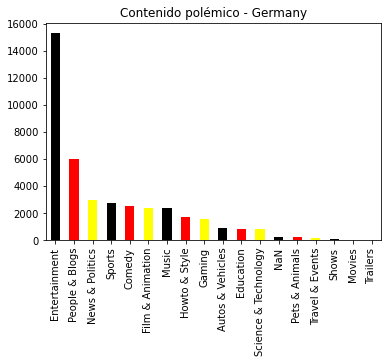

In [59]:
polemicoDe['category_name'].value_counts().plot(kind = "bar", title="Contenido polémico - Germany", color=['black','red','yellow'])

<function matplotlib.pyplot.show(close=None, block=None)>

/Users/learning/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/learning/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/learning/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127769 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/learning/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128151 missing from current font.
  font.set_text(s, 0, flags=flags)


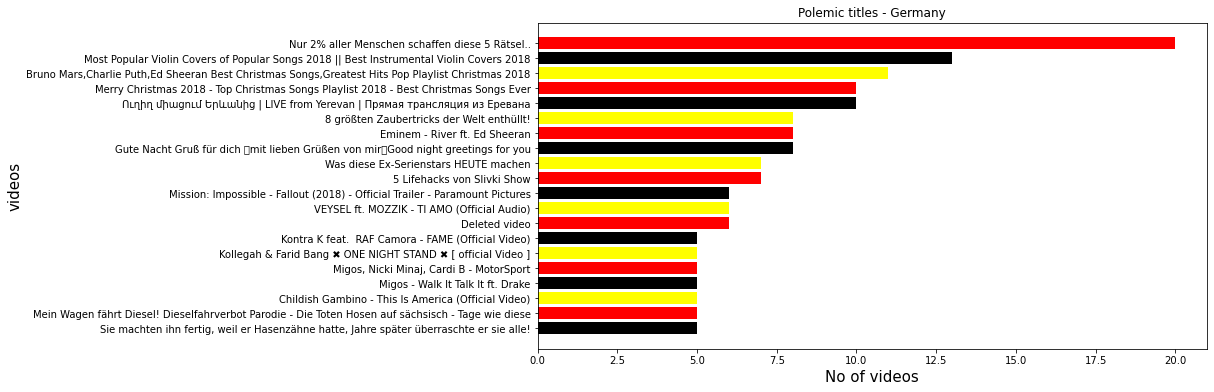

In [60]:
views_videos = polemicoDe.groupby('title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
videos_sort = views_videos.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(videos_sort['title'], videos_sort['views'],color=['black','red','yellow'])
plt.xlabel("No of videos",size=15)
plt.ylabel("videos",size=15)
plt.title("Polemic titles - Germany")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

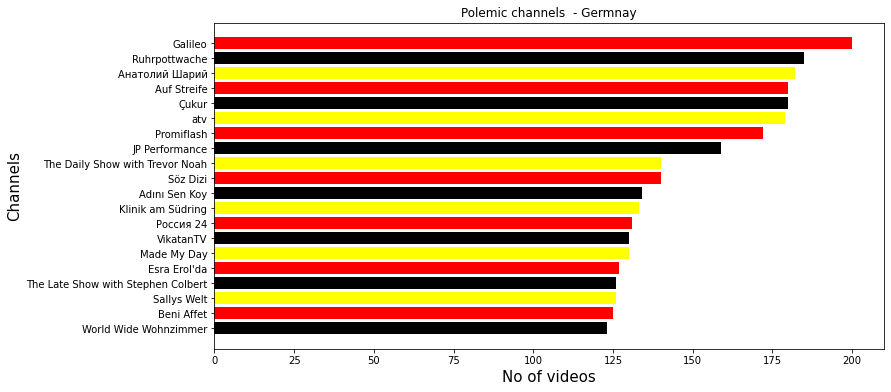

In [61]:
views_channels = polemicoDe.groupby('channel_title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['views'],color=['black','red','yellow'])
plt.xlabel("No of videos",size=15)
plt.ylabel("Channels",size=15)
plt.title("Polemic channels  - Germnay")
plt.show

## Sección especifica

In [62]:
seccionDe = df_germany[df_germany['category_name'] == 'Film & Animation']
seccionDe.head()

video_id trending_date  \
9   aZYSFByDGkg    2017-11-14   
23  FWoXtrLTUMs    2017-11-14   
30  t3SveFfi5ik    2017-11-14   
48  nQz2u6RJwgE    2017-11-14   
63  nWGKA8OULxU    2017-11-14   

                                                title  channel_title  \
9   Legenden: So wird dein Ruhm unsterblich - Fame...        WALULIS   
23      Wenn die Freundin anruft... GIRLFRIEND VOICE!     Phil Laude   
30  Tietzer returns – Treckerrennen 2 / Kann Fynn ...  Kliemannsland   
48  Neue STAR WARS-Trilogie geplant | KEVIN SPACEY...  diefilmfabrik   
63                             Beni Affet 1253. Bölüm     Beni Affet   

    category_id        publish_time  \
9             1 2017-11-13 15:06:12   
23            1 2017-11-12 17:00:01   
30            1 2017-11-12 12:00:07   
48            1 2017-11-13 16:00:06   
63            1 2017-11-13 14:18:16   

                                                 tags   views  likes  \
9   michael jackson|"promi"|"tot"|"tod"|"gestorben...   62418   4749   
23  Phil Laude|"Y-Titty"|"YouTuber"|"Girlfriend Vo...  286684  27188   
30  kliemannsland|"der tietzer"|"treckerfahrer dür...  149163   5452   
48  kevin spacey|"house of cards"|"season 6"|"staf...   31154   2107   
63  beni affet dizi|"ceren yalazoğlu"|"beni affet ...  123529   1370   

    dislikes  comment_count     category_name  
9         44            425  Film & Animation  
23       435            943  Film & Animation  
30        97            280  Film & Animation  
48        29            444  Film & Animation  
63       180            255  Film & Animation

<function matplotlib.pyplot.show(close=None, block=None)>

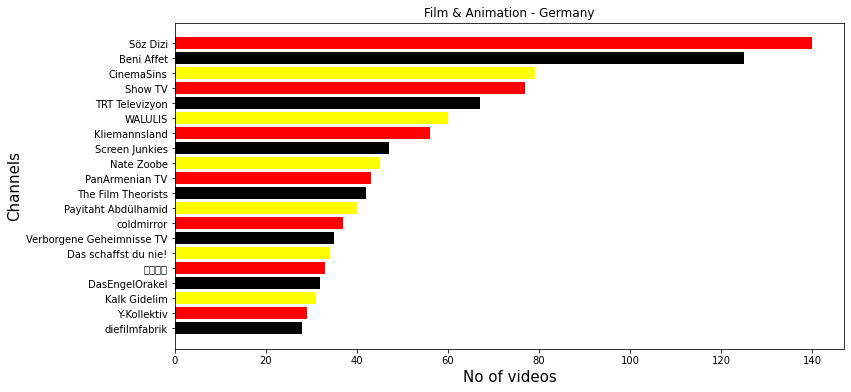

In [64]:
views_channels = seccionDe.groupby('channel_title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['views'],color=['black','red','yellow'])
plt.xlabel("No of videos",size=15)
plt.ylabel("Channels",size=15)
plt.title("Film & Animation - Germany")
plt.show

## Mejor rango de duración de video

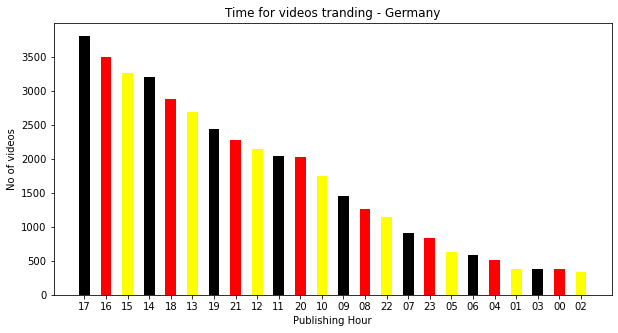

In [65]:
hour = polemicoDe.publish_time.apply(lambda x: x.strftime("%H"))
total_dict=(hour.value_counts().to_dict())
count= pd.DataFrame(list(total_dict.items()),columns = ['Publishing Hour', 'No of videos'])
fig=plt.figure(figsize=(10,5))
plt.bar(count['Publishing Hour'],count['No of videos'],color=['black','red','yellow'],width=0.5)
plt.xlabel("Publishing Hour")
plt.ylabel("No of videos")
plt.title("Time for videos tranding - Germany")
plt.show()

In [66]:
df_germany['Trending dif_days'] = df_germany.apply(lambda row: (row.trending_date-row.publish_time).days, axis = 1)
df_germany.head()

video_id trending_date  \
0  LgVi6y5QIjM    2017-11-14   
1  Bayt7uQith4    2017-11-14   
2  1ZAPwfrtAFY    2017-11-14   
3  AHtypnRk7JE    2017-11-14   
4  ZJ9We4bjcg0    2017-11-14   

                                               title            channel_title  \
0  Sing zu Ende! | Gesangseinlagen vom Feinsten |...                inscope21   
1  Kinder ferngesteuert im Kiosk! Erwachsene abzo...  LUKE! Die Woche und ich   
2  The Trump Presidency: Last Week Tonight with J...          LastWeekTonight   
3                                Das Fermi-Paradoxon        100SekundenPhysik   
4           18 SONGS mit Kelly MissesVlog (Sing-off)                     rezo   

   category_id        publish_time  \
0           24 2017-11-13 17:08:49   
1           23 2017-11-12 22:30:01   
2           24 2017-11-13 07:30:00   
3           27 2017-11-12 15:00:01   
4           24 2017-11-12 13:10:36   

                                                tags    views   likes  \
0  inscope21|"sing zu ende"|"gesangseinlagen"|"ge...   252786   35885   
1  Kinder|"ferngesteuert"|"Kinder ferngesteuert"|...   797196   53576   
2  last week tonight trump presidency|"last week ...  2418783   97190   
3  Physik|"Wissenschaft"|"Technik"|"Science-Ficti...   380247   31821   
4  kelly|"missesvlog"|"kelly song"|"bausa"|"bausa...   822213  100684   

   dislikes  comment_count  category_name  Trending dif_days  
0       230           1539  Entertainment                  0  
1       302           1278         Comedy                  1  
2      6146          12703  Entertainment                  0  
3       458           1955      Education                  1  
4      2467          10244  Entertainment                  1

## Tags que podrian posicionarlo mejor

In [67]:
titulo = df_germany['title'].value_counts(ascending = False).to_frame()
titulo.head(5)

title
Nur 2% aller Menschen schaffen diese 5 Rätsel..        20
Most Popular Violin Covers of Popular Songs 201...     13
Bruno Mars,Charlie Puth,Ed Sheeran Best Christm...     11
Ուղիղ միացում Երևանից | LIVE from Yerevan | Пря...     10
Merry Christmas 2018 - Top Christmas Songs Play...     10

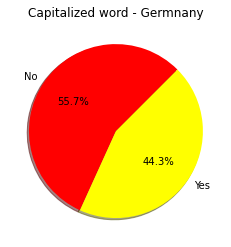

In [68]:
def capitalized_word(title):
    for i in title.split():
        if i.isupper():
            return True
    return False
df_germany["capitalized"] = df_germany["title"].apply(capitalized_word)
counts_capitalized = df_germany["capitalized"].value_counts().to_dict()
plt.pie([counts_capitalized[False], counts_capitalized[True]], labels=['No', 'Yes'], autopct='%1.1f%%', shadow=True, colors=['red', 'yellow'],startangle=45)
plt.title("Capitalized word - Germnany")
plt.show()

## Caracteristicas titulo video

In [69]:
titulo = df_germany['tags'].value_counts(ascending = False).to_frame()
titulo.head(5)

tags
[none]                                              3031
шарий|"шарий блог"|"новое видео шарий"|"шарий н...   167
Sturm der Liebe                                      127
Tipps|"Tricks"|"diy"|"Mode"|"Gesund"|"Essen"|"L...   122
Rote Rosen                                            86

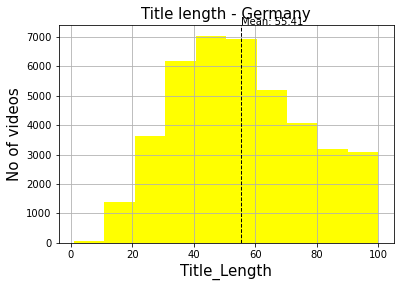

In [71]:
df_germany["title_length"] = df_germany["title"].apply(lambda x: len(x))
fig = df_germany['title_length'].hist(color="yellow")
fig.axvline(df_germany['title_length'].mean(), color='black', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
fig.text(df_germany['title_length'].mean(), max_ylim, 'Mean: {:.2f}'.format(df_germany['title_length'].mean()))
plt.xlabel("Title_Length",fontsize=15)
plt.ylabel("No of videos",fontsize=15)
plt.title("Title length - Germany",size=15)
plt.show()

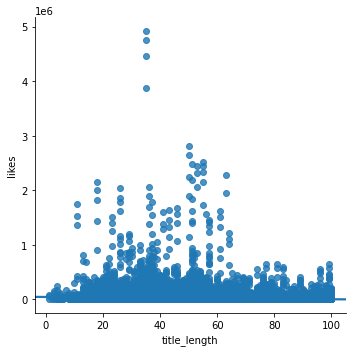

In [109]:
sns.lmplot(x="title_length", y="likes", data = df_germany)

## FRANCIA

In [72]:
francia = pd.read_csv('FRvideos.csv')
francia

video_id trending_date  \
0      Ro6eob0LrCY      17.14.11   
1      Yo84eqYwP98      17.14.11   
2      ceqntSXE-10      17.14.11   
3      WuTFI5qftCE      17.14.11   
4      ee6OFs8TdEg      17.14.11   
...            ...           ...   
40719  coVXf3Q9xBk      18.14.06   
40720  _umkjOQJvtw      18.14.06   
40721  nt25ec7nzIM      18.14.06   
40722  NlxE_QQMRzg      18.14.06   
40723  _LgKglfnqlc      18.14.06   

                                                   title        channel_title  \
0               Malika LePen : Femme de Gauche - Trailer  Le Raptor Dissident   
1      LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...              Le Labo   
2      DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...      Daniil le Russe   
3                        PAPY GRENIER - METAL GEAR SOLID    Joueur Du Grenier   
4      QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...    Aurelien Fontenoy   
...                                                  ...                  ...   
40719  عاجل و رسمي : الملف الأمريكي يفوز بشرف تنظيم ك...          KORA LOVERS   
40720  شاهد ملخص البرلمان اليوم بحضور اخنوش الدي يعطي...            Jadal جدل   
40721              UN ANIME EXPLOSIF A VOIR ABSOLUMENT !            RushManga   
40722  Նռան հատիկ, Սերիա 192 / Pomegranate seed / Nra...       PanArmenian TV   
40723              Mandoumbé ak Koor Gui 2018 Episode 28             Yesdakar   

       category_id              publish_time  \
0               24  2017-11-13T17:32:55.000Z   
1               24  2017-11-12T15:00:02.000Z   
2               23  2017-11-13T17:00:38.000Z   
3               20  2017-11-12T17:00:02.000Z   
4               17  2017-11-13T16:30:03.000Z   
...            ...                       ...   
40719            1  2018-06-13T12:31:04.000Z   
40720           25  2018-06-12T17:51:24.000Z   
40721           22  2018-06-13T11:50:18.000Z   
40722            1  2018-06-13T18:30:00.000Z   
40723           24  2018-06-13T19:45:14.000Z   

                                                    tags   views  likes  \
0      Raptor"|"Dissident"|"Expliquez"|"moi"|"cette"|...  212702  29282   
1                                                 [none]  432721  14053   
2          cartoon"|"pokémon"|"école"|"ours"|"мультфильм  482153  76203   
3      Papy grenier"|"Metal Gear Solid"|"PS1"|"Tirage...  925222  85016   
4      vélo"|"vtt"|"bmx"|"freestyle"|"bike"|"mtb"|"di...  141695   8091   
...                                                  ...     ...    ...   
40719  تنظيم كأس العالم 2026|"كأس العالم 2026"|"المغر...   58758    307   
40720  الباكالوريا في المغرب|"صحاب الباك"|"صحاب الباك...  264639   2011   
40721  RushManga|"rush manga"|"anime a voir"|"UN ANIM...   47510   4601   
40722  Նռան հատիկ|"Սերիա 192"|"Pomegranate seed"|"Nra...   78117    244   
40723                  ramadan2018|"koorgui"|"Mandoumbé"   46604    947   

       dislikes  comment_count  \
0          1108           3817   
1           576           1161   
2           477           9580   
3           550           4303   
4            72            481   
...         ...            ...   
40719        86            485   
40720       999           1397   
40721        61            615   
40722        74             46   
40723        37            127   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg              False   
1      https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg              False   
2      https://i.ytimg.com/vi/ceqntSXE-10/default.jpg              False   
3      https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg              False   
4      https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg              False   
...                                               ...                ...   
40719  https://i.ytimg.com/vi/coVXf3Q9xBk/default.jpg              False   
40720  https://i.ytimg.com/vi/_umkjOQJvtw/default.jpg              False   
40721  https://i.ytimg.com/vi/nt2

In [73]:
francia = francia.drop(['thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description'], axis = 1)

In [74]:
francia['category_name'] = francia['category_id'].apply(lambda x: dict_categoria.get(x, 'NaN'))

In [75]:
francia['trending_date'] = pd.to_datetime(pd.Series(francia['trending_date'].apply(lambda x:'20'+x[0:2]+'.'+x[6:]+'.'+x[3:5])))
francia['publish_time'] = pd.to_datetime(pd.Series(francia['publish_time'].apply(lambda x:x[:19])))

In [76]:
df_francia = francia.copy()
df_francia.head()

video_id trending_date  \
0  Ro6eob0LrCY    2017-11-14   
1  Yo84eqYwP98    2017-11-14   
2  ceqntSXE-10    2017-11-14   
3  WuTFI5qftCE    2017-11-14   
4  ee6OFs8TdEg    2017-11-14   

                                               title        channel_title  \
0           Malika LePen : Femme de Gauche - Trailer  Le Raptor Dissident   
1  LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...              Le Labo   
2  DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...      Daniil le Russe   
3                    PAPY GRENIER - METAL GEAR SOLID    Joueur Du Grenier   
4  QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...    Aurelien Fontenoy   

   category_id        publish_time  \
0           24 2017-11-13 17:32:55   
1           24 2017-11-12 15:00:02   
2           23 2017-11-13 17:00:38   
3           20 2017-11-12 17:00:02   
4           17 2017-11-13 16:30:03   

                                                tags   views  likes  dislikes  \
0  Raptor"|"Dissident"|"Expliquez"|"moi"|"cette"|...  212702  29282      1108   
1                                             [none]  432721  14053       576   
2      cartoon"|"pokémon"|"école"|"ours"|"мультфильм  482153  76203       477   
3  Papy grenier"|"Metal Gear Solid"|"PS1"|"Tirage...  925222  85016       550   
4  vélo"|"vtt"|"bmx"|"freestyle"|"bike"|"mtb"|"di...  141695   8091        72   

   comment_count  category_name  
0           3817  Entertainment  
1           1161  Entertainment  
2           9580         Comedy  
3           4303         Gaming  
4            481         Sports

In [77]:
df_francia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   video_id       40724 non-null  object        
 1   trending_date  40724 non-null  datetime64[ns]
 2   title          40724 non-null  object        
 3   channel_title  40724 non-null  object        
 4   category_id    40724 non-null  int64         
 5   publish_time   40724 non-null  datetime64[ns]
 6   tags           40724 non-null  object        
 7   views          40724 non-null  int64         
 8   likes          40724 non-null  int64         
 9   dislikes       40724 non-null  int64         
 10  comment_count  40724 non-null  int64         
 11  category_name  40724 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 3.7+ MB


In [78]:
df_francia.isnull().sum()

video_id         0
trending_date    0
title            0
channel_title    0
category_id      0
publish_time     0
tags             0
views            0
likes            0
dislikes         0
comment_count    0
category_name    0
dtype: int64

In [79]:
df_germany.describe(include="object")

video_id                                            title  \
count         40840                                            40840   
unique        29627                                            29682   
top     pk0iqFne5eU  Nur 2% aller Menschen schaffen diese 5 Rätsel..   
freq              7                                               20   

       channel_title    tags  category_name  
count          40840   40840          40840  
unique          6085   23557             18  
top          Galileo  [none]  Entertainment  
freq             200    3031          15292

In [80]:
df_francia['category_name'].unique()

array(['Entertainment', 'Comedy', 'Gaming', 'Sports', 'People & Blogs',
       'Education', 'Howto & Style', 'Science & Technology',
       'Autos & Vehicles', 'News & Politics', 'Film & Animation', 'Music',
       'Shows', 'Travel & Events', 'Pets & Animals', 'NaN', 'Movies',
       'Trailers'], dtype=object)

## Contenido viral

In [81]:
views_mediaFr = df_francia['views'].mean() 
print(views_mediaFr)
likes_mediaFr = df_francia['likes'].mean()
print(likes_mediaFr)
comments_mediaFr = df_francia['comment_count'].mean()
print(comments_mediaFr)

419921.8506040664
17388.863814949415
1832.4527060210196


In [82]:
viralFr = df_francia[(df_francia['views'] > views_mediaFr) & (df_francia['likes'] > likes_mediaFr) & (df_francia['comment_count'] > comments_mediaFr)]
viralFr.iloc[:50]

video_id trending_date  \
2    ceqntSXE-10    2017-11-14   
3    WuTFI5qftCE    2017-11-14   
8    GBVxEpQr8R8    2017-11-14   
11   lnFaRuWOLN0    2017-11-14   
19   7779JdxVAg0    2017-11-14   
22   1ZAPwfrtAFY    2017-11-14   
28   exMNBvwCfRY    2017-11-14   
31   Uq-eW_7xiAA    2017-11-14   
47   8o6Yn4-7o-o    2017-11-14   
48   Vrfq5pIQJ-s    2017-11-14   
60   2kyS6SvSYSE    2017-11-14   
70   n1WpP7iowLc    2017-11-14   
74   kn-pu9awJaY    2017-11-14   
81   pntPBdQgGoY    2017-11-14   
133  S6r8FNCUNPA    2017-11-14   
136  jEtTDPkjoFc    2017-11-14   
137  dpwv-nVUzAo    2017-11-14   
147  U3xLOo-CNwo    2017-11-14   
166  6H3wVsceoS0    2017-11-14   
174  2Vv-BfVoq4g    2017-11-14   
187  JzCsM1vtn78    2017-11-14   
200  UWOAuTP27eo    2017-11-15   
202  Ro6eob0LrCY    2017-11-15   
203  sxIwJVRWp1E    2017-11-15   
209  RgEB_5ILUfg    2017-11-15   
214  ceqntSXE-10    2017-11-15   
224  WuTFI5qftCE    2017-11-15   
228  kgaO45SyaO4    2017-11-15   
256  NH04ys6y2Ko    2017-11-15   
260  GBVxEpQr8R8    2017-11-15   
270  1SiKopOt-QM    2017-11-15   
276  bAkEd8r7Nnw    2017-11-15   
278  VsYmwBOYfW8    2017-11-15   
296  1ZAPwfrtAFY    2017-11-15   
310  lnFaRuWOLN0    2017-11-15   
318  F2MGNXj8HLo    2017-11-15   
336  ve3oQBjcAGI    2017-11-15   
347  gFbY974MF88    2017-11-15   
348  7779JdxVAg0    2017-11-15   
350  5530I_pYjbo    2017-11-15   
369  Ehke7aPI9l0    2017-11-15   
378  gjXrm2Q-te4    2017-11-15   
386  UhAKwwjn2f8    2017-11-15   
390  CtBca6H6Teg    2017-11-15   
400  dq6G2YWoRqA    2017-11-16   
401  n2K4II8N6r4    2017-11-16   
406  b8IN0tY3fus    2017-11-16   
414  UWOAuTP27eo    2017-11-16   
417  Ro6eob0LrCY    2017-11-16   
433  8-Cjsnq8kVU    2017-11-16   

                                                 title  \
2    DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...   
3                      PAPY GRENIER - METAL GEAR SOLID   
8                   ON VOUS DÉVOILE NOTRE VRAI SALAIRE   
11                        Emilie, 10 ans, Coach De Vie   
19   10 FILMS que LES PARENTS CROYAIENT ÊTRE pour E...   
22   The Trump Presidency: Last Week Tonight with J...   
28                        LES PIRES DOUBLAGES FRANÇAIS   
31   Et Si Tout L’air Disparaissait Pendant 30 Seco...   
47                              Alrima - TAHIA MAGHREB   
48   شاهد..لحظة تلقي رونار اتصالا من الملك محمد الس...   
60                  WE WANT TO TALK ABOUT OUR MARRIAGE   
70          Eminem - Walk On Water (Audio) ft. Beyoncé   
74                                  Vos slides sur moi   
81   Asma Lmnawar - Ha 7na Jina (EXCLUSIVE) | (أسما...   
133  LQC - Quelle est la répartition des lettres da...   
136  Eminem Performs 'Walk On Water' | MTV EMAs 201...   
137                  NATURAL FITNESS SHOW (LE FINAL !)   
147  12 Weird Ways To Sneak Food Into Class / Back ...   
166      Smart Girl Shows How to Build Candy Dispenser   
174        Ed Sheeran - Perfect (Official Music Video)   
187               THE LOGANG MADE HISTORY. LOL. AGAIN.   
200       DUEL DE BLAGUES NULLES ! #2 (Vs Google Home)   
202           Malika LePen : Femme de Gauche - Trailer   
203          L'OBJET QUI TE DONNE DES SUPER POUVOIRS !   
209                JETER 10.000 CLACS DOIGTS D'UN TOIT   
214  DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...   
224                    PAPY GRENIER - METAL GEAR SOLID   
228                                   The New SpotMini   
256  Dragon Ball Z: Light of Hope - NEW FILM [OFFIC...   
260                 ON VOUS DÉVOILE NOTRE VRAI SALAIRE   
270   26 SIMPLE WAYS TO SPEED UP YOUR EVERYDAY ROUTINE   
276       Slow Mo Katana Sword - 4K - The Slow Mo Guys   
278                 Mean Tweets – Jimmy Kimmel Edition   
296  The Trump Presidency: Last Week Tonight with J...   
310                       Emilie, 10 ans, Coach De Vie   
318  How the Right Politicized Roy Moore's Sexual M...   
336  Everything Wrong With Wonder Woman In 14 Minut...   
347  Allegations Mount Against Roy Moore; Trump Coz...   
348  10 FIL

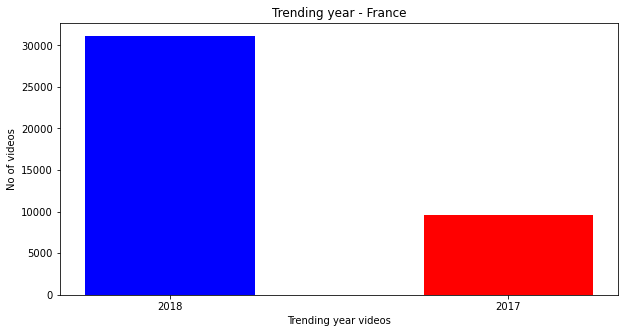

In [84]:
day=df_francia['trending_date'].dt.strftime('%Y')
total_dict=(day.value_counts()).to_dict()
count= pd.DataFrame(list(total_dict.items()),columns=['Trending year videos','No of videos'])

fig = plt.figure(figsize=(10,5))
plt.bar(count['Trending year videos'], count['No of videos'],color=['blue', 'red'], width=0.5)
plt.xlabel("Trending year videos")
plt.ylabel("No of videos")
plt.title("Trending year - France")
plt.show()

<AxesSubplot:title={'center':'Contenido viral - France'}>

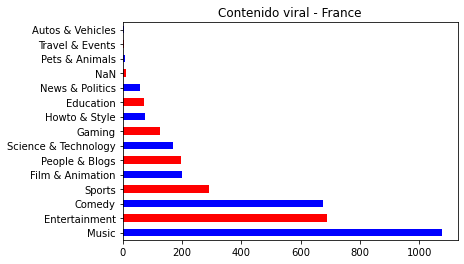

In [420]:
categoria = viralFr['category_name'].value_counts()
categoria.plot(kind='barh', title="Contenido viral - France",color=['blue','red'])

<ipython-input-99-d467f24a5557>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  b = a['category_name','likes'].max()


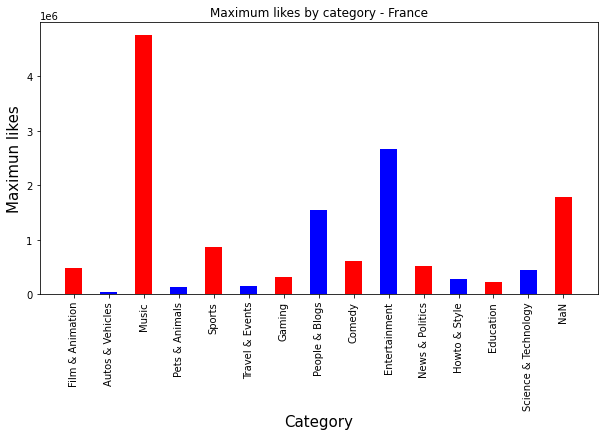

In [99]:
a = viralFr.groupby('category_id')
b = a['category_name','likes'].max()

fig=plt.figure(figsize=(10,5))
plt.bar(b['category_name'],b['likes'],color=['red','blue'],width=0.5)
plt.xticks(rotation=90)
plt.xlabel("Category",size=15)
plt.ylabel("Maximun likes",size=15)
plt.title("Maximum likes by category - France")
plt.show()

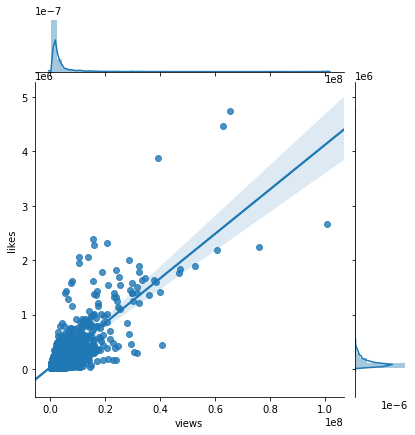

In [140]:
sns.jointplot(x='views', y='likes', data=viralFr,kind='reg')


#### Mostrar los principales canales

Text(0.5, 1.0, 'Main channels - France')

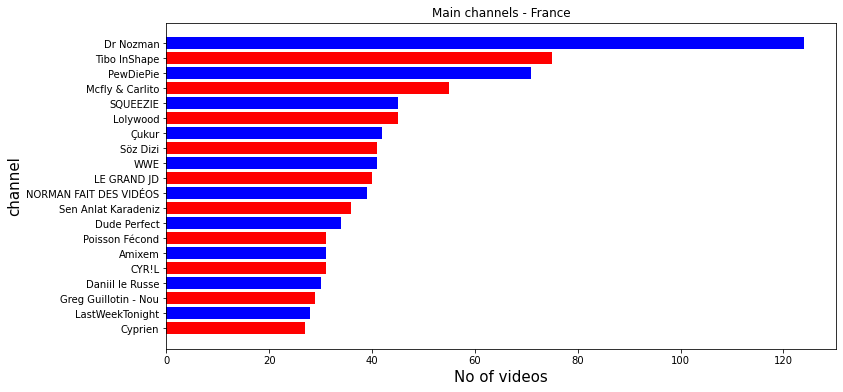

In [100]:
views_channels = viralFr.groupby('channel_title').size().reset_index(name="video_count").sort_values("video_count", ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('video_count')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['video_count'],color=['red','blue'])
plt.xlabel("No of videos",size=15)
plt.ylabel("channel",size=15)
plt.title("Main channels - France")

## Contenido polémico

In [88]:
polemicoFr = df_francia.sort_values(by = 'views', ascending = False)
polemicoFr.iloc[:50]

video_id trending_date  \
5342   FlsCjmMhFmw    2017-12-10   
5040   FlsCjmMhFmw    2017-12-09   
35902  7C2z4GqqS5E    2018-05-21   
35626  7C2z4GqqS5E    2018-05-20   
33720  VYOjWnS4cMY    2018-05-10   
4804   FlsCjmMhFmw    2017-12-08   
33469  VYOjWnS4cMY    2018-05-09   
1598   TyHvyGVs42U    2017-11-21   
16877  BhIEIO0vaBE    2018-02-08   
16608  BhIEIO0vaBE    2018-02-07   
21596  _I_D_8Z4sJE    2018-03-04   
24755  QwievZ1Tx-8    2018-03-20   
35431  7C2z4GqqS5E    2018-05-19   
1247   TyHvyGVs42U    2017-11-20   
11132  LsoLEjrDogU    2018-01-08   
24517  QwievZ1Tx-8    2018-03-19   
16389  BhIEIO0vaBE    2018-02-06   
12373  dfnCAmr569k    2018-01-16   
174    2Vv-BfVoq4g    2017-11-14   
38339  xTlNMmZKwpA    2018-06-02   
38732  aJOTlE1K90k    2018-06-04   
30355  ffxKSjUwKdU    2018-04-23   
38541  AhQcNVyndSM    2018-06-03   
10814  LsoLEjrDogU    2018-01-07   
33261  VYOjWnS4cMY    2018-05-08   
21357  _I_D_8Z4sJE    2018-03-03   
24309  QwievZ1Tx-8    2018-03-18   
1012   TyHvyGVs42U    2017-11-19   
23786  tCXGJQYZ9JA    2018-03-15   
12031  dfnCAmr569k    2018-01-15   
35689  yDiXQl7grPQ    2018-05-20   
29254  DPxL7dO5XPc    2018-04-17   
19396  xpVfcZ0ZcFM    2018-02-21   
30994  rRr1qiJRsXk    2018-04-26   
30668  u9Mv98Gr5pY    2018-04-25   
38424  aJOTlE1K90k    2018-06-03   
38032  xTlNMmZKwpA    2018-06-01   
30091  ffxKSjUwKdU    2018-04-22   
23060  -BQJo3vK8O8    2018-03-11   
4598   FlsCjmMhFmw    2017-12-07   
23539  tCXGJQYZ9JA    2018-03-14   
28892  9TUBf6l7FBg    2018-04-16   
10599  LsoLEjrDogU    2018-01-06   
19161  xpVfcZ0ZcFM    2018-02-20   
27437  FCfP7v9x8HI    2018-04-02   
35441  yDiXQl7grPQ    2018-05-19   
28909  DPxL7dO5XPc    2018-04-16   
11803  dfnCAmr569k    2018-01-14   
27145  FCfP7v9x8HI    2018-04-01   
25760  D86RtevtfrA    2018-03-25   

                                                   title  \
5342   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
5040   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
35902                BTS (방탄소년단) 'FAKE LOVE' Official MV   
35626                BTS (방탄소년단) 'FAKE LOVE' Official MV   
33720  Childish Gambino - This Is America (Official V...   
4804   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
33469  Childish Gambino - This Is America (Official V...   
1598           Luis Fonsi, Demi Lovato - Échame La Culpa   
16877                                    To Our Daughter   
16608                                    To Our Daughter   
21596  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...   
24755  Marvel Studios' Avengers: Infinity War - Offic...   
35431                BTS (방탄소년단) 'FAKE LOVE' Official MV   
1247           Luis Fonsi, Demi Lovato - Échame La Culpa   
11132  Bruno Mars - Finesse (Remix) [Feat. Cardi B] [...   
24517  Marvel Studios' Avengers: Infinity War - Offic...   
16389                                    To Our Daughter   
12373     Taylor Swift - End Game ft. Ed Sheeran, Future   
174          Ed Sheeran - Perfect (Official Music Video)   
38339  Cardi B, Bad Bunny & J Balvin - I Like It [Off...   
38732              Maroon 5 - Girls Like You ft. Cardi B   
30355               Ariana Grande - No Tears Left To Cry   
38541                      Brytiago X Darell - Asesina 🗡   
10814  Bruno Mars - Finesse (Remix) [Feat. Cardi B] [...   
33261  Childish Gambino - This Is America (Official V...   
21357  Nicky Jam x J. Balvin - X (EQUIS) | Video Oficial   
24309  Marvel Studios' Avengers: Infinity War - Offic...   
1012           Luis Fonsi, Demi Lovato - Échame La Culpa   
23786                            Taylor Swift - Delicate   
12031     Taylor Swift - End Game ft. Ed Sheeran, Future   
35689  Do You Hear Yanny or Laurel? (SOLVED with SCIE...   
29254        Lil Pump - ESSKEETIT (Official Music Video)   
19396                                 Drake - God’s Plan   
30994  Sanju | Official Teaser | Ranbir Kapoor | Rajk...   
30668                      VENOM - Official Trailer (HD)   
38424        

<AxesSubplot:title={'center':'Contenido polémico - France'}>

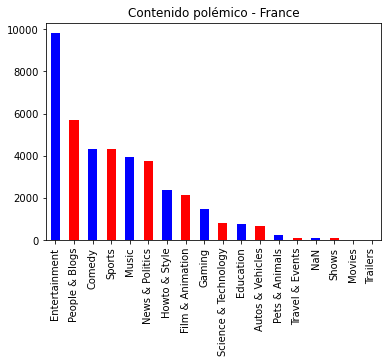

In [101]:
polemicoFr['category_name'].value_counts().plot(kind = "bar", title="Contenido polémico - France", color=['blue','red'])

<function matplotlib.pyplot.show(close=None, block=None)>

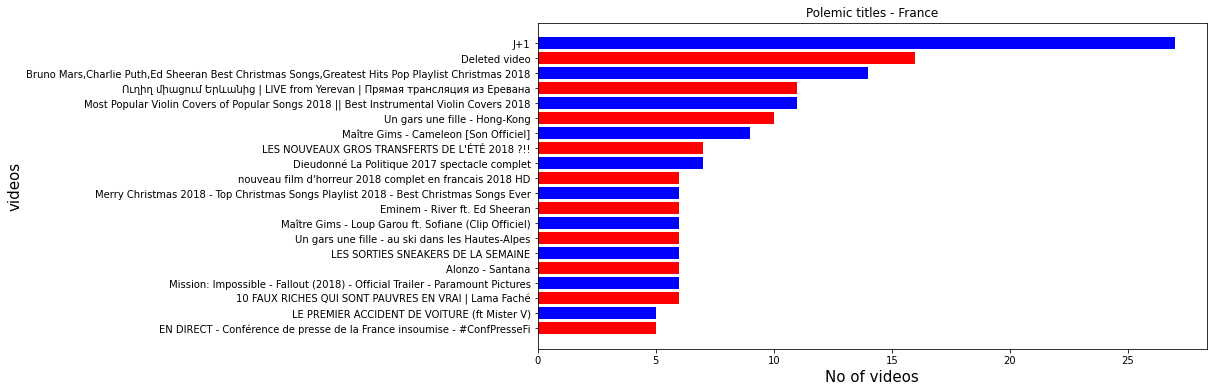

In [102]:
views_videos = polemicoFr.groupby('title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
videos_sort = views_videos.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(videos_sort['title'], videos_sort['views'],color=['red','blue'])
plt.xlabel("No of videos",size=15)
plt.ylabel("videos",size=15)
plt.title("Polemic titles - France")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

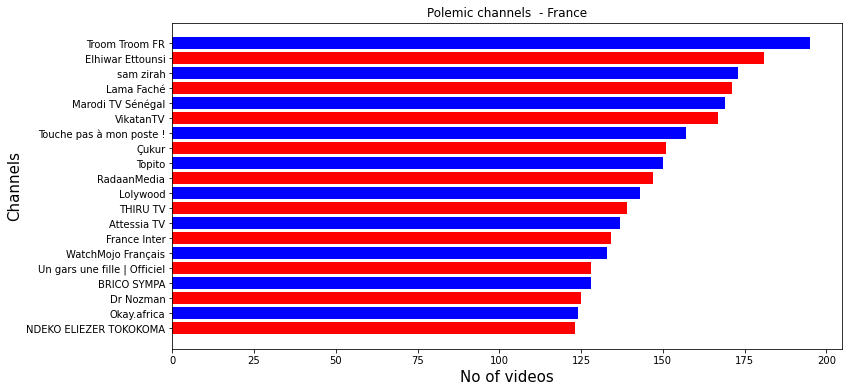

In [103]:
views_channels = polemicoFr.groupby('channel_title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['views'],color=['red','blue'])
plt.xlabel("No of videos",size=15)
plt.ylabel("Channels",size=15)
plt.title("Polemic channels  - France")
plt.show

## Seccion especifica

In [104]:
seccionFr = df_francia[df_francia['category_name'] == 'Film & Animation']
seccionFr.head()

video_id trending_date  \
29   8YEGqrtsxBc    2017-11-14   
89   oo12BXzMkfI    2017-11-14   
121  q1IyHz7BR2Y    2017-11-14   
155  nWGKA8OULxU    2017-11-14   
158  RKgk0DXZCvQ    2017-11-14   

                                                 title   channel_title  \
29   6 CRITIQUES OCT/NOV (Thor 3 / Carbone / Au Rev...      INTHEPANDA   
89          猎场 | Game Of Hunting 14【TV版】（胡歌、張嘉譯、祖峰等主演）            大劇獨播   
121  Նռան հատիկ, Սերիա 46 / Pomegranate seed / Nran...  PanArmenian TV   
155                             Beni Affet 1253. Bölüm      Beni Affet   
158  Réalité 3 Fatou Barcelon Herman Belvie Coquett...       esepelisa   

     category_id        publish_time  \
29             1 2017-11-12 12:59:45   
89             1 2017-11-13 16:00:02   
121            1 2017-11-13 18:30:01   
155            1 2017-11-13 14:18:16   
158            1 2017-11-13 16:00:05   

                                                  tags   views  likes  \
29   INTHEPANDA"|"INTHEPANDA CRITIQUE"|"INTHEPANDA ...  102804   6306   
89   電視劇"|"大陸電視劇"|"猎场"|"职场"|"商战"|"爱情"|"都市"|"胡歌"|"陈龙...   48796     99   
121  Նռան հատիկ"|"Սերիա 46"|"Pomegranate seed"|"Nra...   54031    227   
155  beni affet dizi"|"ceren yalazoğlu"|"beni affet...  123529   1370   
158  esepelisa"|"theatre congolais"|"theatre"|"rdc"...    6708     98   

     dislikes  comment_count     category_name  capitalized  
29        179            421  Film & Animation         True  
89         19             73  Film & Animation         True  
121        35             72  Film & Animation        False  
155       180            255  Film & Animation        False  
158         4             31  Film & Animation        False

<function matplotlib.pyplot.show(close=None, block=None)>

/Users/learning/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/learning/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/learning/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 29544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/learning/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25773 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/learning/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/learning/opt/anaconda3/lib/python3.8/site-pac

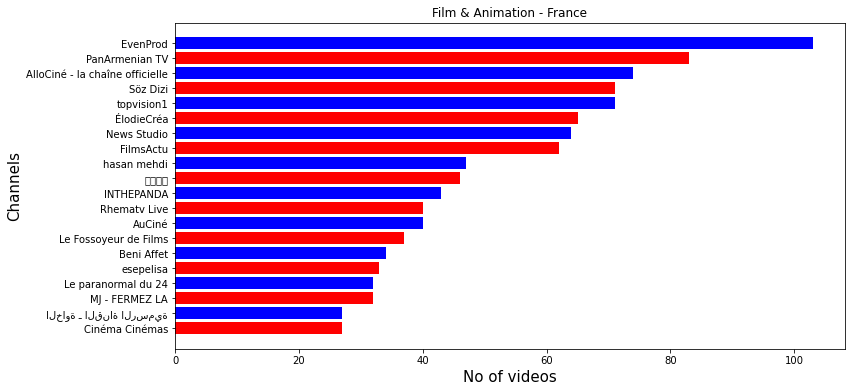

In [105]:
views_channels = seccionFr.groupby('channel_title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['views'],color=['red','blue'])
plt.xlabel("No of videos",size=15)
plt.ylabel("Channels",size=15)
plt.title("Film & Animation - France")

plt.show

## Mejor rango de duracion de video

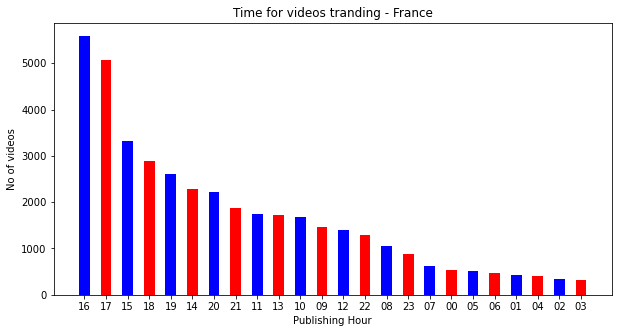

In [106]:
hour = polemicoFr.publish_time.apply(lambda x: x.strftime("%H"))
total_dict=(hour.value_counts().to_dict())
count= pd.DataFrame(list(total_dict.items()),columns = ['Publishing Hour', 'No of videos'])
fig=plt.figure(figsize=(10,5))
plt.bar(count['Publishing Hour'],count['No of videos'],color=['blue','red'],width=0.5)
plt.xlabel("Publishing Hour")
plt.ylabel("No of videos")
plt.title("Time for videos tranding - France")
plt.show()

In [107]:
df_francia['Trending dif_days'] = df_francia.apply(lambda row: (row.trending_date-row.publish_time).days, axis = 1)
df_francia.head()

video_id trending_date  \
0  Ro6eob0LrCY    2017-11-14   
1  Yo84eqYwP98    2017-11-14   
2  ceqntSXE-10    2017-11-14   
3  WuTFI5qftCE    2017-11-14   
4  ee6OFs8TdEg    2017-11-14   

                                               title        channel_title  \
0           Malika LePen : Femme de Gauche - Trailer  Le Raptor Dissident   
1  LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...              Le Labo   
2  DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...      Daniil le Russe   
3                    PAPY GRENIER - METAL GEAR SOLID    Joueur Du Grenier   
4  QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...    Aurelien Fontenoy   

   category_id        publish_time  \
0           24 2017-11-13 17:32:55   
1           24 2017-11-12 15:00:02   
2           23 2017-11-13 17:00:38   
3           20 2017-11-12 17:00:02   
4           17 2017-11-13 16:30:03   

                                                tags   views  likes  dislikes  \
0  Raptor"|"Dissident"|"Expliquez"|"moi"|"cette"|...  212702  29282      1108   
1                                             [none]  432721  14053       576   
2      cartoon"|"pokémon"|"école"|"ours"|"мультфильм  482153  76203       477   
3  Papy grenier"|"Metal Gear Solid"|"PS1"|"Tirage...  925222  85016       550   
4  vélo"|"vtt"|"bmx"|"freestyle"|"bike"|"mtb"|"di...  141695   8091        72   

   comment_count  category_name  capitalized  Trending dif_days  
0           3817  Entertainment        False                  0  
1           1161  Entertainment         True                  1  
2           9580         Comedy         True                  0  
3           4303         Gaming         True                  1  
4            481         Sports         True                  0

## Tags que podrian posicionarlo mejor

In [108]:
titulo = df_francia['title'].value_counts(ascending = False).to_frame()
titulo.head(5)

title
J+1                                                    27
Deleted video                                          16
Bruno Mars,Charlie Puth,Ed Sheeran Best Christm...     14
Ուղիղ միացում Երևանից | LIVE from Yerevan | Пря...     11
Most Popular Violin Covers of Popular Songs 201...     11

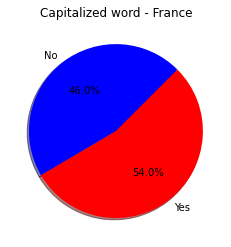

In [109]:
def capitalized_word(title):
    for i in title.split():
        if i.isupper():
            return True
    return False
df_francia["capitalized"] = df_francia["title"].apply(capitalized_word)
counts_capitalized = df_francia["capitalized"].value_counts().to_dict()
plt.pie([counts_capitalized[False], counts_capitalized[True]], labels=['No', 'Yes'], autopct='%1.1f%%', shadow=True, colors=['blue', 'red'],startangle=45)
plt.title("Capitalized word - France")

plt.show()

## Caracteristicas titulo video

In [110]:
titulo = df_francia['tags'].value_counts(ascending = False).to_frame()
titulo.head(5)

tags
[none]                                              5304
senegal"|"video"|"divertissement"|"humour"|"you...   130
hkayet tounsia"|"elhiwar ettounsi"|"denya okhra...   124
Vaani rani"|"rani"|"Radhika in funny character"...    97
oook.sn"|"senegaltv"|"maroditv"|"leuztv"|"walft...    65

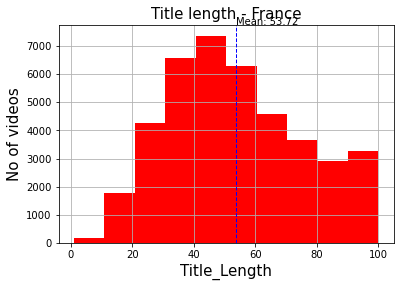

In [111]:
df_francia["title_length"] = df_francia["title"].apply(lambda x: len(x))
fig = df_canada['title_length'].hist(color="red")
fig.axvline(df_francia['title_length'].mean(), color='blue', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
fig.text(df_francia['title_length'].mean(), max_ylim, 'Mean: {:.2f}'.format(df_francia['title_length'].mean()))
plt.xlabel("Title_Length",fontsize=15)
plt.ylabel("No of videos",fontsize=15)
plt.title("Title length - France",size=15)
plt.show()

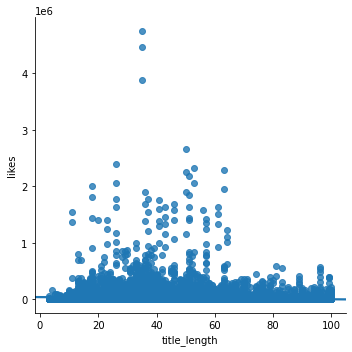

In [156]:
sns.lmplot(x="title_length", y="likes", data = df_francia)

# GREAT BRITAIN

In [112]:
great_britain = pd.read_csv('GBvideos.csv')
great_britain

video_id trending_date  \
0      Jw1Y-zhQURU      17.14.11   
1      3s1rvMFUweQ      17.14.11   
2      n1WpP7iowLc      17.14.11   
3      PUTEiSjKwJU      17.14.11   
4      rHwDegptbI4      17.14.11   
...            ...           ...   
38911  l884wKofd54      18.14.06   
38912  IP8k2xkhOdI      18.14.06   
38913  Il-an3K9pjg      18.14.06   
38914  -DRsfNObKIQ      18.14.06   
38915  4YFo4bdMO8Q      18.14.06   

                                                   title  \
0          John Lewis Christmas Ad 2017 - #MozTheMonster   
1              Taylor Swift: …Ready for It? (Live) - SNL   
2             Eminem - Walk On Water (Audio) ft. Beyoncé   
3      Goals from Salford City vs Class of 92 and Fri...   
4      Dashcam captures truck's near miss with child ...   
...                                                  ...   
38911  Enrique Iglesias - MOVE TO MIAMI (Official Vid...   
38912  Jacob Sartorius - Up With It (Official Music V...   
38913                 Anne-Marie - 2002 [Official Video]   
38914  Eleni Foureira - Fuego - Cyprus - LIVE - First...   
38915  KYLE - Ikuyo feat.  2 Chainz & Sophia Black [A...   

                    channel_title  category_id              publish_time  \
0                      John Lewis           26  2017-11-10T07:38:29.000Z   
1             Saturday Night Live           24  2017-11-12T06:24:44.000Z   
2                      EminemVEVO           10  2017-11-10T17:00:03.000Z   
3      Salford City Football Club           17  2017-11-13T02:30:38.000Z   
4                Cute Girl Videos           25  2017-11-13T01:45:13.000Z   
...                           ...          ...                       ...   
38911         EnriqueIglesiasVEVO           10  2018-05-09T07:00:01.000Z   
38912             Jacob Sartorius           10  2018-05-11T17:09:16.000Z   
38913                  Anne-Marie           10  2018-05-08T11:05:08.000Z   
38914     Eurovision Song Contest           24  2018-05-08T20:32:32.000Z   
38915              SuperDuperKyle           10  2018-05-11T04:06:35.000Z   

                                                    tags     views   likes  \
0      christmas|"john lewis christmas"|"john lewis"|...   7224515   55681   
1      SNL|"Saturday Night Live"|"SNL Season 43"|"Epi...   1053632   25561   
2      Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787420   
3      Salford City FC|"Salford City"|"Salford"|"Clas...     27833     193   
4                                                 [none]      9815      30   
...                                                  ...       ...     ...   
38911  Enrique Iglesias feat. Pitbull|"MOVE TO MIAMI"...  25066952  268088   
38912  jacob sartorius|"jacob"|"up with it"|"jacob sa...   1492219   61998   
38913  anne|"marie"|"anne-marie"|"2002"|"two thousand...  29641412  394830   
38914  Eurovision Song Contest|"2018"|"Lisbon"|"Cypru...  14317515  151870   
38915  Kyle|"SuperDuperKyle"|"Ikuyo"|"2 Chainz"|"Soph...    607552   18271   

       dislikes  comment_count  \
0         10247           9479   
1          2294           2757   
2         43420         125882   
3            12             37   
4             2             30   
...         ...            ...   
38911     12783           9933   
38912     13781          24330   
38913      8892          19988   
38914     45875          26766   
38915       274           1423   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg              False   
1      https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg              False   
2      https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg              False   
3      https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg              False   
4      https://i.ytimg.com/vi/rHwDegptbI4/default.jpg              False   
...                                               ...                ...   
38911  https://i.ytimg.com/vi/l884wKofd54/default.jpg            

In [113]:
great_britain= great_britain.drop(['thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description'], axis = 1)

In [114]:
great_britain['category_name'] = great_britain['category_id'].apply(lambda x: dict_categoria.get(x, 'NaN'))

In [115]:
great_britain['trending_date'] = pd.to_datetime(pd.Series(great_britain['trending_date'].apply(lambda x:'20'+x[0:2]+'.'+x[6:]+'.'+x[3:5])))
great_britain['publish_time'] = pd.to_datetime(pd.Series(great_britain['publish_time'].apply(lambda x:x[:19])))

In [116]:
df_great_britain = great_britain.copy()
df_great_britain.head()

video_id trending_date  \
0  Jw1Y-zhQURU    2017-11-14   
1  3s1rvMFUweQ    2017-11-14   
2  n1WpP7iowLc    2017-11-14   
3  PUTEiSjKwJU    2017-11-14   
4  rHwDegptbI4    2017-11-14   

                                               title  \
0      John Lewis Christmas Ad 2017 - #MozTheMonster   
1          Taylor Swift: …Ready for It? (Live) - SNL   
2         Eminem - Walk On Water (Audio) ft. Beyoncé   
3  Goals from Salford City vs Class of 92 and Fri...   
4  Dashcam captures truck's near miss with child ...   

                channel_title  category_id        publish_time  \
0                  John Lewis           26 2017-11-10 07:38:29   
1         Saturday Night Live           24 2017-11-12 06:24:44   
2                  EminemVEVO           10 2017-11-10 17:00:03   
3  Salford City Football Club           17 2017-11-13 02:30:38   
4            Cute Girl Videos           25 2017-11-13 01:45:13   

                                                tags     views   likes  \
0  christmas|"john lewis christmas"|"john lewis"|...   7224515   55681   
1  SNL|"Saturday Night Live"|"SNL Season 43"|"Epi...   1053632   25561   
2  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787420   
3  Salford City FC|"Salford City"|"Salford"|"Clas...     27833     193   
4                                             [none]      9815      30   

   dislikes  comment_count    category_name  
0     10247           9479    Howto & Style  
1      2294           2757    Entertainment  
2     43420         125882            Music  
3        12             37           Sports  
4         2             30  News & Politics

In [117]:
df_great_britain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   video_id       38916 non-null  object        
 1   trending_date  38916 non-null  datetime64[ns]
 2   title          38916 non-null  object        
 3   channel_title  38916 non-null  object        
 4   category_id    38916 non-null  int64         
 5   publish_time   38916 non-null  datetime64[ns]
 6   tags           38916 non-null  object        
 7   views          38916 non-null  int64         
 8   likes          38916 non-null  int64         
 9   dislikes       38916 non-null  int64         
 10  comment_count  38916 non-null  int64         
 11  category_name  38916 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 3.6+ MB


In [118]:
df_great_britain.isnull().sum()

video_id         0
trending_date    0
title            0
channel_title    0
category_id      0
publish_time     0
tags             0
views            0
likes            0
dislikes         0
comment_count    0
category_name    0
dtype: int64

In [119]:
df_francia.describe(include="object")

video_id  title   channel_title    tags  category_name
count         40724  40724           40724   40724          40724
unique        30581  30544            6680   22903             18
top     Rter-Np-Td0    J+1  Troom Troom FR  [none]  Entertainment
freq              6     27             195    5304           9819

In [120]:
df_great_britain['category_name'].unique()

array(['Howto & Style', 'Entertainment', 'Music', 'Sports',
       'News & Politics', 'People & Blogs', 'Comedy',
       'Science & Technology', 'Pets & Animals', 'Education',
       'Film & Animation', 'Gaming', 'Autos & Vehicles',
       'Travel & Events', 'NaN', 'Shows'], dtype=object)

## Contenido viral 

In [121]:
views_mediaGb = df_great_britain['views'].mean() 
print(views_mediaGb)
likes_mediaGb = df_great_britain['likes'].mean()
print(likes_mediaGb)
comments_mediaGb = df_great_britain['comment_count'].mean()
print(comments_mediaGb)

5911943.62663172
134519.55349984582
13088.353145235893


In [122]:
viralGb = df_great_britain[(df_great_britain['views'] > views_mediaGb) & (df_great_britain['likes'] > likes_mediaGb) & (df_great_britain['comment_count'] > comments_mediaGb)]
viralGb.iloc[:50]

video_id trending_date  \
2     n1WpP7iowLc    2017-11-14   
6     2Vv-BfVoq4g    2017-11-14   
53    9wg3v-01yKQ    2017-11-14   
84    E7q_wbbwGyU    2017-11-14   
93    R59TevgzN3k    2017-11-14   
97    axVvZrDz60k    2017-11-14   
140   jSJr3dXZfcg    2017-11-14   
147   V54CEElTF_U    2017-11-14   
177   nVzA1uWTydQ    2017-11-14   
219   n1WpP7iowLc    2017-11-15   
228   2Vv-BfVoq4g    2017-11-15   
276   9wg3v-01yKQ    2017-11-15   
312   R59TevgzN3k    2017-11-15   
315   E7q_wbbwGyU    2017-11-15   
319   axVvZrDz60k    2017-11-15   
351   jSJr3dXZfcg    2017-11-15   
357   V54CEElTF_U    2017-11-15   
385   nVzA1uWTydQ    2017-11-15   
427   n1WpP7iowLc    2017-11-16   
440   2Vv-BfVoq4g    2017-11-16   
492   9wg3v-01yKQ    2017-11-16   
522   R59TevgzN3k    2017-11-16   
523   E7q_wbbwGyU    2017-11-16   
527   axVvZrDz60k    2017-11-16   
560   jSJr3dXZfcg    2017-11-16   
566   V54CEElTF_U    2017-11-16   
572   TbfxmTQkLAE    2017-11-16   
592   nVzA1uWTydQ    2017-11-16   
666   n1WpP7iowLc    2017-11-17   
685   2Vv-BfVoq4g    2017-11-17   
726   9wg3v-01yKQ    2017-11-17   
759   E7q_wbbwGyU    2017-11-17   
762   R59TevgzN3k    2017-11-17   
765   axVvZrDz60k    2017-11-17   
783   CyzEtbG-sxY    2017-11-17   
798   fRj34o4hN4I    2017-11-18   
876   n1WpP7iowLc    2017-11-18   
895   2Vv-BfVoq4g    2017-11-18   
898   9t9u_yPEidY    2017-11-18   
940   9wg3v-01yKQ    2017-11-18   
974   E7q_wbbwGyU    2017-11-18   
978   R59TevgzN3k    2017-11-18   
980   axVvZrDz60k    2017-11-18   
997   CyzEtbG-sxY    2017-11-18   
1001  fRj34o4hN4I    2017-11-19   
1013  6uJf2IT2Zh8    2017-11-19   
1021  ixxR3ZoqnF0    2017-11-19   
1091  n1WpP7iowLc    2017-11-19   
1103  2Vv-BfVoq4g    2017-11-19   
1108  9t9u_yPEidY    2017-11-19   

                                                  title       channel_title  \
2            Eminem - Walk On Water (Audio) ft. Beyoncé          EminemVEVO   
6           Ed Sheeran - Perfect (Official Music Video)          Ed Sheeran   
53                                  Harry Styles - Kiwi     HarryStylesVEVO   
84          Liam Payne - Bedroom Floor (Official Video)       LiamPayneVEVO   
93                           Samsung Galaxy: Growing Up  Samsung Mobile USA   
97    [EXID(이엑스아이디)] 덜덜덜(DDD) 뮤직 비디오 (Official Music...       EXID_OFFICIAL   
140   World of Warcraft: Battle for Azeroth Cinemati...   World of Warcraft   
147   Taylor Swift - Call It What You Want (Lyric Vi...     TaylorSwiftVEVO   
177   Selena Gomez, Marshmello - Wolves (Vertical Vi...     SelenaGomezVEVO   
219          Eminem - Walk On Water (Audio) ft. Beyoncé          EminemVEVO   
228         Ed Sheeran - Perfect (Official Music Video)          Ed Sheeran   
276                                 Harry Styles - Kiwi     HarryStylesVEVO   
312                          Samsung Galaxy: Growing Up  Samsung Mobile USA   
315         Liam Payne - Bedroom Floor (Official Video)       LiamPayneVEVO   
319   [EXID(이엑스아이디)] 덜덜덜(DDD) 뮤직 비디오 (Official Music...       EXID_OFFICIAL   
351   World of Warcraft: Battle for Azeroth Cinemati...   World of Warcraft   
357   Taylor Swift - Call It What You Want (Lyric Vi...     TaylorSwiftVEVO   
385   Selena Gomez, Marshmello - Wolves (Vertical Vi...     SelenaGomezVEVO   
427          Eminem - Walk On Water (Audio) ft. Beyoncé          EminemVEVO   
440         Ed Sheeran - Perfect (Official Music Video)          Ed Sheeran   
492                                 Harry Styles - Kiwi     HarryStylesVEVO   
522                          Samsung Galaxy: Growing Up  Samsung Mobile USA   
523         Liam Payne - Bedroom Floor (Official Video)       LiamPayneVEVO   
527   [EXID(이엑스아이디)] 덜덜덜(DDD) 뮤직 비디오 (Official Music...       EXID_OFFICIAL   
560   World of Warcraft: Battle for Azeroth Cinemati...   World of Warcraft   
566   Taylor Swift - Call It What You Want (Lyric Vi...     TaylorSwiftVEVO   
572    Migos, Nicki Minaj, Cardi B - MotorSport (Audio)           MigosVEVO   
592   Selen

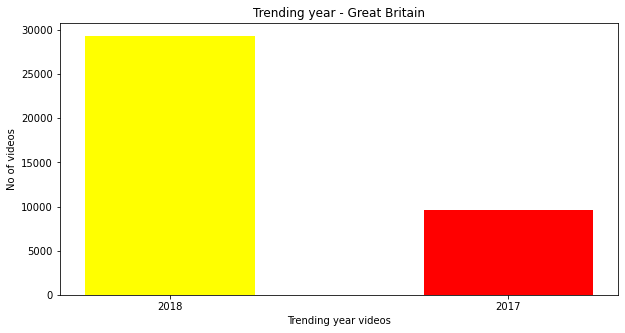

In [123]:
day=df_great_britain['trending_date'].dt.strftime('%Y')
total_dict=(day.value_counts()).to_dict()
count= pd.DataFrame(list(total_dict.items()),columns=['Trending year videos','No of videos'])

fig = plt.figure(figsize=(10,5))
plt.bar(count['Trending year videos'], count['No of videos'],color=['yellow', 'red'], width=0.5)
plt.xlabel("Trending year videos")
plt.ylabel("No of videos")
plt.title("Trending year - Great Britain")
plt.show()

<AxesSubplot:title={'center':'Contenido viral - Great Britain'}>

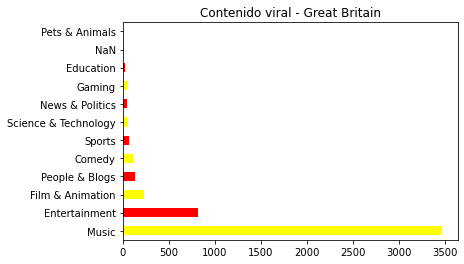

In [124]:
categoria = viralGb['category_name'].value_counts()
categoria.plot(kind='barh', title="Contenido viral - Great Britain",color=['yellow','red'])

<ipython-input-125-b856942baa74>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  b = a['category_name','likes'].max()


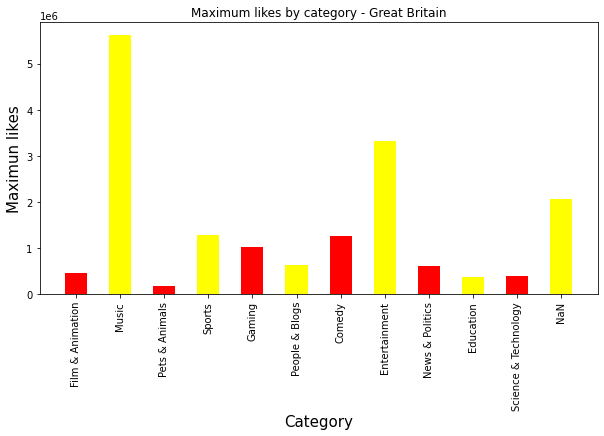

In [125]:
a = viralGb.groupby('category_id')
b = a['category_name','likes'].max()

fig=plt.figure(figsize=(10,5))
plt.bar(b['category_name'],b['likes'],color=['red','yellow'],width=0.5)
plt.xticks(rotation=90)
plt.xlabel("Category",size=15)
plt.ylabel("Maximun likes",size=15)
plt.title("Maximum likes by category - Great Britain")
plt.show()

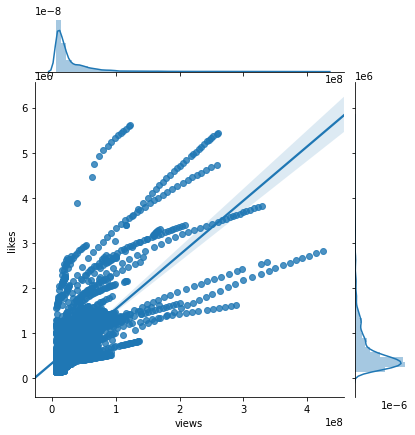

In [172]:
sns.jointplot(x='views', y='likes', data=viralGb,kind='reg')


#### Mostrar los principales canales

<function matplotlib.pyplot.show(close=None, block=None)>

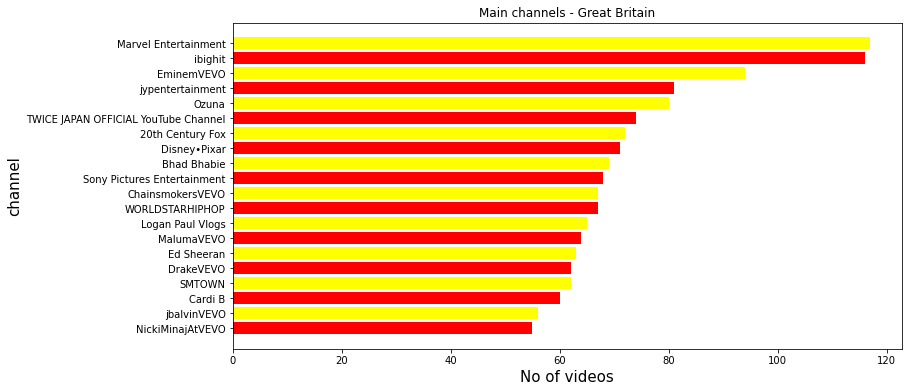

In [126]:
views_channels = viralGb.groupby('channel_title').size().reset_index(name="video_count").sort_values("video_count", ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('video_count')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['video_count'],color=['red','yellow'])
plt.xlabel("No of videos",size=15)
plt.ylabel("channel",size=15)
plt.title("Main channels - Great Britain")

plt.show

## Contenido polémico

In [129]:
polemicoGb = df_great_britain.sort_values(by = 'views', ascending = False)
polemicoGb.iloc[:50]

video_id trending_date  \
28412  _I_D_8Z4sJE    2018-04-07   
28212  _I_D_8Z4sJE    2018-04-06   
28008  _I_D_8Z4sJE    2018-04-05   
27811  _I_D_8Z4sJE    2018-04-04   
27615  _I_D_8Z4sJE    2018-04-03   
27424  _I_D_8Z4sJE    2018-04-02   
27241  _I_D_8Z4sJE    2018-04-01   
27052  _I_D_8Z4sJE    2018-03-31   
26861  _I_D_8Z4sJE    2018-03-30   
34460  9jI-z9QN6g8    2018-05-18   
25545  kLpH1nSLJSs    2018-03-23   
34292  9jI-z9QN6g8    2018-05-17   
26671  _I_D_8Z4sJE    2018-03-29   
25341  kLpH1nSLJSs    2018-03-22   
25137  kLpH1nSLJSs    2018-03-21   
26477  _I_D_8Z4sJE    2018-03-28   
24935  kLpH1nSLJSs    2018-03-20   
24738  kLpH1nSLJSs    2018-03-19   
24540  kLpH1nSLJSs    2018-03-18   
26280  _I_D_8Z4sJE    2018-03-27   
33729  9jI-z9QN6g8    2018-05-14   
24339  kLpH1nSLJSs    2018-03-17   
33613  9jI-z9QN6g8    2018-05-13   
24137  kLpH1nSLJSs    2018-03-16   
21162  wfWkmURBNv8    2018-03-01   
26079  _I_D_8Z4sJE    2018-03-26   
23938  kLpH1nSLJSs    2018-03-15   
20957  wfWkmURBNv8    2018-02-28   
23728  kLpH1nSLJSs    2018-03-14   
33441  9jI-z9QN6g8    2018-05-12   
25883  _I_D_8Z4sJE    2018-03-25   
23528  kLpH1nSLJSs    2018-03-13   
20752  wfWkmURBNv8    2018-02-27   
23324  kLpH1nSLJSs    2018-03-12   
33270  9jI-z9QN6g8    2018-05-11   
25688  _I_D_8Z4sJE    2018-03-24   
20551  wfWkmURBNv8    2018-02-26   
23122  kLpH1nSLJSs    2018-03-11   
38401  VYOjWnS4cMY    2018-06-11   
38235  VYOjWnS4cMY    2018-06-10   
25936  xpVfcZ0ZcFM    2018-03-25   
33106  9jI-z9QN6g8    2018-05-10   
38056  VYOjWnS4cMY    2018-06-09   
20353  wfWkmURBNv8    2018-02-25   
25482  _I_D_8Z4sJE    2018-03-23   
22926  kLpH1nSLJSs    2018-03-10   
37879  VYOjWnS4cMY    2018-06-08   
25741  xpVfcZ0ZcFM    2018-03-24   
37705  VYOjWnS4cMY    2018-06-07   
32939  9jI-z9QN6g8    2018-05-09   

                                                   title        channel_title  \
28412  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...           NickyJamTV   
28212  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...           NickyJamTV   
28008  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...           NickyJamTV   
27811  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...           NickyJamTV   
27615  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...           NickyJamTV   
27424  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...           NickyJamTV   
27241  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...           NickyJamTV   
27052  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...           NickyJamTV   
26861  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...           NickyJamTV   
34460  Te Bote Remix - Casper, Nio García, Darell, Ni...        Flow La Movie   
25545               Bad Bunny - Amorfoda | Video Oficial            Bad Bunny   
34292  Te Bote Remix - Casper, Nio García, Darell, Ni...        Flow La Movie   
26671  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...           NickyJamTV   
25341               Bad Bunny - Amorfoda | Video Oficial            Bad Bunny   
25137               Bad Bunny - Amorfoda | Video Oficial            Bad Bunny   
26477  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...           NickyJamTV   
24935               Bad Bunny - Amorfoda | Video Oficial            Bad Bunny   
24738               Bad Bunny - Amorfoda | Video Oficial            Bad Bunny   
24540               Bad Bunny - Amorfoda | Video Oficial            Bad Bunny   
26280  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...           NickyJamTV   
33729  Te Bote Remix - Casper, Nio García, Darell, Ni...        Flow La Movie   
24339               Bad Bunny - Amorfoda | Video Oficial            Bad Bunny   
33613  Te Bote Remix - Casper, Nio García, Darell, Ni...        Flow La Movie   
24137               Bad Bunny - Amorfoda | Video Oficial            Bad Bunny   
21162           Ozuna x Romeo Santos - El Farsante Remix                Ozuna   
26079  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...           

<AxesSubplot:title={'center':'Contenido polémico - Great Britain'}>

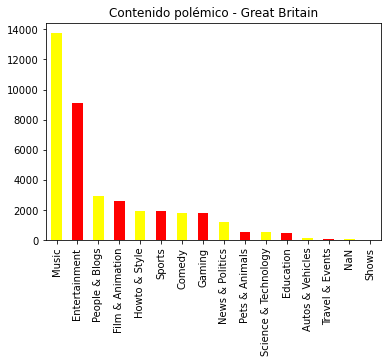

In [130]:
polemicoGb['category_name'].value_counts().plot(kind = "bar", title="Contenido polémico - Great Britain", color=['yellow','red'])

<function matplotlib.pyplot.show(close=None, block=None)>

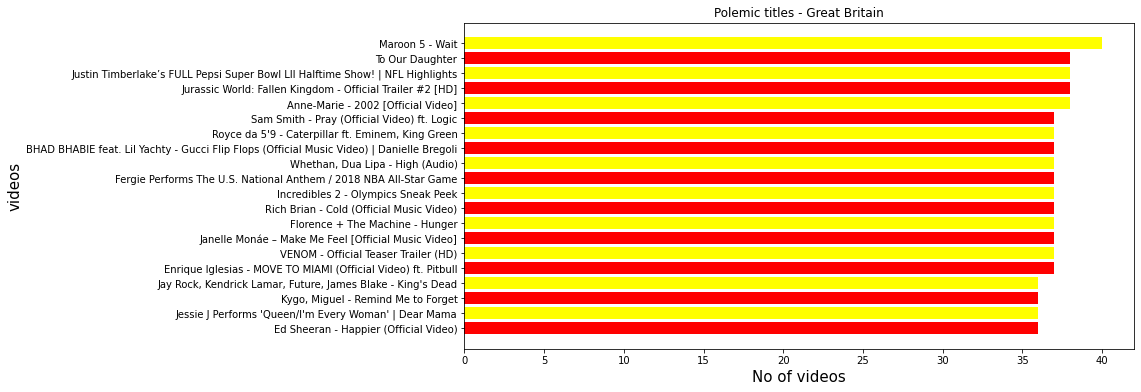

In [133]:
views_videos = polemicoGb.groupby('title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
videos_sort = views_videos.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(videos_sort['title'], videos_sort['views'],color=['red','yellow'])
plt.xlabel("No of videos",size=15)
plt.ylabel("videos",size=15)
plt.title("Polemic titles - Great Britain")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

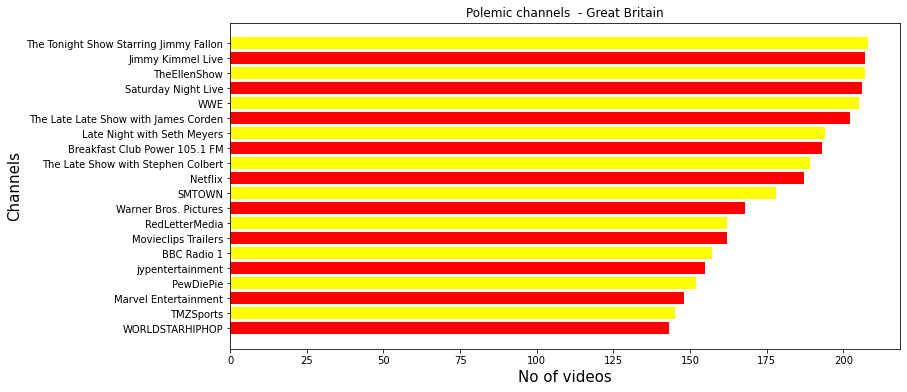

In [134]:
views_channels = polemicoGb.groupby('channel_title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['views'],color=['red','yellow'])
plt.xlabel("No of videos",size=15)
plt.ylabel("Channels",size=15)
plt.title("Polemic channels  - Great Britain")
plt.show

## Sección especifica

In [135]:
seccionGb = df_great_britain[df_great_britain['category_name'] == 'Film & Animation']
seccionGb.head()

video_id trending_date  \
54   nrXlY6gzTTM    2017-11-14   
59   A8ScwhLh7uo    2017-11-14   
175  l9Rwc7-p5uA    2017-11-14   
189  bCznvAkpwWs    2017-11-14   
196  OXZQ5DfSAAc    2017-11-14   

                                                 title        channel_title  \
54   The Post | Official Trailer [HD] | 20th Centur...     20th Century Fox   
59                   Honest Trailers - Stranger Things       Screen Junkies   
175                           Oats Studios - Praetoria         Oats Studios   
189        Warner Bros - Justice League B-Roll Footage       DaLordz Prince   
196   I, Tonya Trailer #1 (2017) | Movieclips Trailers  Movieclips Trailers   

     category_id        publish_time  \
54             1 2017-11-08 05:31:00   
59             1 2017-11-07 18:00:01   
175            1 2017-11-03 17:13:31   
189            1 2017-11-03 13:16:47   
196            1 2017-11-01 16:40:51   

                                                  tags    views  likes  \
54   Trailer|"Steven Spielberg"|"ThePost"|"Meryl St...  2794165   8874   
59   screenjunkies|"screen junkies"|"honest trailer...  3037613  91393   
175                                             [none]   333552  13372   
189  Warner bros|"Justice League"|"DC Films"|"Batma...    44921    688   
196  Skate|"Competition"|"I Tonya"|"I Tonya trailer...   750287   8010   

     dislikes  comment_count     category_name  
54        939           1439  Film & Animation  
59       2766           7176  Film & Animation  
175       454           1010  Film & Animation  
189        19              0  Film & Animation  
196       149            320  Film & Animation

<function matplotlib.pyplot.show(close=None, block=None)>

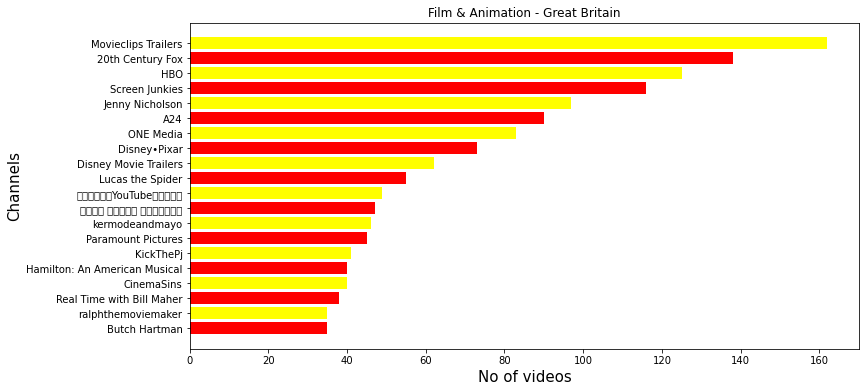

In [137]:
views_channels = seccionGb.groupby('channel_title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['views'],color=['red','yellow'])
plt.xlabel("No of videos",size=15)
plt.ylabel("Channels",size=15)
plt.title("Film & Animation - Great Britain")
plt.show

## Mejor rango de duracion de video

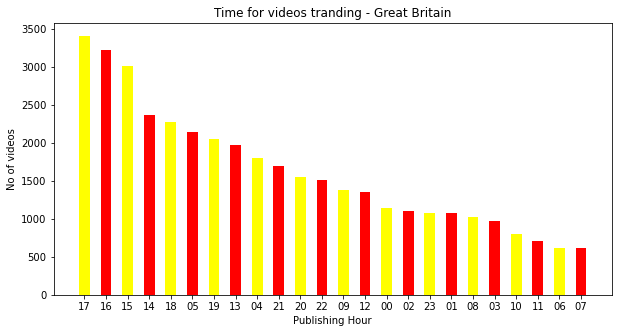

In [138]:
hour = polemicoGb.publish_time.apply(lambda x: x.strftime("%H"))
total_dict=(hour.value_counts().to_dict())
count= pd.DataFrame(list(total_dict.items()),columns = ['Publishing Hour', 'No of videos'])
fig=plt.figure(figsize=(10,5))
plt.bar(count['Publishing Hour'],count['No of videos'],color=['yellow','red'],width=0.5)
plt.xlabel("Publishing Hour")
plt.ylabel("No of videos")
plt.title("Time for videos tranding - Great Britain")
plt.show()

In [191]:
df_great_britain['Trending dif_days'] = df_great_britain.apply(lambda row: (row.trending_date-row.publish_time).days, axis = 1)
df_great_britain.head()

video_id trending_date  \
0  Jw1Y-zhQURU    2017-11-14   
1  3s1rvMFUweQ    2017-11-14   
2  n1WpP7iowLc    2017-11-14   
3  PUTEiSjKwJU    2017-11-14   
4  rHwDegptbI4    2017-11-14   

                                               title  \
0      John Lewis Christmas Ad 2017 - #MozTheMonster   
1          Taylor Swift: …Ready for It? (Live) - SNL   
2         Eminem - Walk On Water (Audio) ft. Beyoncé   
3  Goals from Salford City vs Class of 92 and Fri...   
4  Dashcam captures truck's near miss with child ...   

                channel_title  category_id        publish_time  \
0                  John Lewis           26 2017-11-10 07:38:29   
1         Saturday Night Live           24 2017-11-12 06:24:44   
2                  EminemVEVO           10 2017-11-10 17:00:03   
3  Salford City Football Club           17 2017-11-13 02:30:38   
4            Cute Girl Videos           25 2017-11-13 01:45:13   

                                                tags     views   likes  \
0  christmas|"john lewis christmas"|"john lewis"|...   7224515   55681   
1  SNL|"Saturday Night Live"|"SNL Season 43"|"Epi...   1053632   25561   
2  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787420   
3  Salford City FC|"Salford City"|"Salford"|"Clas...     27833     193   
4                                             [none]      9815      30   

   dislikes  comment_count    category_name  Trending dif_days  
0     10247           9479    Howto & Style                  3  
1      2294           2757    Entertainment                  1  
2     43420         125882            Music                  3  
3        12             37           Sports                  0  
4         2             30  News & Politics                  0

## Tags que podrian posicionarlo mejor

In [139]:
titulo = df_great_britain['title'].value_counts(ascending = False).to_frame()
titulo.head(10)

title
Maroon 5 - Wait                                        40
Jurassic World: Fallen Kingdom - Official Trail...     38
To Our Daughter                                        38
Justin Timberlake’s FULL Pepsi Super Bowl LII H...     38
Anne-Marie - 2002 [Official Video]                     38
Janelle Monáe – Make Me Feel [Official Music Vi...     37
Enrique Iglesias - MOVE TO MIAMI (Official Vide...     37
Sam Smith - Pray (Official Video) ft. Logic            37
Royce da 5'9 - Caterpillar ft. Eminem, King Green      37
BHAD BHABIE feat. Lil Yachty - Gucci Flip Flops...     37

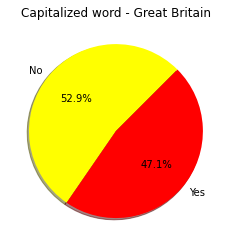

In [140]:
def capitalized_word(title):
    for i in title.split():
        if i.isupper():
            return True
    return False
df_great_britain["capitalized"] = df_great_britain["title"].apply(capitalized_word)
counts_capitalized = df_great_britain["capitalized"].value_counts().to_dict()
plt.pie([counts_capitalized[False], counts_capitalized[True]], labels=['No', 'Yes'], autopct='%1.1f%%', shadow=True, colors=['yellow', 'red'],startangle=45)
plt.title("Capitalized word - Great Britain")
plt.show()

## Caracteristicas titulo video

In [141]:
titulo = df_great_britain['tags'].value_counts(ascending = False).to_frame()
titulo.head(5)

tags
[none]                                              2010
James Corden|"The Late Late Show"|"Colbert"|"la...   100
BIGHIT|"빅히트"|"방탄소년단"|"BTS"|"BANGTAN"|"방탄"             94
ABC|"americanidol"|"idol"|"american idol"|"ryan...    89
The Late Show|"Stephen Colbert"|"Colbert"|"Late...    77

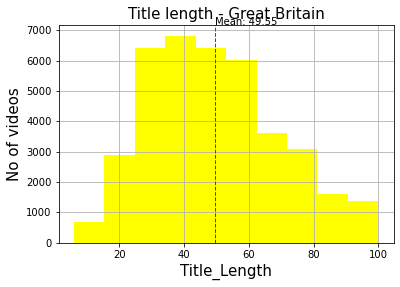

In [142]:
df_great_britain["title_length"] = df_great_britain["title"].apply(lambda x: len(x))
fig = df_great_britain['title_length'].hist(color="yellow")
fig.axvline(df_great_britain['title_length'].mean(), color='red', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
fig.text(df_great_britain['title_length'].mean(), max_ylim, 'Mean: {:.2f}'.format(df_great_britain['title_length'].mean()))
plt.xlabel("Title_Length",fontsize=15)
plt.ylabel("No of videos",fontsize=15)
plt.title("Title length - Great Britain",size=15)
plt.show()

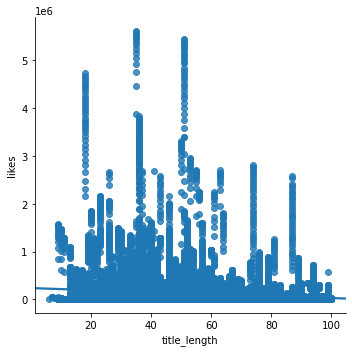

In [196]:
sns.lmplot(x="title_length", y="likes", data = df_great_britain)

## INDIA

In [143]:
india = pd.read_csv('INvideos.csv')
india

video_id trending_date  \
0      kzwfHumJyYc      17.14.11   
1      zUZ1z7FwLc8      17.14.11   
2      10L1hZ9qa58      17.14.11   
3      N1vE8iiEg64      17.14.11   
4      kJzGH0PVQHQ      17.14.11   
...            ...           ...   
37347  iNHecA3PJCo      18.14.06   
37348  dpPmPbhcslM      18.14.06   
37349  mV6aztP58f8      18.14.06   
37350  qxqDNP1bDEw      18.14.06   
37351  wERgpPK44w0      18.14.06   

                                                   title       channel_title  \
0      Sharry Mann: Cute Munda ( Song Teaser) | Parmi...     Lokdhun Punjabi   
1      पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...             HJ NEWS   
2      Stylish Star Allu Arjun @ ChaySam Wedding Rece...                TFPC   
3                         Eruma Saani | Tamil vs English         Eruma Saani   
4      why Samantha became EMOTIONAL @ Samantha naga ...          Filmylooks   
...                                                  ...                 ...   
37347  फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...      RDC Rajasthani   
37348                         Seetha | Flowers | Ep# 364          Flowers TV   
37349  Bhramanam I Episode 87 - 12 June 2018 I Mazhav...   Mazhavil Manorama   
37350  Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...           Tarang TV   
37351  Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...  Suresh Productions   

       category_id              publish_time  \
0                1  2017-11-12T12:20:39.000Z   
1               25  2017-11-13T05:43:56.000Z   
2               24  2017-11-12T15:48:08.000Z   
3               23  2017-11-12T07:08:48.000Z   
4               24  2017-11-13T01:14:16.000Z   
...            ...                       ...   
37347           23  2018-06-13T08:01:11.000Z   
37348           24  2018-06-13T11:30:04.000Z   
37349           24  2018-06-13T05:00:02.000Z   
37350           24  2018-06-13T15:07:49.000Z   
37351           24  2018-06-10T04:29:54.000Z   

                                                    tags    views  likes  \
0      sharry mann|"sharry mann new song"|"sharry man...  1096327  33966   
1      पीरियड्स के समय|"पेट पर पति करता ऐसा"|"देखकर द...   590101    735   
2      Stylish Star Allu Arjun @ ChaySam Wedding Rece...   473988   2011   
3      Eruma Saani|"Tamil Comedy Videos"|"Films"|"Mov...  1242680  70353   
4      Filmylooks|"latest news"|"telugu movies"|"telu...   464015    492   
...                                                  ...      ...    ...   
37347  twinkle vaishnav comedy|"twinkle vaishnav"|"tw...   214378   3291   
37348  flowers serials|"actress"|"malayalam serials"|...   406828   1726   
37349  mazhavil manorama|"bhramanam full episode"|"gt...   386319   1216   
37350  tarang|"tarang tv"|"tarang tv online"|"tarang ...   130263    698   
37351  Ee Nagaraniki Emaindi|"Ee Nagaraniki Emaindi T...  1278249  22466   

       dislikes  comment_count  \
0           798            882   
1           904              0   
2           243            149   
3          1624           2684   
4           293             66   
...         ...            ...   
37347       404            196   
37348       478           1428   
37349       453            697   
37350       115             65   
37351      1609           1205   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg              False   
1      https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg               True   
2      https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg              False   
3      https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg              False   
4      https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg              False   
...                                               ...                ...   
37347  https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg              False   
37348  https://i.ytimg.com/vi/dpPmPbhcslM/default.jpg              False   
37349  https://i.ytimg.com/vi/mV6

In [144]:
india = india.drop(['thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description'], axis = 1)

In [145]:
india['category_name'] = india['category_id'].apply(lambda x: dict_categoria.get(x, 'NaN'))

In [146]:
india['trending_date'] = pd.to_datetime(pd.Series(india['trending_date'].apply(lambda x:'20'+x[0:2]+'.'+x[6:]+'.'+x[3:5])))
india['publish_time'] = pd.to_datetime(pd.Series(india['publish_time'].apply(lambda x:x[:19])))

In [147]:
df_india = india.copy()
df_india.head()

video_id trending_date  \
0  kzwfHumJyYc    2017-11-14   
1  zUZ1z7FwLc8    2017-11-14   
2  10L1hZ9qa58    2017-11-14   
3  N1vE8iiEg64    2017-11-14   
4  kJzGH0PVQHQ    2017-11-14   

                                               title    channel_title  \
0  Sharry Mann: Cute Munda ( Song Teaser) | Parmi...  Lokdhun Punjabi   
1  पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...          HJ NEWS   
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...             TFPC   
3                     Eruma Saani | Tamil vs English      Eruma Saani   
4  why Samantha became EMOTIONAL @ Samantha naga ...       Filmylooks   

   category_id        publish_time  \
0            1 2017-11-12 12:20:39   
1           25 2017-11-13 05:43:56   
2           24 2017-11-12 15:48:08   
3           23 2017-11-12 07:08:48   
4           24 2017-11-13 01:14:16   

                                                tags    views  likes  \
0  sharry mann|"sharry mann new song"|"sharry man...  1096327  33966   
1  पीरियड्स के समय|"पेट पर पति करता ऐसा"|"देखकर द...   590101    735   
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...   473988   2011   
3  Eruma Saani|"Tamil Comedy Videos"|"Films"|"Mov...  1242680  70353   
4  Filmylooks|"latest news"|"telugu movies"|"telu...   464015    492   

   dislikes  comment_count     category_name  
0       798            882  Film & Animation  
1       904              0   News & Politics  
2       243            149     Entertainment  
3      1624           2684            Comedy  
4       293             66     Entertainment

In [202]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   video_id       37352 non-null  object        
 1   trending_date  37352 non-null  datetime64[ns]
 2   title          37352 non-null  object        
 3   channel_title  37352 non-null  object        
 4   category_id    37352 non-null  int64         
 5   publish_time   37352 non-null  datetime64[ns]
 6   tags           37352 non-null  object        
 7   views          37352 non-null  int64         
 8   likes          37352 non-null  int64         
 9   dislikes       37352 non-null  int64         
 10  comment_count  37352 non-null  int64         
 11  category_name  37352 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 3.4+ MB


In [203]:
df_india.isnull().sum()

video_id         0
trending_date    0
title            0
channel_title    0
category_id      0
publish_time     0
tags             0
views            0
likes            0
dislikes         0
comment_count    0
category_name    0
dtype: int64

In [204]:
df_india.describe(include="object")

video_id                                              title  \
count     37352                                              37352   
unique    16307                                              16721   
top      #NAME?  Mission: Impossible - Fallout (2018) - Officia...   
freq        511                                                 19   

       channel_title    tags  category_name  
count          37352   37352          37352  
unique          1426   12578             17  
top        VikatanTV  [none]  Entertainment  
freq             284    1381          16712

In [148]:
df_india['category_name'].unique()

array(['Film & Animation', 'News & Politics', 'Entertainment', 'Comedy',
       'Music', 'People & Blogs', 'Travel & Events',
       'Science & Technology', 'Education', 'Howto & Style', 'Shows',
       'Sports', 'NaN', 'Autos & Vehicles', 'Pets & Animals', 'Gaming',
       'Movies'], dtype=object)

## Contenido viral

In [149]:
views_mediaIn = df_india['views'].mean() 
print(views_mediaIn)
likes_mediaIn = df_india['likes'].mean()
print(likes_mediaIn)
comments_mediaIn = df_india['comment_count'].mean()
print(comments_mediaIn)

1060477.645882416
27082.71765902763
2676.9974298565003


In [152]:
viralIn = df_india[(df_india['views'] > views_mediaIn) & (df_india['likes'] > likes_mediaIn) & (df_india['comment_count'] > comments_mediaIn)]
viralIn.iloc[:50]

video_id trending_date  \
3    N1vE8iiEg64    2017-11-14   
5    il_pSa5l98w    2017-11-14   
6    7MxiQ4v0EnE    2017-11-14   
7    c64I9HNpiOY    2017-11-14   
17   ePO5M5DE01I    2017-11-14   
19   1ZAPwfrtAFY    2017-11-14   
38   01TgqDvqcyk    2017-11-14   
61   ozZ8HpIBsGw    2017-11-14   
65   U3xLOo-CNwo    2017-11-14   
90   2Vv-BfVoq4g    2017-11-14   
100  d380meD0W0M    2017-11-14   
167  -7dTzc8kTOY    2017-11-14   
178  Sdar8GHtD0k    2017-11-14   
211  7MxiQ4v0EnE    2017-11-15   
214  N1vE8iiEg64    2017-11-15   
221  c64I9HNpiOY    2017-11-15   
233  il_pSa5l98w    2017-11-15   
247  1ZAPwfrtAFY    2017-11-15   
249  ysik6z44B1E    2017-11-15   
262  ePO5M5DE01I    2017-11-15   
274  2kyS6SvSYSE    2017-11-15   
317  01TgqDvqcyk    2017-11-15   
321  gjXrm2Q-te4    2017-11-15   
329  U3xLOo-CNwo    2017-11-15   
377  2Vv-BfVoq4g    2017-11-15   
386  d380meD0W0M    2017-11-15   
424  7MxiQ4v0EnE    2017-11-16   
438  N1vE8iiEg64    2017-11-16   
451  c64I9HNpiOY    2017-11-16   
472  g8QsfJhFpjY    2017-11-16   
480  il_pSa5l98w    2017-11-16   
488  ysik6z44B1E    2017-11-16   
501  1ZAPwfrtAFY    2017-11-16   
544  9Ca8zWJOlFQ    2017-11-16   
545  ePO5M5DE01I    2017-11-16   
559  gjXrm2Q-te4    2017-11-16   
565  2kyS6SvSYSE    2017-11-16   
589  CtBca6H6Teg    2017-11-16   
600  fpxBxp9QKrk    2017-11-17   
616  p8XP7A7kvzM    2017-11-17   
619  coOKvrsmQiI    2017-11-17   
645  Lxet1zLBTM8    2017-11-17   
678  7MxiQ4v0EnE    2017-11-17   
699  N1vE8iiEg64    2017-11-17   
709  Gc_BnMrFhPc    2017-11-17   
731  c64I9HNpiOY    2017-11-17   
739  il_pSa5l98w    2017-11-17   
745  zOOmEDwPJX0    2017-11-17   
767  g8QsfJhFpjY    2017-11-17   
776  1ZAPwfrtAFY    2017-11-17   

                                                 title  \
3                       Eruma Saani | Tamil vs English   
5    MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...   
6    Daang ( Full Video ) | Mankirt Aulakh | Sukh S...   
7    Padmavati : Ek Dil Ek Jaan Video Song | Deepik...   
17   Tiger Zinda Hai | Official Trailer | Salman Kh...   
19   The Trump Presidency: Last Week Tonight with J...   
38   Rajj Ke Rona Main - Romy Tahlie | Latest Punja...   
61   Mersal - A minute of Aalaporaan Thamizhan | Vi...   
65   12 Weird Ways To Sneak Food Into Class / Back ...   
90         Ed Sheeran - Perfect (Official Music Video)   
100                           I Dare You: GOING BALD!?   
167                       FEEELINGS ABOUT THE IPHONE X   
178  Thatrom Thookrom - #DemonetizationAnthem | STR...   
211  Daang (Full Video) |Mankirt Aulakh|MixSingh|De...   
214                     Eruma Saani | Tamil vs English   
221  Padmavati : Ek Dil Ek Jaan Video Song | Deepik...   
233  MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...   
247  The Trump Presidency: Last Week Tonight with J...   
249  Stephanie McMahon questions Kurt Angle's leade...   
262  Tiger Zinda Hai | Official Trailer | Salman Kh...   
274                 WE WANT TO TALK ABOUT OUR MARRIAGE   
317  Rajj Ke Rona Main - Romy Tahlie | Latest Punja...   
321     Jimmy Fallon Pays Tribute to His Mother Gloria   
329  12 Weird Ways To Sneak Food Into Class / Back ...   
377        Ed Sheeran - Perfect (Official Music Video)   
386                           I Dare You: GOING BALD!?   
424  Daang (Full Video) |Mankirt Aulakh|MixSingh|De...   
438                     Eruma Saani | Tamil vs English   
451  Padmavati : Ek Dil Ek Jaan Video Song | Deepik...   
472                 New bike vs Old bike - the reality   
480  MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...   
488  Stephanie McMahon questions Kurt Angle's leade...   
501  The Trump Presidency: Last Week Tonight with J...   
544               Apple iPhone X Review: The Best Yet!   
545  Tiger Zinda Hai | Official Trailer | Salman Kh...   
559     Jimmy Fallon Pays Tribute to His Mother Gloria   
565                 WE WANT TO TALK ABOUT OUR MARRIAGE   
589                   Honest Trailers - Batman Forever   
600  HELLO!

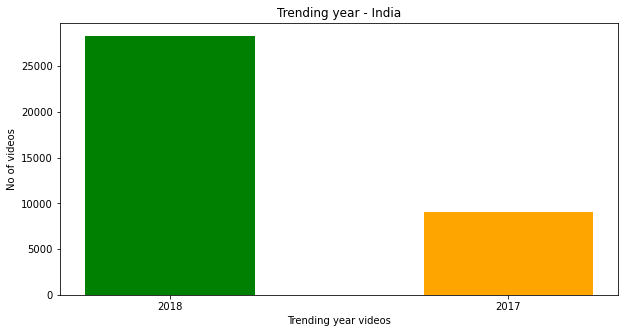

In [153]:
day=df_india['trending_date'].dt.strftime('%Y')
total_dict=(day.value_counts()).to_dict()
count= pd.DataFrame(list(total_dict.items()),columns=['Trending year videos','No of videos'])

fig = plt.figure(figsize=(10,5))
plt.bar(count['Trending year videos'], count['No of videos'],color=['green', 'orange'], width=0.5)
plt.xlabel("Trending year videos")
plt.ylabel("No of videos")
plt.title("Trending year - India")
plt.show()

<AxesSubplot:title={'center':'Contenido viral - India'}>

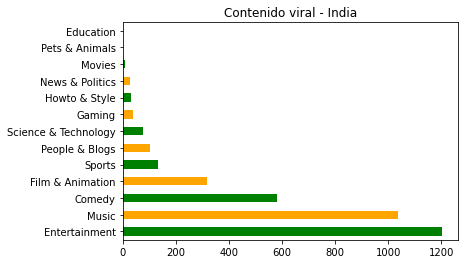

In [154]:
categoria = viralIn['category_name'].value_counts()
categoria.plot(kind='barh', title="Contenido viral - India",color=['green','orange'])

<ipython-input-155-e4ec58a7174a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  b = a['category_name','likes'].max()


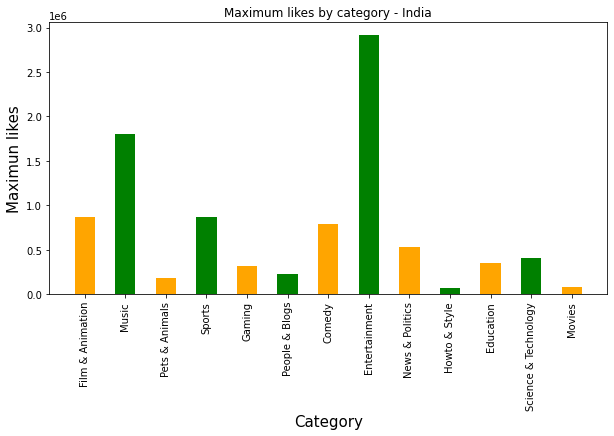

In [155]:
a = viralIn.groupby('category_id')
b = a['category_name','likes'].max()

fig=plt.figure(figsize=(10,5))
plt.bar(b['category_name'],b['likes'],color=['orange','green'],width=0.5)
plt.xticks(rotation=90)
plt.xlabel("Category",size=15)
plt.ylabel("Maximun likes",size=15)
plt.title("Maximum likes by category - India")
plt.show()

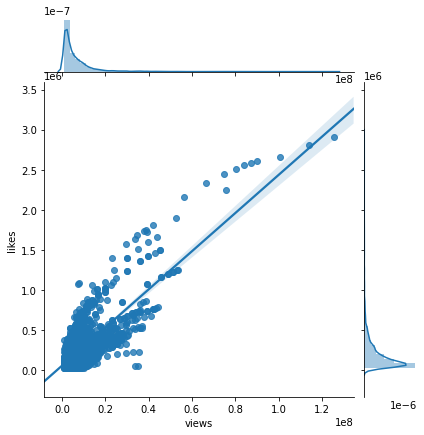

In [156]:
sns.jointplot(x='views', y='likes', data=viralIn,kind='reg')


### Mostrar los principales canales

<function matplotlib.pyplot.show(close=None, block=None)>

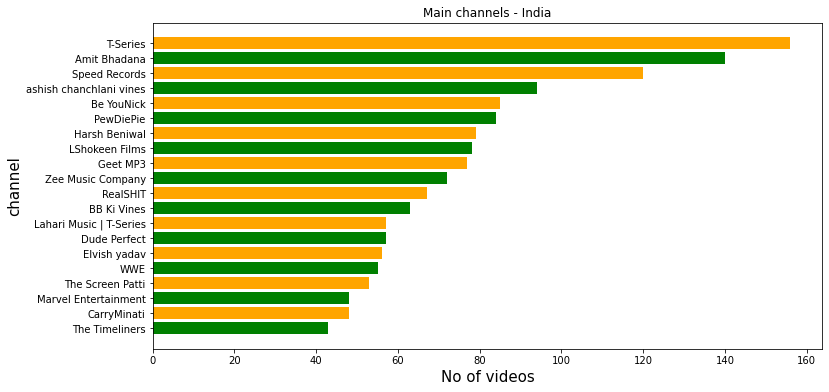

In [157]:
views_channels = viralIn.groupby('channel_title').size().reset_index(name="video_count").sort_values("video_count", ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('video_count')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['video_count'],color=['green','orange'])
plt.xlabel("No of videos",size=15)
plt.ylabel("channel",size=15)
plt.title("Main channels - India")
plt.show

## Contenido polémico

In [158]:
polemicoIn = df_india.sort_values(by = 'views', ascending = False)
polemicoIn.iloc[:50]

video_id trending_date  \
5408   FlsCjmMhFmw    2017-12-12   
5119   FlsCjmMhFmw    2017-12-11   
4936   FlsCjmMhFmw    2017-12-10   
4477   6ZfuNTqbHE8    2017-12-07   
4236   6ZfuNTqbHE8    2017-12-06   
4013   6ZfuNTqbHE8    2017-12-05   
3823   6ZfuNTqbHE8    2017-12-04   
4743   FlsCjmMhFmw    2017-12-09   
3639   6ZfuNTqbHE8    2017-12-03   
3456   6ZfuNTqbHE8    2017-12-02   
3256   6ZfuNTqbHE8    2017-12-01   
29298  u9Mv98Gr5pY    2018-05-01   
29084  u9Mv98Gr5pY    2018-04-30   
4568   FlsCjmMhFmw    2017-12-08   
28847  u9Mv98Gr5pY    2018-04-29   
28986  u9Mv98Gr5pY    2018-04-29   
28774  u9Mv98Gr5pY    2018-04-28   
28628  u9Mv98Gr5pY    2018-04-28   
28574  u9Mv98Gr5pY    2018-04-27   
28435  u9Mv98Gr5pY    2018-04-27   
22949  QwievZ1Tx-8    2018-03-22   
23094  QwievZ1Tx-8    2018-03-22   
29668  rRr1qiJRsXk    2018-05-03   
22309  tCXGJQYZ9JA    2018-03-18   
29431  rRr1qiJRsXk    2018-05-02   
22782  QwievZ1Tx-8    2018-03-21   
29339  rRr1qiJRsXk    2018-05-01   
29209  rRr1qiJRsXk    2018-05-01   
12044  dfnCAmr569k    2018-01-18   
29011  rRr1qiJRsXk    2018-04-30   
29145  rRr1qiJRsXk    2018-04-30   
3045   xmU0s2QtaEY    2017-11-29   
22730  QwievZ1Tx-8    2018-03-20   
22583  QwievZ1Tx-8    2018-03-20   
22049  tCXGJQYZ9JA    2018-03-17   
28817  rRr1qiJRsXk    2018-04-29   
28956  rRr1qiJRsXk    2018-04-29   
28255  u9Mv98Gr5pY    2018-04-26   
28382  u9Mv98Gr5pY    2018-04-26   
377    2Vv-BfVoq4g    2017-11-15   
545    ePO5M5DE01I    2017-11-16   
11777  dfnCAmr569k    2018-01-17   
2779   xmU0s2QtaEY    2017-11-28   
3071   6ZfuNTqbHE8    2017-11-30   
262    ePO5M5DE01I    2017-11-15   
5833   vn9mMeWcgoM    2017-12-14   
19221  F2lN25IayH8    2018-02-28   
36023  1J76wN0TPI4    2018-06-07   
28620  rRr1qiJRsXk    2018-04-28   
28766  rRr1qiJRsXk    2018-04-28   

                                                   title  \
5408   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
5119   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
4936   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
4477   Marvel Studios' Avengers: Infinity War Officia...   
4236   Marvel Studios' Avengers: Infinity War Officia...   
4013   Marvel Studios' Avengers: Infinity War Officia...   
3823   Marvel Studios' Avengers: Infinity War Officia...   
4743   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
3639   Marvel Studios' Avengers: Infinity War Officia...   
3456   Marvel Studios' Avengers: Infinity War Officia...   
3256   Marvel Studios' Avengers: Infinity War Officia...   
29298                      VENOM - Official Trailer (HD)   
29084                      VENOM - Official Trailer (HD)   
4568   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
28847                      VENOM - Official Trailer (HD)   
28986                      VENOM - Official Trailer (HD)   
28774                      VENOM - Official Trailer (HD)   
28628                      VENOM - Official Trailer (HD)   
28574                      VENOM - Official Trailer (HD)   
28435                      VENOM - Official Trailer (HD)   
22949  Marvel Studios' Avengers: Infinity War - Offic...   
23094  Marvel Studios' Avengers: Infinity War - Offic...   
29668  Sanju | Official Teaser | Ranbir Kapoor | Rajk...   
22309                            Taylor Swift - Delicate   
29431  Sanju | Official Teaser | Ranbir Kapoor | Rajk...   
22782  Marvel Studios' Avengers: Infinity War - Offic...   
29339  Sanju | Official Teaser | Ranbir Kapoor | Rajk...   
29209  Sanju | Official Teaser | Ranbir Kapoor | Rajk...   
12044     Taylor Swift - End Game ft. Ed Sheeran, Future   
29011  Sanju | Official Teaser | Ranbir Kapoor | Rajk...   
29145  Sanju | Official Teaser | Ranbir Kapoor | Rajk...   
3045   Swag Se Swagat Song | Tiger Zinda Hai | Salman...   
22730  Marvel Studios' Avengers: Infinity War - Offic...   
22583  Marvel Studios' Avengers: Infinity War - Offic...   
22049                            Taylor Swift - Delicate   
28817  Sanju 

<AxesSubplot:title={'center':'Contenido polémico - India'}>

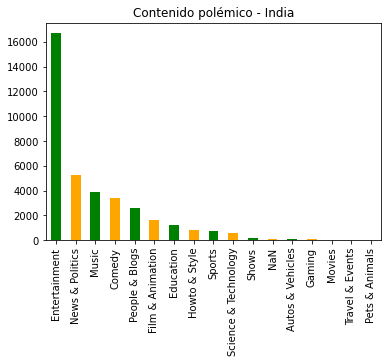

In [159]:
polemicoIn['category_name'].value_counts().plot(kind = "bar", title="Contenido polémico - India", color=['green','orange'])

<function matplotlib.pyplot.show(close=None, block=None)>

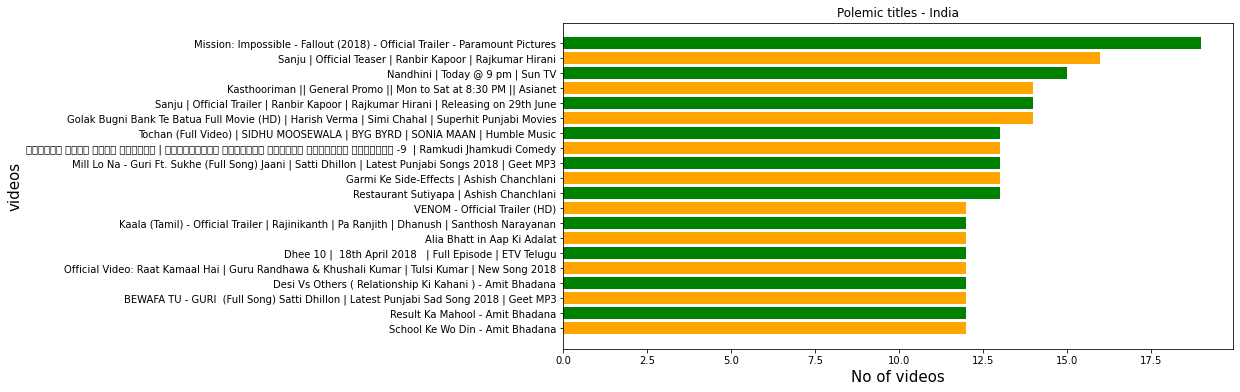

In [324]:
views_videos = polemicoIn.groupby('title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
videos_sort = views_videos.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(videos_sort['title'], videos_sort['views'],color=['orange','green'])
plt.xlabel("No of videos",size=15)
plt.ylabel("videos",size=15)
plt.title("Polemic titles - India")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

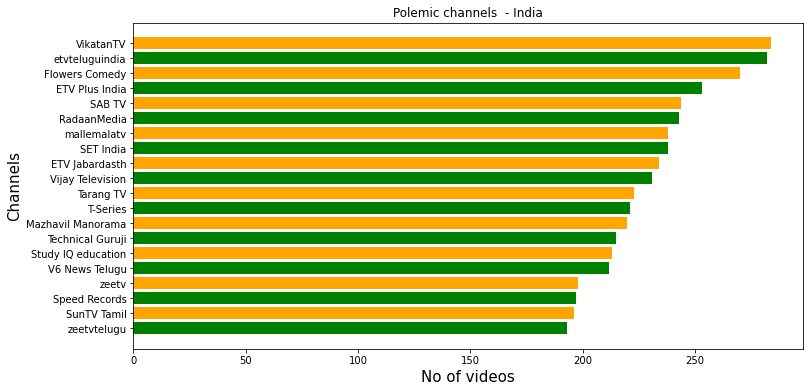

In [161]:
views_channels = polemicoIn.groupby('channel_title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['views'],color=['green','orange'])
plt.xlabel("No of videos",size=15)
plt.ylabel("Channels",size=15)
plt.title("Polemic channels  - India")
plt.show

## Sección especifica

In [162]:
seccionIn = df_india[df_india['category_name'] == 'Film & Animation']
seccionIn.head()

video_id trending_date  \
0   kzwfHumJyYc    2017-11-14   
17  ePO5M5DE01I    2017-11-14   
28  MF9ovM9y0PE    2017-11-14   
63  xjFKfAudCOo    2017-11-14   
88  tzlF8oZd2BU    2017-11-14   

                                                title           channel_title  \
0   Sharry Mann: Cute Munda ( Song Teaser) | Parmi...         Lokdhun Punjabi   
17  Tiger Zinda Hai | Official Trailer | Salman Kh...                     YRF   
28  Punyalan Private Limited Official Teaser 2 | J...         DREAMS N BEYOND   
63  Aruvi - Official Teaser | Arun Prabu | Bindhu ...  Dream Warrior Pictures   
88  engagement काका कुमाणसी का सगाई में भिजोल ,राज...      Murari Ki Kocktail   

    category_id        publish_time  \
0             1 2017-11-12 12:20:39   
17            1 2017-11-07 06:01:50   
28            1 2017-11-12 04:30:00   
63            1 2017-11-09 11:31:14   
88            1 2017-11-11 11:35:45   

                                                 tags     views   likes  \
0   sharry mann|"sharry mann new song"|"sharry man...   1096327   33966   
17  Tiger Zinda Hai Trailer|"Tiger Zinda Hai Offic...  35885754  829362   
28  dreams n beyond|"dreamsnbeyond"|"ranjith shank...    249423    7861   
63  Aruvi|"Aruvi Tamil Movie"|"Aruvi Movie"|"Aruvi...    696515   12397   
88  rajasthani comedy marwari comedy hariyani come...    269593    3931   

    dislikes  comment_count     category_name  
0        798            882  Film & Animation  
17     61195         101117  Film & Animation  
28        68            364  Film & Animation  
63       449            385  Film & Animation  
88       390            640  Film & Animation

<function matplotlib.pyplot.show(close=None, block=None)>

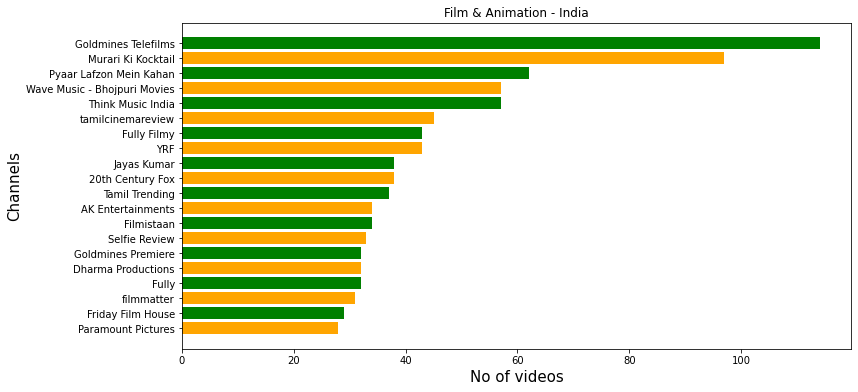

In [163]:
views_channels = seccionIn.groupby('channel_title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['views'],color=['orange','green'])
plt.xlabel("No of videos",size=15)
plt.ylabel("Channels",size=15)
plt.title("Film & Animation - India")
plt.show

## Mejor rango de duracion del video

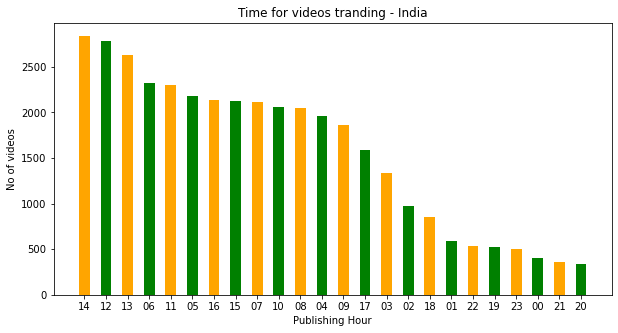

In [164]:
hour = polemicoIn.publish_time.apply(lambda x: x.strftime("%H"))
total_dict=(hour.value_counts().to_dict())
count= pd.DataFrame(list(total_dict.items()),columns = ['Publishing Hour', 'No of videos'])
fig=plt.figure(figsize=(10,5))
plt.bar(count['Publishing Hour'],count['No of videos'],color=['orange','green'],width=0.5)
plt.xlabel("Publishing Hour")
plt.ylabel("No of videos")
plt.title("Time for videos tranding - India")
plt.show()

In [165]:
df_india['Trending dif_days'] = df_india.apply(lambda row: (row.trending_date-row.publish_time).days, axis = 1)
df_india.head()

video_id trending_date  \
0  kzwfHumJyYc    2017-11-14   
1  zUZ1z7FwLc8    2017-11-14   
2  10L1hZ9qa58    2017-11-14   
3  N1vE8iiEg64    2017-11-14   
4  kJzGH0PVQHQ    2017-11-14   

                                               title    channel_title  \
0  Sharry Mann: Cute Munda ( Song Teaser) | Parmi...  Lokdhun Punjabi   
1  पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...          HJ NEWS   
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...             TFPC   
3                     Eruma Saani | Tamil vs English      Eruma Saani   
4  why Samantha became EMOTIONAL @ Samantha naga ...       Filmylooks   

   category_id        publish_time  \
0            1 2017-11-12 12:20:39   
1           25 2017-11-13 05:43:56   
2           24 2017-11-12 15:48:08   
3           23 2017-11-12 07:08:48   
4           24 2017-11-13 01:14:16   

                                                tags    views  likes  \
0  sharry mann|"sharry mann new song"|"sharry man...  1096327  33966   
1  पीरियड्स के समय|"पेट पर पति करता ऐसा"|"देखकर द...   590101    735   
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...   473988   2011   
3  Eruma Saani|"Tamil Comedy Videos"|"Films"|"Mov...  1242680  70353   
4  Filmylooks|"latest news"|"telugu movies"|"telu...   464015    492   

   dislikes  comment_count     category_name  Trending dif_days  
0       798            882  Film & Animation                  1  
1       904              0   News & Politics                  0  
2       243            149     Entertainment                  1  
3      1624           2684            Comedy                  1  
4       293             66     Entertainment                  0

## Tags que podrian posicionarlo mejor

In [222]:
titulo = df_india['title'].value_counts(ascending = False).to_frame()
titulo.head(10)

title
Mission: Impossible - Fallout (2018) - Official...     19
Sanju | Official Teaser | Ranbir Kapoor | Rajku...     16
Nandhini | Today @ 9 pm | Sun TV                       15
Sanju | Official Trailer | Ranbir Kapoor | Rajk...     14
Kasthooriman || General Promo || Mon to Sat at ...     14
Golak Bugni Bank Te Batua Full Movie (HD) | Har...     14
कस्टमर केयर वाली छोरिया | राजस्थानी सुपरहिट कॉम...     13
Garmi Ke Side-Effects | Ashish Chanchlani              13
Tochan (Full Video) | SIDHU MOOSEWALA | BYG BYR...     13
Mill Lo Na - Guri Ft. Sukhe (Full Song) Jaani |...     13

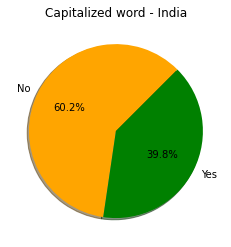

In [166]:
def capitalized_word(title):
    for i in title.split():
        if i.isupper():
            return True
    return False
df_india["capitalized"] = df_india["title"].apply(capitalized_word)
counts_capitalized = df_india["capitalized"].value_counts().to_dict()
plt.pie([counts_capitalized[False], counts_capitalized[True]], labels=['No', 'Yes'], autopct='%1.1f%%', shadow=True, colors=['orange', 'green'],startangle=45)
plt.title("Capitalized word - India")
plt.show()

## Caracteristicas titulo video

In [167]:
titulo = df_india['tags'].value_counts(ascending = False).to_frame()
titulo.head(5)

tags
[none]                                              1381
flowers tv|"uppum mulakum"|"uppum"|"biju sopana...   252
etv Plus|"etv comedy show"|"3 Idiots"|"anchor r...   252
etv daily serials|"etv daily soaps"|"etv fictio...   229
etv shows|"eenadu television"|"padutha theeyaga...   206

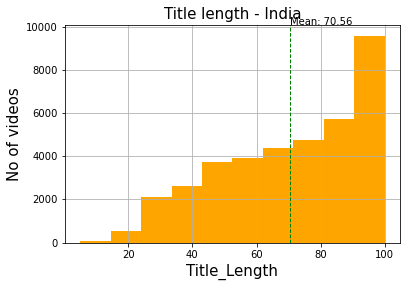

In [168]:
df_india["title_length"] = df_india["title"].apply(lambda x: len(x))
fig = df_india['title_length'].hist(color="orange")
fig.axvline(df_india['title_length'].mean(), color='green', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
fig.text(df_india['title_length'].mean(), max_ylim, 'Mean: {:.2f}'.format(df_india['title_length'].mean()))
plt.xlabel("Title_Length",fontsize=15)
plt.ylabel("No of videos",fontsize=15)
plt.title("Title length - India",size=15)
plt.show()

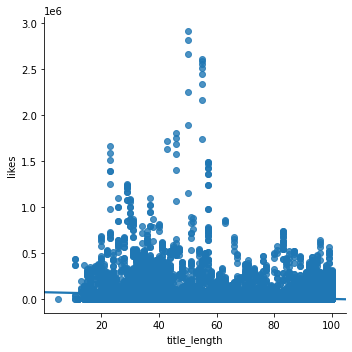

In [226]:
sns.lmplot(x="title_length", y="likes", data = df_india)

# JAPAN

In [170]:
japan = pd.read_csv('JPvideos.csv')
japan

video_id trending_date  \
0      5ugKfHgsmYw      18.07.02   
1      ohObafdd34Y      18.07.02   
2      aBr2kKAHN6M      18.07.02   
3      5wNnwChvmsQ      18.07.02   
4      B7J47qFvdsk      18.07.02   
...            ...           ...   
20518  GuWCkLnCMOo      18.14.06   
20519  nOUlB0i2MaA      18.14.06   
20520  4cRanIowkTE      18.14.06   
20521  oLtWIVBVoS8      18.14.06   
20522  2IEWv23oa9E      18.14.06   

                                                   title  \
0                                     陸自ヘリ、垂直に落下＝路上の車が撮影   
1                                 イッテQ お祭り男宮川×手越 巨大ブランコ②   
2                                  Live Views of Starman   
3                             東京ディズニーリゾートの元キャストが暴露した秘密5選   
4              榮倉奈々、衝撃の死んだふり！映画『家に帰ると妻が必ず死んだふりをしています。』特報   
...                                                  ...   
20518  หนึ่งด้าวฟ้าเดียว NeungDaoFahDeaw EP.15 ตอนที่...   
20519  2018 국민의 선택 - 선거방송 '왕의 귀환' 12시간 연속 생중계! (풀영상) ...   
20520            元FBIエージェントが教える、200％人を引き付けるようになるコツ、トップ10   
20521     日本×パラグアイ徹底分析&スペイン代表監督解任事件を解説【トークtheフットボール】#683   
20522                             エサのコオロギに夢中で二本足で立つカメレオン   

                     channel_title  category_id              publish_time  \
0                       時事通信映像センター           25  2018-02-06T03:04:37.000Z   
1             神谷えりな Kamiya Erina 2            1  2018-02-06T04:01:56.000Z   
2                           SpaceX           28  2018-02-06T21:38:22.000Z   
3                          アシタノワダイ           25  2018-02-06T06:08:49.000Z   
4                          シネマトゥデイ            1  2018-02-06T02:30:00.000Z   
...                            ...          ...                       ...   
20518                  Ch3Thailand           24  2018-06-13T17:00:01.000Z   
20519                       SBS 뉴스           25  2018-06-13T19:10:31.000Z   
20520  ブライトサイド | Bright Side Japan           26  2018-06-13T14:00:02.000Z   
20521          Leo the football TV           17  2018-06-13T13:56:47.000Z   
20522                    釣りよかHOUSE           24  2018-06-13T09:00:00.000Z   

                                                    tags    views   likes  \
0      事故|"佐賀"|"佐賀県"|"ヘリコプター"|"ヘリ"|"自衛隊"|"墜落"|"落下"|"現...   188085     591   
1                                                 [none]    90929     442   
2                                                 [none]  6408303  165892   
3                                                アシタノワダイ    96255    1165   
4                                                 [none]   108408    1336   
...                                                  ...      ...     ...   
20518  หนึ่งด้าวฟ้าเดียว|"NeungDaoFahDeaw"|"เจมส์ จิร...    81321     321   
20519  뉴스|"NEWS"|"news"|"SBS"|"sbs"|"SBS NEWS"|"SBS8N...   433188       0   
20520  人々を魅了する方法|"魅力的になるには"|"成功の秘訣"|"簡単なトリック"|"人から好かれ...    39235    1194   
20521  W杯|"ワールドカップ"|"蹴球"|"思想家"|"ラジオ"|"ナポリ"|"ライプツィヒ"|"...    49900     431   
20522                    よーらい|"佐賀よかでしょう"|"釣りよかでしょう"|"釣り"    46265     816   

       dislikes  comment_count  \
0           189              0   
1            88            174   
2          2331           3006   
3           277            545   
4            74            201   
...         ...            ...   
20518        17             61   
20519         0            175   
20520        27             46   
20521        66            336   
20522        40             59   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg               True   
1      https://i.ytimg.com/vi/ohObafdd34Y/default.jpg              False   
2      https://i.ytimg.com/vi/aBr2kKAHN6M/default.jpg              False   
3      https://i.ytimg.com/vi/5wNnwChvmsQ/default.jpg              False   
4      https://i.ytimg.com/vi/B7J47qFvdsk/default.jpg              False   
...                                               ...                ...   
20518  https://i.ytimg.com/vi/GuWCkLnCMOo/default.jpg            

In [171]:
japan = japan.drop(['thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description'], axis = 1)

In [172]:
japan['category_name'] = japan['category_id'].apply(lambda x: dict_categoria.get(x, 'NaN'))

In [173]:
japan['trending_date'] = pd.to_datetime(pd.Series(japan['trending_date'].apply(lambda x:'20'+x[0:2]+'.'+x[6:]+'.'+x[3:5])))
japan['publish_time'] = pd.to_datetime(pd.Series(japan['publish_time'].apply(lambda x:x[:19])))

In [174]:
df_japan = japan.copy()
df_japan.head(5)

video_id trending_date                                      title  \
0  5ugKfHgsmYw    2018-02-07                         陸自ヘリ、垂直に落下＝路上の車が撮影   
1  ohObafdd34Y    2018-02-07                     イッテQ お祭り男宮川×手越 巨大ブランコ②   
2  aBr2kKAHN6M    2018-02-07                      Live Views of Starman   
3  5wNnwChvmsQ    2018-02-07                 東京ディズニーリゾートの元キャストが暴露した秘密5選   
4  B7J47qFvdsk    2018-02-07  榮倉奈々、衝撃の死んだふり！映画『家に帰ると妻が必ず死んだふりをしています。』特報   

          channel_title  category_id        publish_time  \
0            時事通信映像センター           25 2018-02-06 03:04:37   
1  神谷えりな Kamiya Erina 2            1 2018-02-06 04:01:56   
2                SpaceX           28 2018-02-06 21:38:22   
3               アシタノワダイ           25 2018-02-06 06:08:49   
4               シネマトゥデイ            1 2018-02-06 02:30:00   

                                                tags    views   likes  \
0  事故|"佐賀"|"佐賀県"|"ヘリコプター"|"ヘリ"|"自衛隊"|"墜落"|"落下"|"現...   188085     591   
1                                             [none]    90929     442   
2                                             [none]  6408303  165892   
3                                            アシタノワダイ    96255    1165   
4                                             [none]   108408    1336   

   dislikes  comment_count         category_name  
0       189              0       News & Politics  
1        88            174      Film & Animation  
2      2331           3006  Science & Technology  
3       277            545       News & Politics  
4        74            201      Film & Animation

In [175]:
df_japan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20523 entries, 0 to 20522
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   video_id       20523 non-null  object        
 1   trending_date  20523 non-null  datetime64[ns]
 2   title          20523 non-null  object        
 3   channel_title  20523 non-null  object        
 4   category_id    20523 non-null  int64         
 5   publish_time   20523 non-null  datetime64[ns]
 6   tags           20523 non-null  object        
 7   views          20523 non-null  int64         
 8   likes          20523 non-null  int64         
 9   dislikes       20523 non-null  int64         
 10  comment_count  20523 non-null  int64         
 11  category_name  20523 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 1.9+ MB


In [177]:
df_japan.isnull().sum()

video_id         0
trending_date    0
title            0
channel_title    0
category_id      0
publish_time     0
tags             0
views            0
likes            0
dislikes         0
comment_count    0
category_name    0
dtype: int64

In [178]:
df_japan.describe(include="object")

video_id              title channel_title    tags  category_name
count     20523              20523         20523   20523          20523
unique    12912              13087          4649    8761             15
top      #NAME?  【吹いたら負け】話題の面白い画像集        DHCテレビ  [none]  Entertainment
freq        282                 17           169    3200           6259

In [179]:
df_japan['category_name'].unique()

array(['News & Politics', 'Film & Animation', 'Science & Technology',
       'People & Blogs', 'Comedy', 'Travel & Events', 'Pets & Animals',
       'Entertainment', 'Howto & Style', 'Autos & Vehicles', 'Sports',
       'NaN', 'Music', 'Gaming', 'Education'], dtype=object)

## Contenido viral

In [180]:
views_mediaJp = df_japan['views'].mean() 
print(views_mediaJp)
likes_mediaJp = df_japan['likes'].mean()
print(likes_mediaJp)
comments_mediaJp = df_japan['comment_count'].mean()
print(comments_mediaJp)

262021.47005798374
8059.586707596355
1196.0778638600596


In [185]:
viralJp = df_japan[(df_japan['views'] > views_mediaJp) & (df_japan['likes'] > likes_mediaJp) & (df_japan['comment_count'] > comments_mediaJp)]
viralJp.iloc[:50]

video_id trending_date  \
2    aBr2kKAHN6M    2018-02-07   
14   UQVs2qDBe10    2018-02-07   
25   pVxOVlm_lE8    2018-02-07   
34   aBr2kKAHN6M    2018-02-07   
46   UQVs2qDBe10    2018-02-07   
57   pVxOVlm_lE8    2018-02-07   
66   aBr2kKAHN6M    2018-02-07   
78   UQVs2qDBe10    2018-02-07   
89   pVxOVlm_lE8    2018-02-07   
98   aBr2kKAHN6M    2018-02-07   
110  UQVs2qDBe10    2018-02-07   
121  pVxOVlm_lE8    2018-02-07   
128  wbSwFU6tY1c    2018-02-08   
131  oXd60ArCFrE    2018-02-08   
147  VAL1khzhGQw    2018-02-08   
172  wbSwFU6tY1c    2018-02-08   
175  oXd60ArCFrE    2018-02-08   
191  VAL1khzhGQw    2018-02-08   
216  wbSwFU6tY1c    2018-02-08   
219  oXd60ArCFrE    2018-02-08   
235  VAL1khzhGQw    2018-02-08   
260  wbSwFU6tY1c    2018-02-08   
263  oXd60ArCFrE    2018-02-08   
279  VAL1khzhGQw    2018-02-08   
309  VV7LMEbd1Es    2018-02-09   
320  Hv18-l6kESg    2018-02-09   
346  dzxFdtWmjto    2018-02-09   
360  4uTNVumfm84    2018-02-09   
362  xmupkoVfUnQ    2018-02-09   
389  _E4cdaRu5y4    2018-02-09   
391  H-jp87Y3ZSY    2018-02-09   
420  KTLNqkwWK7Q    2018-02-09   
437  VV7LMEbd1Es    2018-02-09   
448  Hv18-l6kESg    2018-02-09   
474  dzxFdtWmjto    2018-02-09   
484  W8vgIXxJRtc    2018-02-10   
485  G06gCDESJzk    2018-02-10   
495  ZTH24m5FGpA    2018-02-10   
507  yQ8WUlG377g    2018-02-10   
536  gFxuiqQzj0A    2018-02-10   
564  WE83yDlL4Oo    2018-02-10   
567  7kLO2AB5SPM    2018-02-10   
596  VV7LMEbd1Es    2018-02-10   
611  W8vgIXxJRtc    2018-02-10   
612  G06gCDESJzk    2018-02-10   
622  ZTH24m5FGpA    2018-02-10   
634  yQ8WUlG377g    2018-02-10   
699  j1eKhRDC27w    2018-02-11   
717  Q31saQvll5U    2018-02-11   
743       #NAME?    2018-02-11   

                                                 title  \
2                                Live Views of Starman   
14                                             警察から逃げる   
25   Marvel Studios’ Avengers: Infinity War - Big G...   
34                               Live Views of Starman   
46                                             警察から逃げる   
57   Marvel Studios’ Avengers: Infinity War - Big G...   
66                               Live Views of Starman   
78                                             警察から逃げる   
89   Marvel Studios’ Avengers: Infinity War - Big G...   
98                               Live Views of Starman   
110                                            警察から逃げる   
121  Marvel Studios’ Avengers: Infinity War - Big G...   
128                           Falcon Heavy Test Flight   
131                          【悲報】てつやの愛車BMWが大破してしまいました…   
147  Golden State Warriors vs Oklahoma City Thunder...   
172                           Falcon Heavy Test Flight   
175                          【悲報】てつやの愛車BMWが大破してしまいました…   
191  Golden State Warriors vs Oklahoma City Thunder...   
216                           Falcon Heavy Test Flight   
219                          【悲報】てつやの愛車BMWが大破してしまいました…   
235  Golden State Warriors vs Oklahoma City Thunder...   
260                           Falcon Heavy Test Flight   
263                          【悲報】てつやの愛車BMWが大破してしまいました…   
279  Golden State Warriors vs Oklahoma City Thunder...   
309               アニメ『衛宮さんちの今日のごはん』第二話「鮭ときのこのバターホイル焼き」   
320                            アイスの中身、土でも食べちゃう説。【ドッキリ】   
346               VENOM - Official Teaser Trailer (HD)   
360                                    Maroon 5 - Wait   
362  Valencia vs Barcelona 0-2 - All Goals & Extend...   
389  Of Course Trump Wants to Throw Himself a Milit...   
391                          【絵しりとり】東海オンエアは心で通じ合ってるのか？   
420  Cleveland Cavaliers vs Minnesota Timberwolves ...   
437               アニメ『衛宮さんちの今日のごはん』第二話「鮭ときのこのバターホイル焼き」   
448                            アイスの中身、土でも食べちゃう説。【ドッキリ】   
474               VENOM - Official Teaser Trailer (HD)   
484                      もしも編集者が自分のことしか考えない奴だったら【虫眼鏡編】   
485                    【実験】たこあげの限界の高さを調べたら結構すごいことになった   
495                        霊媒師にお願いしてンダホのおじいちゃんを呼んでみた！？   
507        

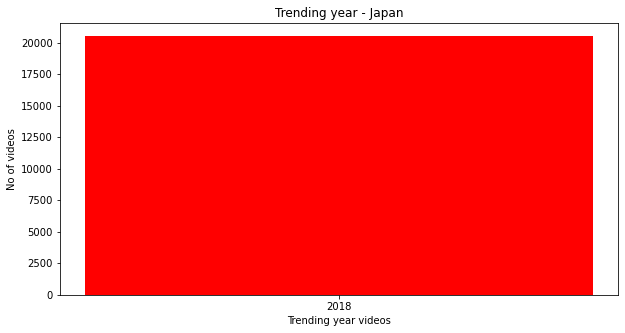

In [192]:
day=df_japan['trending_date'].dt.strftime('%Y')
total_dict=(day.value_counts()).to_dict()
count= pd.DataFrame(list(total_dict.items()),columns=['Trending year videos','No of videos'])

fig = plt.figure(figsize=(10,5))
plt.bar(count['Trending year videos'], count['No of videos'],color=['red', 'purple'], width=0.5)
plt.xlabel("Trending year videos")
plt.ylabel("No of videos")
plt.title("Trending year - Japan")
plt.show()

<AxesSubplot:title={'center':'Contenido viral - Japan'}>

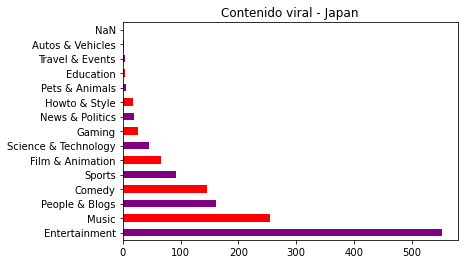

In [187]:
categoria = viralJp['category_name'].value_counts()
categoria.plot(kind='barh', title="Contenido viral - Japan",color=['purple','red'])

<ipython-input-193-e14848ee54a3>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  b = a['category_name','likes'].max()


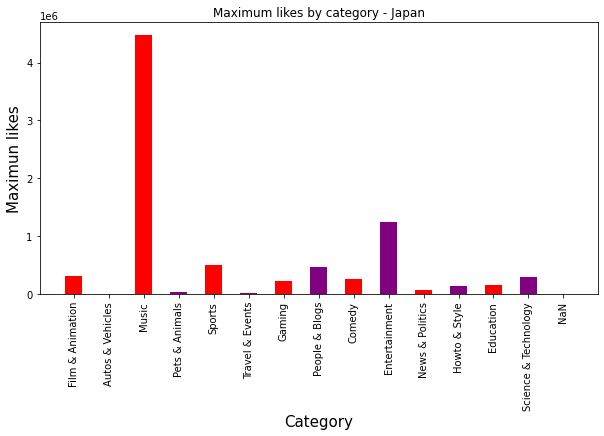

In [193]:
a = viralJp.groupby('category_id')
b = a['category_name','likes'].max()

fig=plt.figure(figsize=(10,5))
plt.bar(b['category_name'],b['likes'],color=['red','purple'],width=0.5)
plt.xticks(rotation=90)
plt.xlabel("Category",size=15)
plt.ylabel("Maximun likes",size=15)
plt.title("Maximum likes by category - Japan")
plt.show()

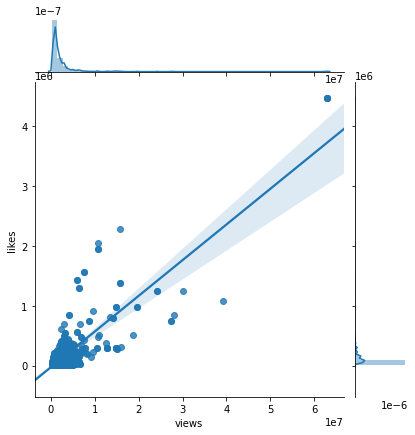

In [243]:
sns.jointplot(x='views', y='likes', data=viralJp,kind='reg')


#### Mostrar los principales canales

<function matplotlib.pyplot.show(close=None, block=None)>

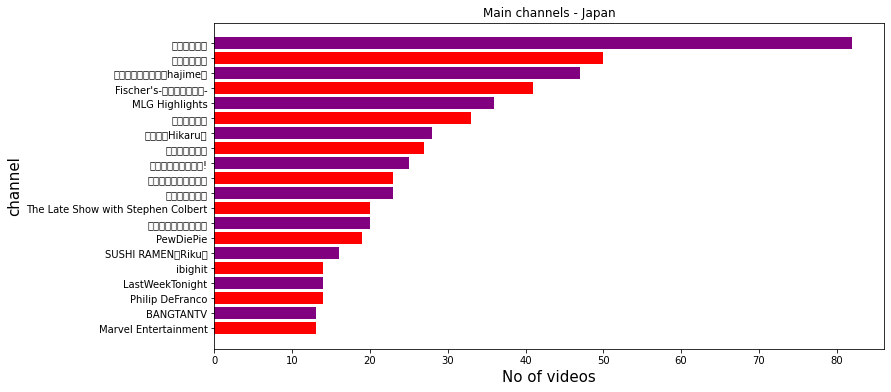

In [195]:
views_channels = viralJp.groupby('channel_title').size().reset_index(name="video_count").sort_values("video_count", ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('video_count')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['video_count'],color=['red','purple'])
plt.xlabel("No of videos",size=15)
plt.ylabel("channel",size=15)
plt.title("Main channels - Japan")
plt.show

## Contenido polémico

In [190]:
polemicoJp = df_japan.sort_values(by = 'views', ascending = False)
polemicoJp.iloc[:50]

video_id trending_date  \
16306  7C2z4GqqS5E    2018-05-20   
16348  7C2z4GqqS5E    2018-05-20   
16320  7C2z4GqqS5E    2018-05-20   
16334  7C2z4GqqS5E    2018-05-20   
12351  u9Mv98Gr5pY    2018-04-26   
6634   QwievZ1Tx-8    2018-03-18   
12083  u9Mv98Gr5pY    2018-04-25   
15294  32sYGCOYJUM    2018-05-13   
15399  32sYGCOYJUM    2018-05-13   
6154   tCXGJQYZ9JA    2018-03-14   
6025   tCXGJQYZ9JA    2018-03-14   
10632  9TUBf6l7FBg    2018-04-16   
6386   QwievZ1Tx-8    2018-03-17   
6508   QwievZ1Tx-8    2018-03-17   
12136  rRr1qiJRsXk    2018-04-25   
20146  TIE92mUvSsw    2018-06-12   
14613  p8npDG2ulKQ    2018-05-08   
11379  ffxKSjUwKdU    2018-04-21   
11513  ffxKSjUwKdU    2018-04-21   
16207  yDiXQl7grPQ    2018-05-18   
16123  yDiXQl7grPQ    2018-05-18   
5844   tCXGJQYZ9JA    2018-03-13   
5975   tCXGJQYZ9JA    2018-03-13   
260    wbSwFU6tY1c    2018-02-08   
128    wbSwFU6tY1c    2018-02-08   
216    wbSwFU6tY1c    2018-02-08   
172    wbSwFU6tY1c    2018-02-08   
14277  VYOjWnS4cMY    2018-05-07   
14423  VYOjWnS4cMY    2018-05-07   
6066   sS0LCjOiIhc    2018-03-14   
89     pVxOVlm_lE8    2018-02-07   
121    pVxOVlm_lE8    2018-02-07   
25     pVxOVlm_lE8    2018-02-07   
57     pVxOVlm_lE8    2018-02-07   
13632  UUkn-enk2RU    2018-05-03   
10329  9TUBf6l7FBg    2018-04-15   
10467  9TUBf6l7FBg    2018-04-15   
2467   qZHycHI3F1Q    2018-02-21   
15095  32sYGCOYJUM    2018-05-12   
4046   OK3GJ0WIQ8s    2018-03-02   
14290  p8npDG2ulKQ    2018-05-07   
14436  p8npDG2ulKQ    2018-05-07   
7433   D86RtevtfrA    2018-03-23   
7548   D86RtevtfrA    2018-03-23   
15140  oSEeK9yDNQI    2018-05-12   
1903   xpVfcZ0ZcFM    2018-02-18   
11291  1FJD7jZqZEk    2018-04-20   
18262  aJOTlE1K90k    2018-06-01   
18353  aJOTlE1K90k    2018-06-01   
4065   DIBw9dSVKdU    2018-03-02   

                                                   title  \
16306                BTS (방탄소년단) 'FAKE LOVE' Official MV   
16348                BTS (방탄소년단) 'FAKE LOVE' Official MV   
16320                BTS (방탄소년단) 'FAKE LOVE' Official MV   
16334                BTS (방탄소년단) 'FAKE LOVE' Official MV   
12351                      VENOM - Official Trailer (HD)   
6634   Marvel Studios' Avengers: Infinity War - Offic...   
12083                      VENOM - Official Trailer (HD)   
15294  CHẠY NGAY ĐI | RUN NOW | SƠN TÙNG M-TP | Offic...   
15399  CHẠY NGAY ĐI | RUN NOW | SƠN TÙNG M-TP | Offic...   
6154                             Taylor Swift - Delicate   
6025                             Taylor Swift - Delicate   
10632                      Coachella 2018 LIVE Channel 1   
6386   Marvel Studios' Avengers: Infinity War - Offic...   
6508   Marvel Studios' Avengers: Infinity War - Offic...   
12136  Sanju | Official Teaser | Ranbir Kapoor | Rajk...   
20146  Dhadak | Official Trailer | Janhvi & Ishaan | ...   
14613  BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...   
11379               Ariana Grande - No Tears Left To Cry   
11513               Ariana Grande - No Tears Left To Cry   
16207  Do You Hear Yanny or Laurel? (SOLVED with SCIE...   
16123  Do You Hear Yanny or Laurel? (SOLVED with SCIE...   
5844                             Taylor Swift - Delicate   
5975                             Taylor Swift - Delicate   
260                             Falcon Heavy Test Flight   
128                             Falcon Heavy Test Flight   
216                             Falcon Heavy Test Flight   
172                             Falcon Heavy Test Flight   
14277  Childish Gambino - This Is America (Official V...   
14423  Childish Gambino - This Is America (Official V...   
6066                                       GOT7 Look M/V   
89     Marvel Studios’ Avengers: Infinity War - Big G...   
121    Marvel Studios’ Avengers: Infinity War - Big G...   
25     Marvel Studios’ Avengers: Infinity War - Big G...   
57     Marvel Studios’ Avengers: Infinity War - Big G...   
13632  Marvel Studios' Ant-Man and The Wasp - Officia...   
10329        

<AxesSubplot:title={'center':'Contenido polémico - Japan'}>

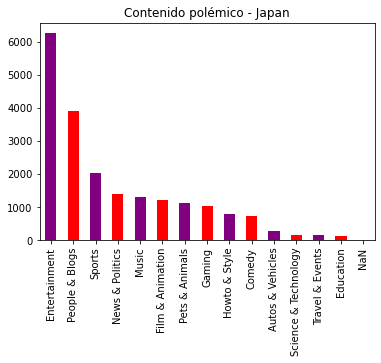

In [196]:
polemicoJp['category_name'].value_counts().plot(kind = "bar", title="Contenido polémico - Japan", color=['purple','red'])

<function matplotlib.pyplot.show(close=None, block=None)>

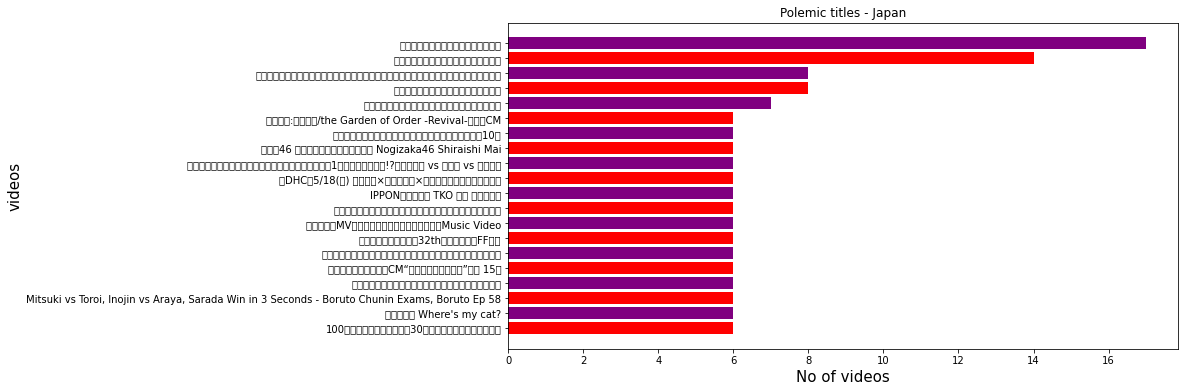

In [199]:
views_videos = polemicoJp.groupby('title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
videos_sort = views_videos.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(videos_sort['title'], videos_sort['views'],color=['red','purple'])
plt.xlabel("No of videos",size=15)
plt.ylabel("videos",size=15)
plt.title("Polemic titles - Japan")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

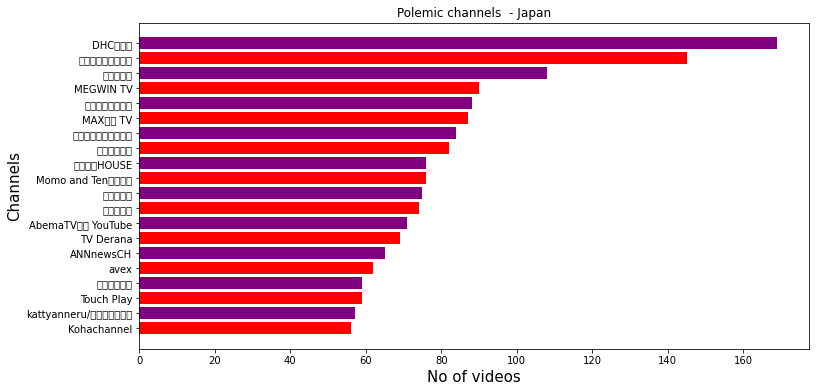

In [202]:
views_channels = polemicoJp.groupby('channel_title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['views'],color=['red','purple'])
plt.xlabel("No of videos",size=15)
plt.ylabel("Channels",size=15)
plt.title("Polemic channels  - Japan")
plt.show

## Seccion especifica

In [203]:
seccionJp = df_japan[df_japan['category_name'] == 'Film & Animation']
seccionJp.head()

video_id trending_date                                      title  \
1   ohObafdd34Y    2018-02-07                     イッテQ お祭り男宮川×手越 巨大ブランコ②   
4   B7J47qFvdsk    2018-02-07  榮倉奈々、衝撃の死んだふり！映画『家に帰ると妻が必ず死んだふりをしています。』特報   
33  ohObafdd34Y    2018-02-07                     イッテQ お祭り男宮川×手越 巨大ブランコ②   
35  B7J47qFvdsk    2018-02-07  榮倉奈々、衝撃の死んだふり！映画『家に帰ると妻が必ず死んだふりをしています。』特報   
65  ohObafdd34Y    2018-02-07                     イッテQ お祭り男宮川×手越 巨大ブランコ②   

           channel_title  category_id        publish_time    tags   views  \
1   神谷えりな Kamiya Erina 2            1 2018-02-06 04:01:56  [none]   90929   
4                シネマトゥデイ            1 2018-02-06 02:30:00  [none]  108408   
33  神谷えりな Kamiya Erina 2            1 2018-02-06 04:01:56  [none]   90929   
35               シネマトゥデイ            1 2018-02-06 02:30:00  [none]  108408   
65  神谷えりな Kamiya Erina 2            1 2018-02-06 04:01:56  [none]   90929   

    likes  dislikes  comment_count     category_name  
1     442        88            174  Film & Animation  
4    1336        74            201  Film & Animation  
33    442        88            174  Film & Animation  
35   1336        74            201  Film & Animation  
65    442        88            174  Film & Animation

<function matplotlib.pyplot.show(close=None, block=None)>

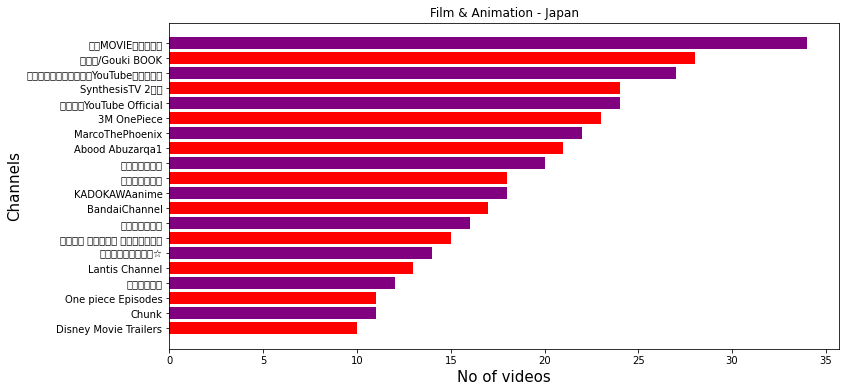

In [326]:
views_channels = seccionJp.groupby('channel_title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['views'],color=['red','purple'])
plt.xlabel("No of videos",size=15)
plt.ylabel("Channels",size=15)
plt.title("Film & Animation - Japan")
plt.show

## Mejor rango de duración de video

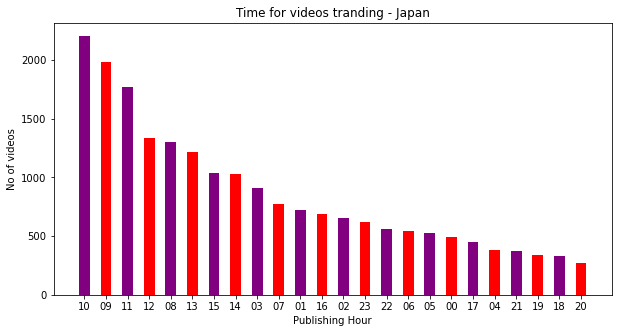

In [205]:
hour = polemicoJp.publish_time.apply(lambda x: x.strftime("%H"))
total_dict=(hour.value_counts().to_dict())
count= pd.DataFrame(list(total_dict.items()),columns = ['Publishing Hour', 'No of videos'])
fig=plt.figure(figsize=(10,5))
plt.bar(count['Publishing Hour'],count['No of videos'],color=['purple','red'],width=0.5)
plt.xlabel("Publishing Hour")
plt.ylabel("No of videos")
plt.title("Time for videos tranding - Japan")
plt.show()

In [259]:
df_japan['Trending dif_days'] = df_japan.apply(lambda row: (row.trending_date-row.publish_time).days, axis = 1)
df_japan.head(5)

video_id trending_date                                      title  \
0  5ugKfHgsmYw    2018-02-07                         陸自ヘリ、垂直に落下＝路上の車が撮影   
1  ohObafdd34Y    2018-02-07                     イッテQ お祭り男宮川×手越 巨大ブランコ②   
2  aBr2kKAHN6M    2018-02-07                      Live Views of Starman   
3  5wNnwChvmsQ    2018-02-07                 東京ディズニーリゾートの元キャストが暴露した秘密5選   
4  B7J47qFvdsk    2018-02-07  榮倉奈々、衝撃の死んだふり！映画『家に帰ると妻が必ず死んだふりをしています。』特報   

          channel_title  category_id        publish_time  \
0            時事通信映像センター           25 2018-02-06 03:04:37   
1  神谷えりな Kamiya Erina 2            1 2018-02-06 04:01:56   
2                SpaceX           28 2018-02-06 21:38:22   
3               アシタノワダイ           25 2018-02-06 06:08:49   
4               シネマトゥデイ            1 2018-02-06 02:30:00   

                                                tags    views   likes  \
0  事故|"佐賀"|"佐賀県"|"ヘリコプター"|"ヘリ"|"自衛隊"|"墜落"|"落下"|"現...   188085     591   
1                                             [none]    90929     442   
2                                             [none]  6408303  165892   
3                                            アシタノワダイ    96255    1165   
4                                             [none]   108408    1336   

   dislikes  comment_count         category_name  Trending dif_days  
0       189              0       News & Politics                  0  
1        88            174      Film & Animation                  0  
2      2331           3006  Science & Technology                  0  
3       277            545       News & Politics                  0  
4        74            201      Film & Animation                  0

## Tags que podrian posicionarlo mejor

In [260]:
titulo = df_japan['title'].value_counts(ascending = False).to_frame()
titulo.head(10)

title
【吹いたら負け】話題の面白い画像集                                      17
リクエストを即興で弾き語ります！！！                                     14
陸自ヘリ、垂直に落下＝路上の車が撮影                                      8
西城秀樹の訃報を江原啓之が予言していた事実が発覚！１０年前の霊視で見えた内容とは？               8
【最強の飯テロ】絶対に深夜に見ないでください。                                 7
【閉園後】深夜３時のディズニーランドが不気味すぎた・・！                            6
シャルダンボタニカルCM“ポルトガル人ミゲル”篇Ａ 15秒                           6
朝ごはん作ってみた『謎の生物の卵のプリン』                                   6
猫がいない Where's my cat?                                   6
リカちゃんハウスにマグマがきた!?床が溶岩になる★おうち脱出ゲーム♪Floor is Lava...      6

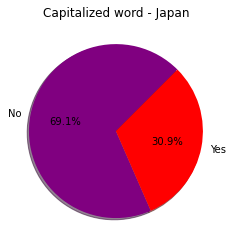

In [206]:
def capitalized_word(title):
    for i in title.split():
        if i.isupper():
            return True
    return False
df_japan["capitalized"] = df_japan["title"].apply(capitalized_word)
counts_capitalized = df_japan["capitalized"].value_counts().to_dict()
plt.pie([counts_capitalized[False], counts_capitalized[True]], labels=['No', 'Yes'], autopct='%1.1f%%', shadow=True, colors=['purple', 'red'],startangle=45)
plt.title("Capitalized word - Japan")
plt.show()

## Caracteristicas titulo de video

In [262]:
titulo = df_japan['tags'].value_counts(ascending = False).to_frame()
titulo.head(5)

tags
[none]                                              3200
Fishing|"bassfishing"|"釣り"|"バス釣り"|"ブラックバス"|"ブラッ...   145
料理|"ブログ"|"エンターテイメント"|"やってみた"|"むねお"|"よーらい"|"佐賀よか...   108
よーらい|"佐賀よかでしょう"|"釣りよかでしょう"|"釣り"                       76
hajime|"はじめしゃちょー"|"funny"|"crazy"|"japanese"|"はじめ"    69

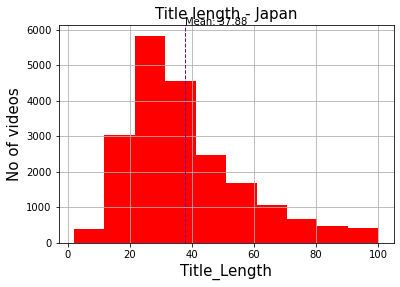

In [338]:
df_japan["title_length"] = df_japan["title"].apply(lambda x: len(x))
fig = df_japan['title_length'].hist(color="red")
fig.axvline(df_japan['title_length'].mean(), color='purple', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
fig.text(df_japan['title_length'].mean(), max_ylim, 'Mean: {:.2f}'.format(df_japan['title_length'].mean()))
plt.xlabel("Title_Length",fontsize=15)
plt.ylabel("No of videos",fontsize=15)
plt.title("Title length - Japan",size=15)
plt.show()

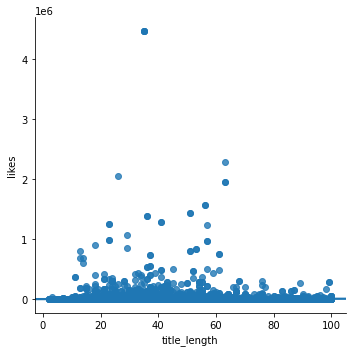

In [265]:
sns.lmplot(x="title_length", y="likes", data = df_japan)

## SOUTH KOREA

In [208]:
south_korea = pd.read_csv('KRvideos.csv')
south_korea

video_id trending_date                                  title  \
0      RxGQe4EeEpA      17.14.11                     좋아 by 민서_윤종신_좋니 답가   
1      hH7wVE8OlQ0      17.14.11                       JSA 귀순 북한군 총격 부상   
2      9V8bnWUmE9U      17.14.11             나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼)   
3      0_8py-t5R80      17.14.11             이명박 출국 현장, 놓치면 안되는 장면   
4      bk55RbxiQdI      17.14.11                김장겸은 물러갔다 MBC 노조 환호와 눈물   
...            ...           ...                                    ...   
34562  pj6YBBrO1sQ      18.14.06             장모님 가게한다고 1억만 달라는 아내 사이다카톡   
34563  _Ne9ER-jr20      18.14.06        여러분~ 렌즈가 이렇게 위험합니다!!!ㅜㅜ _[이슈텔러]   
34564  xuOQq_fzEjk      18.14.06                     2018년 6월 13일 아침 뉴스   
34565  uXvjxeg08eQ      18.14.06          워너원 웃음 참기 영상 워너원 GO X-con.ver   
34566  C-bLqIftDY4      18.14.06  [법륜스님의 즉문즉설 제 1398회] 시동생의 아이를 키우게 됐어요   

          channel_title  category_id              publish_time  \
0                라푸마코리아           22  2017-11-13T07:07:36.000Z   
1                Edward           25  2017-11-13T10:59:16.000Z   
2             나몰라패밀리 핫쇼           22  2017-11-11T07:16:08.000Z   
3                 미디어몽구           25  2017-11-12T11:19:52.000Z   
4                NocutV           25  2017-11-13T11:08:59.000Z   
...                 ...          ...                       ...   
34562             이슈트래커           24  2018-06-10T23:00:01.000Z   
34563  이슈텔러 issueTeller           24  2018-06-12T07:00:06.000Z   
34564      News Express           25  2018-06-12T13:17:29.000Z   
34565                원플           22  2018-06-11T11:57:20.000Z   
34566        법륜스님의 즉문즉설           29  2018-06-10T20:00:01.000Z   

                                                    tags   views  likes  \
0                          라푸마|"윤종신"|"좋니"|"좋아"|"샬레"|"민서"  156130   1422   
1            JSA|"귀순"|"북한군"|"총격"|"부상"|"JSA 귀순 북한군 총격 부상"   76533    211   
2                    아디다스|"빼빼로"|"핫쇼"|"나몰라패밀리"|"대학로"|"공연"  421409   5112   
3      이명박|"이명박 출국금지"|"이명박 출국현장"|"이명박 바레인"|"이명박 대통령"|...  222850   2093   
4              nocutV|"노컷V"|"CBS"|"mbc"|"김장겸"|"해임"|"허일후"   84466   1094   
...                                                  ...     ...    ...   
34562                                             [none]  156439    383   
34563                                             [none]  130948   3121   
34564  한국|"북한"|"미국"|"중국"|"일본"|"러시아"|"한국뉴스"|"뉴스"|"국제뉴스...   62555    319   
34565  워너원|"워너원 고"|"워너원 GO"|"웃음참기"|"워너원 웃음참기"|"워너원 레전...   63306   2369   
34566  불교|"즉문즉설"|"법륜스님"|"정토회"|"buddha"|"buddhism"|"po...   63716    500   

       dislikes  comment_count  \
0            40            272   
1            28            113   
2           166            459   
3           173           1219   
4           109            450   
...         ...            ...   
34562        58            308   
34563        55            988   
34564        71            105   
34565        27            571   
34566        58            135   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg              False   
1      https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg              False   
2      https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg              False   
3      https://i.ytimg.com/vi/0_8py-t5R80/default.jpg              False   
4      https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg              False   
...                                               ...                ...   
34562  https://i.ytimg.com/vi/pj6YBBrO1sQ/default.jpg              False   
34563  https://i.ytimg.com/vi/_Ne9ER-jr20/default.jpg              False   
34564  https://i.ytimg.com/vi/xuOQq_fzEjk/default.jpg              False   
34565  https://i.ytimg.com/vi/uXvjxeg08eQ/default.jpg              False   
34566  https://i.ytimg.com/vi/C-bLqIftDY4/default.jpg              False   

       ratings_disabled  video_error_or_removed  \
0                 False                   

In [209]:
south_korea = south_korea.drop(['thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description'], axis = 1)

In [210]:
south_korea['category_name'] = south_korea['category_id'].apply(lambda x: dict_categoria.get(x, 'NaN'))

In [211]:
south_korea['trending_date'] = pd.to_datetime(pd.Series(south_korea['trending_date'].apply(lambda x:'20'+x[0:2]+'.'+x[6:]+'.'+x[3:5])))
south_korea['publish_time'] = pd.to_datetime(pd.Series(south_korea['publish_time'].apply(lambda x:x[:19])))

In [212]:
df_south_korea = south_korea.copy()
df_south_korea.head()

video_id trending_date                       title channel_title  \
0  RxGQe4EeEpA    2017-11-14          좋아 by 민서_윤종신_좋니 답가        라푸마코리아   
1  hH7wVE8OlQ0    2017-11-14            JSA 귀순 북한군 총격 부상        Edward   
2  9V8bnWUmE9U    2017-11-14  나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼)     나몰라패밀리 핫쇼   
3  0_8py-t5R80    2017-11-14  이명박 출국 현장, 놓치면 안되는 장면         미디어몽구   
4  bk55RbxiQdI    2017-11-14     김장겸은 물러갔다 MBC 노조 환호와 눈물        NocutV   

   category_id        publish_time  \
0           22 2017-11-13 07:07:36   
1           25 2017-11-13 10:59:16   
2           22 2017-11-11 07:16:08   
3           25 2017-11-12 11:19:52   
4           25 2017-11-13 11:08:59   

                                                tags   views  likes  dislikes  \
0                      라푸마|"윤종신"|"좋니"|"좋아"|"샬레"|"민서"  156130   1422        40   
1        JSA|"귀순"|"북한군"|"총격"|"부상"|"JSA 귀순 북한군 총격 부상"   76533    211        28   
2                아디다스|"빼빼로"|"핫쇼"|"나몰라패밀리"|"대학로"|"공연"  421409   5112       166   
3  이명박|"이명박 출국금지"|"이명박 출국현장"|"이명박 바레인"|"이명박 대통령"|...  222850   2093       173   
4          nocutV|"노컷V"|"CBS"|"mbc"|"김장겸"|"해임"|"허일후"   84466   1094       109   

   comment_count    category_name  
0            272   People & Blogs  
1            113  News & Politics  
2            459   People & Blogs  
3           1219  News & Politics  
4            450  News & Politics

In [213]:
df_south_korea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   video_id       34567 non-null  object        
 1   trending_date  34567 non-null  datetime64[ns]
 2   title          34567 non-null  object        
 3   channel_title  34567 non-null  object        
 4   category_id    34567 non-null  int64         
 5   publish_time   34567 non-null  datetime64[ns]
 6   tags           34567 non-null  object        
 7   views          34567 non-null  int64         
 8   likes          34567 non-null  int64         
 9   dislikes       34567 non-null  int64         
 10  comment_count  34567 non-null  int64         
 11  category_name  34567 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 3.2+ MB


In [214]:
df_south_korea.isnull().sum()

video_id         0
trending_date    0
title            0
channel_title    0
category_id      0
publish_time     0
tags             0
views            0
likes            0
dislikes         0
comment_count    0
category_name    0
dtype: int64

In [215]:
df_south_korea['category_name'].unique()

array(['People & Blogs', 'News & Politics', 'Sports', 'Travel & Events',
       'Comedy', 'Music', 'Entertainment', 'Pets & Animals',
       'Film & Animation', 'Shows', 'Science & Technology', 'Gaming',
       'NaN', 'Autos & Vehicles', 'Education', 'Howto & Style',
       'Trailers'], dtype=object)

## Contenido viral

In [222]:
views_mediaKr = df_south_korea['views'].mean() 
print(views_mediaKr)
likes_mediaKr = df_south_korea['likes'].mean()
print(likes_mediaKr)
comments_mediaKr = df_south_korea['comment_count'].mean()
print(comments_mediaKr)

424947.27089420543
12186.41802875575
2025.3825035438424


In [223]:
viralKr = df_south_korea[(df_south_korea['views'] > views_mediaKr) & (df_south_korea['likes'] > likes_mediaKr) & (df_south_korea['comment_count'] > comments_mediaKr)]
viralKr.iloc[:50]

video_id trending_date  \
14    o4_tHTmniw4    2017-11-14   
65    7MxiQ4v0EnE    2017-11-14   
76    c64I9HNpiOY    2017-11-14   
100   cCOPLqDibfQ    2017-11-14   
146   r_kggQY7cHw    2017-11-14   
150   1ZAPwfrtAFY    2017-11-14   
158   n1WpP7iowLc    2017-11-14   
169   eBBKwCAoShE    2017-11-14   
186   o4_tHTmniw4    2017-11-15   
200   kgaO45SyaO4    2017-11-15   
286   cCOPLqDibfQ    2017-11-15   
321   7MxiQ4v0EnE    2017-11-15   
326        #NAME?    2017-11-15   
332   5530I_pYjbo    2017-11-15   
333   c64I9HNpiOY    2017-11-15   
334   zOOmEDwPJX0    2017-11-15   
347   1ZAPwfrtAFY    2017-11-15   
372   kgaO45SyaO4    2017-11-16   
373   1YEXXIWqkMM    2017-11-16   
384   o4_tHTmniw4    2017-11-16   
394   JN62XAh1jOA    2017-11-16   
440   AHQOWzqJFew    2017-11-16   
492   5530I_pYjbo    2017-11-16   
498   cCOPLqDibfQ    2017-11-16   
555   5ORXcfLXuXU    2017-11-17   
565   ixxR3ZoqnF0    2017-11-17   
581   kgaO45SyaO4    2017-11-17   
618   JN62XAh1jOA    2017-11-17   
627   vDxD4HwEFdY    2017-11-17   
662   AHQOWzqJFew    2017-11-17   
706   1YEXXIWqkMM    2017-11-17   
717   5530I_pYjbo    2017-11-17   
719   cCOPLqDibfQ    2017-11-17   
721   fRj34o4hN4I    2017-11-18   
722   6uJf2IT2Zh8    2017-11-18   
734   H1sXXqBDydk    2017-11-18   
815   7uVU6QAvgG8    2017-11-18   
818   ixxR3ZoqnF0    2017-11-18   
820   jKkOYEW7RvQ    2017-11-18   
874   vDxD4HwEFdY    2017-11-18   
903   AHQOWzqJFew    2017-11-18   
905   H1sXXqBDydk    2017-11-19   
908   fRj34o4hN4I    2017-11-19   
911   6uJf2IT2Zh8    2017-11-19   
917   ZJDMWVZta3M    2017-11-19   
966   QRSK6ZD12-s    2017-11-19   
987   7uVU6QAvgG8    2017-11-19   
1024  ixxR3ZoqnF0    2017-11-19   
1030  jKkOYEW7RvQ    2017-11-19   
1094  H1sXXqBDydk    2017-11-20   

                                                  title  \
14        WannaOne (워너원) - 'Beautiful' M/V (Movie ver.)   
65    Daang ( Full Video ) | Mankirt Aulakh | Sukh S...   
76    Padmavati : Ek Dil Ek Jaan Video Song | Deepik...   
100   Wanna One (워너원) - 'BEAUTIFUL' Lyrics [Color Co...   
146   Giọng ải giọng ai 2 | tập 6 full: Trấn Thành h...   
150   The Trump Presidency: Last Week Tonight with J...   
158          Eminem - Walk On Water (Audio) ft. Beyoncé   
169                          아이폰8 2대 형 안쓰는데 가져갈사람있어!???   
186       WannaOne (워너원) - 'Beautiful' M/V (Movie ver.)   
200                                    The New SpotMini   
286   Wanna One (워너원) - 'BEAUTIFUL' Lyrics [Color Co...   
321   Daang (Full Video) |Mankirt Aulakh|MixSingh|De...   
326   Sau Ánh Hào Quang #7 FULL | Cát Phượng: Cái sa...   
332                               How I Trained My Cats   
333   Padmavati : Ek Dil Ek Jaan Video Song | Deepik...   
334   Jannat (Full Song) Aatish - Latest Punjabi Son...   
347   The Trump Presidency: Last Week Tonight with J...   
372                                    The New SpotMini   
373   [PREVIEW] BTS (방탄소년단) 2018 Season’s greetings ...   
384       WannaOne (워너원) - 'Beautiful' M/V (Movie ver.)   
394   The MOST DIFFICULT Korean SAT English + Maths ...   
440                                 엄마미안해.. 애들아 형 외제차샀다   
492                               How I Trained My Cats   
498   Wanna One (워너원) - 'BEAUTIFUL' Lyrics [Color Co...   
555    Red Velvet 레드벨벳 '피카부 (Peek-A-Boo)' Teaser Part.2   
565   BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...   
581                                    The New SpotMini   
618   The MOST DIFFICULT Korean SAT English + Maths ...   
627              러블리즈(Lovelyz) 종소리(Twinkle) Official MV   
662                                 엄마미안해.. 애들아 형 외제차샀다   
706   [PREVIEW] BTS (방탄소년단) 2018 Season’s greetings ...   
717                               How I Trained My Cats   
719   Wanna One (워너원) - 'BEAUTIFUL' Lyrics [Color Co...   
721                                  What's new, Atlas?   
722               Red Velvet 레드벨벳 '피카부 (Peek-A-Boo)' MV   
734                           시간정지 능력을 가진 남자가 여성에게 한 행동   
815   Loot 2 | New Superhit Nepali Movie

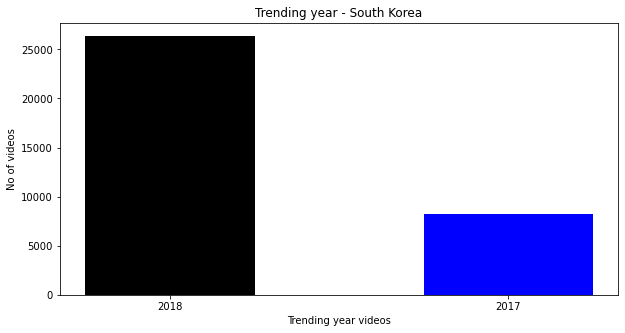

In [224]:
day=df_south_korea['trending_date'].dt.strftime('%Y')
total_dict=(day.value_counts()).to_dict()
count= pd.DataFrame(list(total_dict.items()),columns=['Trending year videos','No of videos'])

fig = plt.figure(figsize=(10,5))
plt.bar(count['Trending year videos'], count['No of videos'],color=['black', 'blue'], width=0.5)
plt.xlabel("Trending year videos")
plt.ylabel("No of videos")
plt.title("Trending year - South Korea")
plt.show()

<AxesSubplot:title={'center':'Contenido viral - South Korea'}>

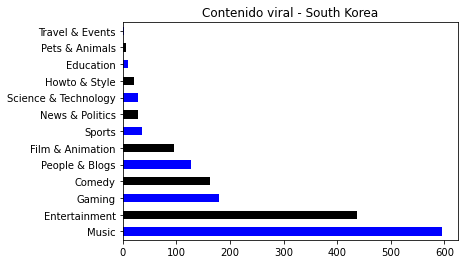

In [225]:
categoria = viralKr['category_name'].value_counts()
categoria.plot(kind='barh', title="Contenido viral - South Korea",color=['blue','black'])

<ipython-input-226-dc8ff95b81ea>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  b = a['category_name','likes'].max()


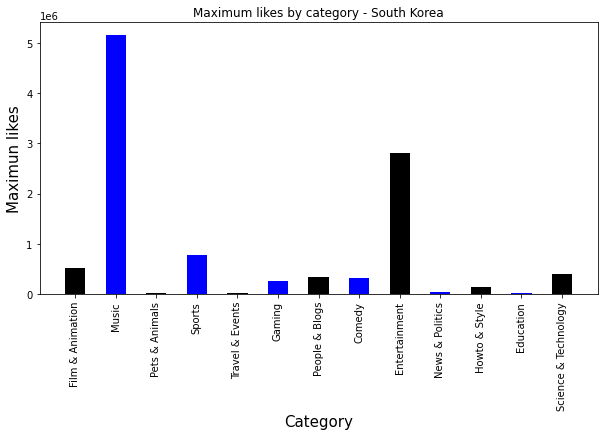

In [226]:
a = viralKr.groupby('category_id')
b = a['category_name','likes'].max()

fig=plt.figure(figsize=(10,5))
plt.bar(b['category_name'],b['likes'],color=['black','blue'],width=0.5)
plt.xticks(rotation=90)
plt.xlabel("Category",size=15)
plt.ylabel("Maximun likes",size=15)
plt.title("Maximum likes by category - South Korea")

plt.show()

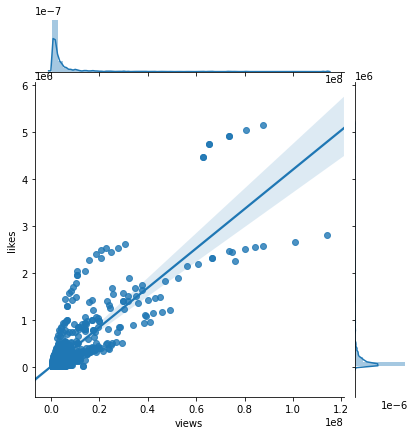

In [227]:
sns.jointplot(x='views', y='likes', data=viralKr,kind='reg')


### Mostrar los principales canales

<function matplotlib.pyplot.show(close=None, block=None)>

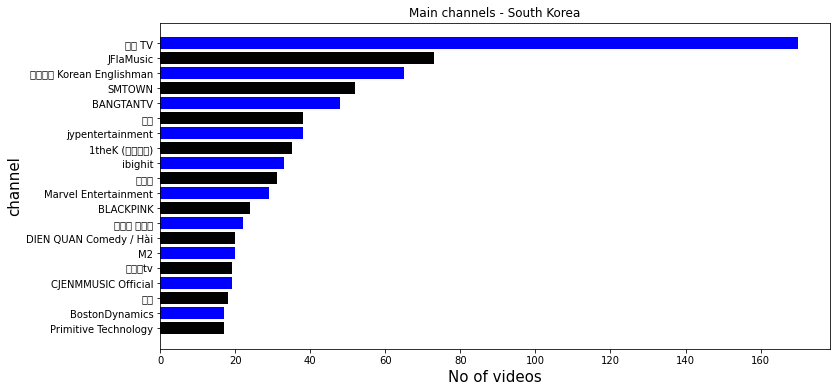

In [322]:
views_channels = viralKr.groupby('channel_title').size().reset_index(name="video_count").sort_values("video_count", ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('video_count')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['video_count'],color=['black','blue'])
plt.xlabel("No of videos",size=15)
plt.ylabel("channel",size=15)
plt.title("Main channels - South Korea")
plt.show

## Contenido polémico

In [230]:
polemicoKr = df_south_korea.sort_values(by = 'views', ascending = False)
polemicoKr.iloc[:50]

video_id trending_date  \
4856   FlsCjmMhFmw    2017-12-11   
4678   FlsCjmMhFmw    2017-12-10   
4018   6ZfuNTqbHE8    2017-12-06   
30844  7C2z4GqqS5E    2018-05-24   
3750   6ZfuNTqbHE8    2017-12-05   
30583  7C2z4GqqS5E    2018-05-23   
3544   6ZfuNTqbHE8    2017-12-04   
4453   FlsCjmMhFmw    2017-12-09   
3381   6ZfuNTqbHE8    2017-12-03   
30352  7C2z4GqqS5E    2018-05-22   
30486  7C2z4GqqS5E    2018-05-22   
28554  VYOjWnS4cMY    2018-05-11   
3185   6ZfuNTqbHE8    2017-12-02   
3330   6ZfuNTqbHE8    2017-12-02   
30291  7C2z4GqqS5E    2018-05-21   
30171  7C2z4GqqS5E    2018-05-21   
29969  7C2z4GqqS5E    2018-05-20   
30069  7C2z4GqqS5E    2018-05-20   
28313  VYOjWnS4cMY    2018-05-10   
3018   6ZfuNTqbHE8    2017-12-01   
4244   FlsCjmMhFmw    2017-12-08   
26391  u9Mv98Gr5pY    2018-04-28   
28130  VYOjWnS4cMY    2018-05-09   
26147  u9Mv98Gr5pY    2018-04-27   
21213  QwievZ1Tx-8    2018-03-22   
20966  QwievZ1Tx-8    2018-03-21   
24314  i0p1bmr0EmE    2018-04-15   
5991   rRzxEiBLQCA    2017-12-18   
20767  QwievZ1Tx-8    2018-03-20   
25972  u9Mv98Gr5pY    2018-04-26   
24088  i0p1bmr0EmE    2018-04-14   
5768   rRzxEiBLQCA    2017-12-17   
2867   6ZfuNTqbHE8    2017-11-30   
9446   LsoLEjrDogU    2018-01-08   
20594  QwievZ1Tx-8    2018-03-19   
14022  BhIEIO0vaBE    2018-02-06   
20176  tCXGJQYZ9JA    2018-03-16   
10529  dfnCAmr569k    2018-01-16   
5551   rRzxEiBLQCA    2017-12-16   
25623  ffxKSjUwKdU    2018-04-23   
9244   LsoLEjrDogU    2018-01-07   
27958  VYOjWnS4cMY    2018-05-08   
2788   kTlv5_Bs8aw    2017-11-29   
20437  QwievZ1Tx-8    2018-03-18   
19966  tCXGJQYZ9JA    2018-03-15   
20017  tCXGJQYZ9JA    2018-03-15   
10323  dfnCAmr569k    2018-01-15   
4814   vn9mMeWcgoM    2017-12-11   
5378   rRzxEiBLQCA    2017-12-15   
25810  u9Mv98Gr5pY    2018-04-25   

                                                   title  \
4856   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
4678   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
4018   Marvel Studios' Avengers: Infinity War Officia...   
30844                BTS (방탄소년단) 'FAKE LOVE' Official MV   
3750   Marvel Studios' Avengers: Infinity War Officia...   
30583                BTS (방탄소년단) 'FAKE LOVE' Official MV   
3544   Marvel Studios' Avengers: Infinity War Officia...   
4453   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
3381   Marvel Studios' Avengers: Infinity War Officia...   
30352                BTS (방탄소년단) 'FAKE LOVE' Official MV   
30486                BTS (방탄소년단) 'FAKE LOVE' Official MV   
28554  Childish Gambino - This Is America (Official V...   
3185   Marvel Studios' Avengers: Infinity War Officia...   
3330   Marvel Studios' Avengers: Infinity War Officia...   
30291                BTS (방탄소년단) 'FAKE LOVE' Official MV   
30171                BTS (방탄소년단) 'FAKE LOVE' Official MV   
29969                BTS (방탄소년단) 'FAKE LOVE' Official MV   
30069                BTS (방탄소년단) 'FAKE LOVE' Official MV   
28313  Childish Gambino - This Is America (Official V...   
3018   Marvel Studios' Avengers: Infinity War Officia...   
4244   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
26391                      VENOM - Official Trailer (HD)   
28130  Childish Gambino - This Is America (Official V...   
26147                      VENOM - Official Trailer (HD)   
21213  Marvel Studios' Avengers: Infinity War - Offic...   
20966  Marvel Studios' Avengers: Infinity War - Offic...   
24314                            TWICE What is Love? M/V   
5991                              TWICE Heart Shaker M/V   
20767  Marvel Studios' Avengers: Infinity War - Offic...   
25972                      VENOM - Official Trailer (HD)   
24088                            TWICE What is Love? M/V   
5768                              TWICE Heart Shaker M/V   
2867   Marvel Studios' Avengers: Infinity War Officia...   
9446   Bruno Mars - Finesse (Remix) [Feat. Cardi B] [...   
20594  Marvel Studios' Avengers: Infinity War - Offic...   
14022        

<AxesSubplot:title={'center':'Contenido polémico - South Korea'}>

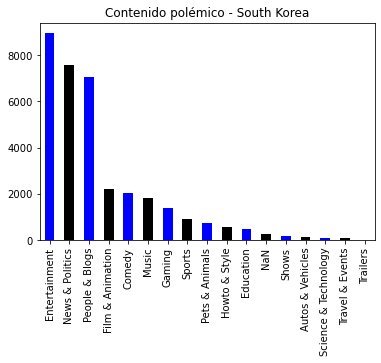

In [231]:
polemicoKr['category_name'].value_counts().plot(kind = "bar", title="Contenido polémico - South Korea", color=['blue','black'])

<function matplotlib.pyplot.show(close=None, block=None)>

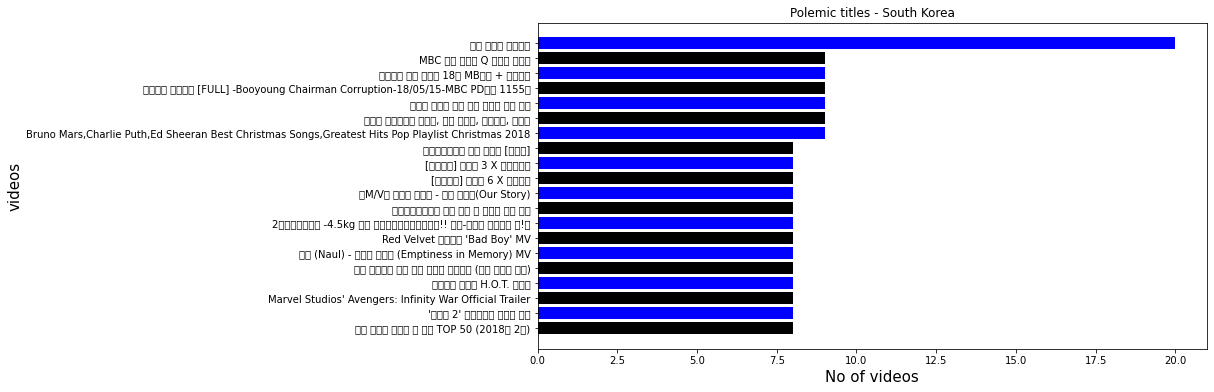

In [236]:
views_videos = polemicoKr.groupby('title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
videos_sort = views_videos.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(videos_sort['title'], videos_sort['views'],color=['black','blue'])
plt.xlabel("No of videos",size=15)
plt.ylabel("videos",size=15)
plt.title("Polemic titles - South Korea")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

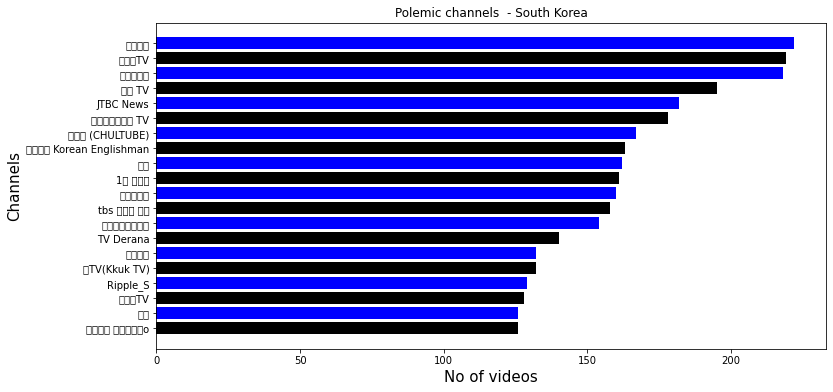

In [237]:
views_channels = polemicoKr.groupby('channel_title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['views'],color=['black','blue'])
plt.xlabel("No of videos",size=15)
plt.ylabel("Channels",size=15)
plt.title("Polemic channels  - South Korea")

plt.show

## Seccion especifica

In [238]:
seccionKr = df_south_korea[df_canada['category_name'] == 'Film & Animation']
seccionKr.head(5)

<ipython-input-238-690a52347cbe>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  seccionKr = df_south_korea[df_canada['category_name'] == 'Film & Animation']


video_id trending_date  \
12   3NgzuR6mCT0    2017-11-14   
18   zMHOvFaLaBs    2017-11-14   
19   9r5ncSsv59I    2017-11-14   
45        #NAME?    2017-11-14   
103  VF2ADI5agOg    2017-11-14   

                                                 title         channel_title  \
12                                     눈물 흘리는 관상전문가 ㅋㅋ              그런데 말입니다   
18   김준면 인생 새로운 경험 90cm우동면발원샷 [맛있는 녀석들 Tasty Guys] ...  맛있는 녀석들 (Tasty Guys)   
19       손흥민, 차범근이 부르자 말없이 안겨서 울다!!! 차붐도 덩달어 코끝이 빨개집니다     Sports Highlights   
45    신의한수 생방송 11월 13일 / MB, 노무현 비리와 바다이야기로 문재인 박살 낸다!                  신의한수   
103                     Ep 31.문과1등 이과 1등 보이스피싱을 당하다???                1등 미디어   

     category_id        publish_time  \
12            19 2017-11-11 05:40:01   
18            24 2017-11-13 09:00:02   
19            17 2017-11-11 01:34:22   
45            25 2017-11-13 09:30:56   
103           23 2017-11-10 06:00:01   

                                                  tags   views  likes  \
12                                              [none]  260467    817   
18   맛있는 녀석들|"Tasty Guys"|"김준현"|"김민경"|"문세윤"|"유민상"|"...   75564    297   
19   차범근|"대한민국 콜롬비아"|"한국 콜롬비아"|"축구"|"평가전"|"국가대표"|"손...  290742    959   
45                                              [none]   32098   1427   
103  웃찾사|"문과1등"|"이과1등"|"이그젝틀리"|"이과젝틀리"|"김성기"|"신흥재"|...  498073   7110   

     dislikes  comment_count    category_name  
12         39            113  Travel & Events  
18         16             74    Entertainment  
19         36            262           Sports  
45        127            201  News & Politics  
103       220           1866           Comedy

<function matplotlib.pyplot.show(close=None, block=None)>

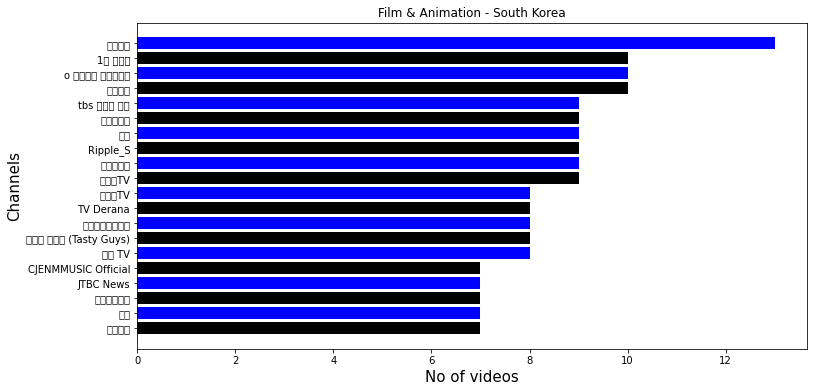

In [240]:
views_channels = seccionKr.groupby('channel_title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['views'],color=['black','blue'])
plt.xlabel("No of videos",size=15)
plt.ylabel("Channels",size=15)
plt.title("Film & Animation - South Korea")
plt.show

## Mejor rango de duracion

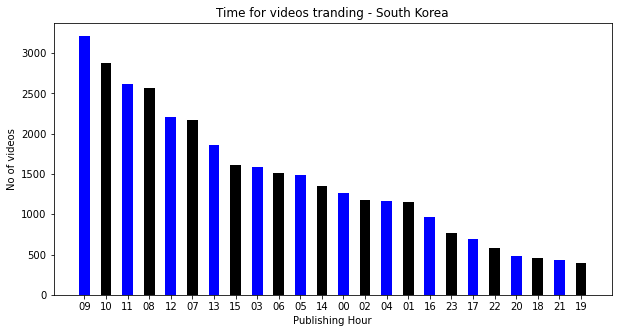

In [241]:
hour = polemicoKr.publish_time.apply(lambda x: x.strftime("%H"))
total_dict=(hour.value_counts().to_dict())
count= pd.DataFrame(list(total_dict.items()),columns = ['Publishing Hour', 'No of videos'])
fig=plt.figure(figsize=(10,5))
plt.bar(count['Publishing Hour'],count['No of videos'],color=['blue','black'],width=0.5)
plt.xlabel("Publishing Hour")
plt.ylabel("No of videos")
plt.title("Time for videos tranding - South Korea")
plt.show()

In [317]:
df_south_korea['Trending dif_days'] = df_south_korea.apply(lambda row: (row.trending_date-row.publish_time).days, axis = 1)
df_south_korea.head()

video_id trending_date                       title channel_title  \
0  RxGQe4EeEpA    2017-11-14          좋아 by 민서_윤종신_좋니 답가        라푸마코리아   
1  hH7wVE8OlQ0    2017-11-14            JSA 귀순 북한군 총격 부상        Edward   
2  9V8bnWUmE9U    2017-11-14  나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼)     나몰라패밀리 핫쇼   
3  0_8py-t5R80    2017-11-14  이명박 출국 현장, 놓치면 안되는 장면         미디어몽구   
4  bk55RbxiQdI    2017-11-14     김장겸은 물러갔다 MBC 노조 환호와 눈물        NocutV   

   category_id        publish_time  \
0           22 2017-11-13 07:07:36   
1           25 2017-11-13 10:59:16   
2           22 2017-11-11 07:16:08   
3           25 2017-11-12 11:19:52   
4           25 2017-11-13 11:08:59   

                                                tags   views  likes  dislikes  \
0                      라푸마|"윤종신"|"좋니"|"좋아"|"샬레"|"민서"  156130   1422        40   
1        JSA|"귀순"|"북한군"|"총격"|"부상"|"JSA 귀순 북한군 총격 부상"   76533    211        28   
2                아디다스|"빼빼로"|"핫쇼"|"나몰라패밀리"|"대학로"|"공연"  421409   5112       166   
3  이명박|"이명박 출국금지"|"이명박 출국현장"|"이명박 바레인"|"이명박 대통령"|...  222850   2093       173   
4          nocutV|"노컷V"|"CBS"|"mbc"|"김장겸"|"해임"|"허일후"   84466   1094       109   

   comment_count    category_name  Trending dif_days  
0            272   People & Blogs                  0  
1            113  News & Politics                  0  
2            459   People & Blogs                  2  
3           1219  News & Politics                  1  
4            450  News & Politics                  0

## Tags que podrian posicionarlo mejor

In [318]:
titulo = df_south_korea['title'].value_counts(ascending = False).to_frame()
titulo.head(10)

title
브베 실시간 스트리밍                                            20
회장님의 부귀영화 [FULL] -Booyoung Chairman Corruption-...      9
MBC 예능 뜻밖의 Q 장삐쭈 방송분                                    9
김어준의 다스 뵈이다 18회 MB근황 + 지방선거                             9
나경원 의원실 비서 욕설 녹취록 추가 공개                                 9
이재용 여자관계와 연예인, 배우 이나영, 윤은혜가, 조수빈                        9
Bruno Mars,Charlie Puth,Ed Sheeran Best Christm...      9
[병맛더빙] 급식생 3 X 콜롬비아나                                    8
하필 여전사가 사는 집에 들어간 살인마들 (공포 참교육 ㄷㄷ)                      8
시청자제보로 18년만에 선생님 찾았습니다ㅠㅠ!!!                             8

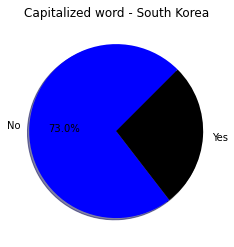

In [242]:
def capitalized_word(title):
    for i in title.split():
        if i.isupper():
            return True
    return False
df_south_korea["capitalized"] = df_south_korea["title"].apply(capitalized_word)
counts_capitalized = df_south_korea["capitalized"].value_counts().to_dict()
plt.pie([counts_capitalized[False], counts_capitalized[True]], labels=['No', 'Yes'], autopct='%1.1f%%', shadow=True, colors=['blue', 'black'],startangle=45)
plt.title("Capitalized word - South Korea")
plt.show()

## Caracteristicas titulo video

In [320]:
titulo = df_south_korea['tags'].value_counts(ascending = False).to_frame()
titulo.head(5)

tags
[none]                                              7183
철구|"BJ철구"|"아프리카철구"|"afreecaTV"|"아프리카TV"|"BJ"|"비...   167
클래시로얄;|"clash;"|"royale;"|"보겸;"|"보겸TV;"|"슈마상;"|...   144
맛있는 녀석들|"Tasty Guys"|"김준현"|"김민경"|"문세윤"|"유민상"|"코...   106
옴니버스|"카톡"|"카카오톡"|"카톡내용"|"카톡저장소"|"썰"                   94

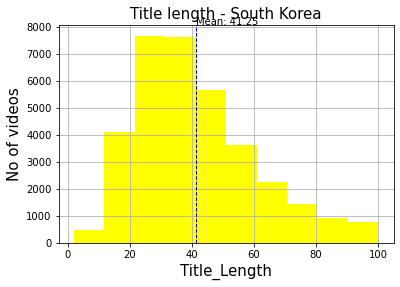

In [243]:
df_south_korea["title_length"] = df_south_korea["title"].apply(lambda x: len(x))
fig = df_south_korea['title_length'].hist(color="yellow")
fig.axvline(df_south_korea['title_length'].mean(), color='blue', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
fig.text(df_south_korea['title_length'].mean(), max_ylim, 'Mean: {:.2f}'.format(df_south_korea['title_length'].mean()))
plt.xlabel("Title_Length",fontsize=15)
plt.ylabel("No of videos",fontsize=15)
plt.title("Title length - South Korea",size=15)
plt.show()

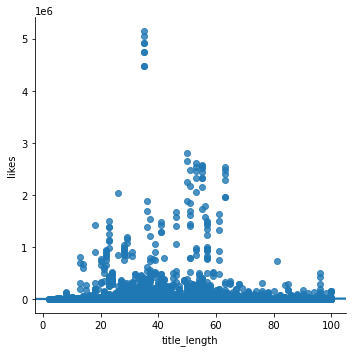

In [322]:
sns.lmplot(x="title_length", y="likes", data = df_south_korea)

# MEXICO

In [249]:
mexico = pd.read_csv('MXvideos.csv')
mexico

video_id trending_date  \
0      SbOwzAl9ZfQ      17.14.11   
1      klOV6Xh-DnI      17.14.11   
2      6L2ZF7Qzsbk      17.14.11   
3      hcY52MFWMDM      17.14.11   
4      _OXDcGPVAa4      17.14.11   
...            ...           ...   
40446  r63VBOagGAo      18.14.06   
40447  i7r_kMbyngk      18.14.06   
40448  _jnwjdMe3Zo      18.14.06   
40449  pAH9omNAWA4      18.14.06   
40450  dj5Z4jTE3-c      18.14.06   

                                                   title  \
0                          Capítulo 12 | MasterChef 2017   
1      ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2                 LOUIS CKAGÓ - EL PULSO DE LA REPÚBLICA   
3       Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4               DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   
...                                                  ...   
40446  Shawn Mendes x Portugal (FPF Official World Cu...   
40447  AMLO llegó con su esposa al Tercer Debate en M...   
40448  Maire usa una blusa kawaiii ¿adorable o ridícula?   
40449         La Jefa del Campeón - Capítulo 2 Parte 3/4   
40450  ¿POR QUÉ SHANKS ES TAN RESPETADO POR TODOS EN ...   

                  channel_title  category_id              publish_time  \
0               MasterChef 2017           24  2017-11-13T06:06:22.000Z   
1      Micky Contreras Martinez           22  2017-11-13T05:11:58.000Z   
2      El Pulso De La República           25  2017-11-13T17:00:02.000Z   
3                      Casanare           25  2017-11-13T03:47:10.000Z   
4                         Musas           26  2017-11-13T19:17:48.000Z   
...                         ...          ...                       ...   
40446          FPFutebolOficial           17  2018-06-13T13:11:56.000Z   
40447                       AMX           25  2018-06-13T01:15:08.000Z   
40448            Historias Wink           24  2018-06-13T15:08:53.000Z   
40449                 Tele Time           22  2018-06-13T02:22:33.000Z   
40450               GolD Nakama           24  2018-06-13T19:01:52.000Z   

                                                    tags   views  likes  \
0      MasterChef Junior 2017|"TV Azteca"|"recetas"|"...  310130   4182   
1                                        La Voz Mexico 7  104972    271   
2      Chumel Torres|"El Pulso de la Republica"|"noti...  136064  10105   
3             temblor|"costa rica"|"sismo en costa rica"   96153    378   
4      MUSAS|"lesslie"|"karen"|"hacks"|"perros"|"dogs...  499965  57781   
...                                                  ...     ...    ...   
40446  Canal|"Oficial"|"da"|"Federação"|"Portuguesa"|...  653114  65639   
40447  AMLO|"morena"|"política"|"PRI"|"PAN"|"PRD"|"Ló...  121674   3558   
40448  maire|"maire vs el internet"|"maire vs interne...   14067    538   
40449                                             [none]   22898     94   
40450                                             [none]  108936   5398   

       dislikes  comment_count  \
0           361           1836   
1           174            369   
2           266            607   
3           171            208   
4           681           7428   
...         ...            ...   
40446       547           3826   
40447        58            491   
40448         6             90   
40449        11              3   
40450       148            993   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg              False   
1      https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg              False   
2      https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg              False   
3      https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg              False   
4      https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg              False   
...                                               ...                ...   
40446  https://i.ytimg.com/vi/r63VBOagGAo/default.jpg              False   
40447  https://i.ytimg.com/vi/i7r_kMbyngk/default

In [250]:
mexico = mexico.drop(['thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description'], axis = 1)

In [251]:
mexico['category_name'] = mexico['category_id'].apply(lambda x: dict_categoria.get(x, 'NaN'))

In [252]:
mexico['trending_date'] = pd.to_datetime(pd.Series(mexico['trending_date'].apply(lambda x:'20'+x[0:2]+'.'+x[6:]+'.'+x[3:5])))
mexico['publish_time'] = pd.to_datetime(pd.Series(mexico['publish_time'].apply(lambda x:x[:19])))

In [253]:
df_mexico = mexico.copy()
df_mexico.head()

video_id trending_date  \
0  SbOwzAl9ZfQ    2017-11-14   
1  klOV6Xh-DnI    2017-11-14   
2  6L2ZF7Qzsbk    2017-11-14   
3  hcY52MFWMDM    2017-11-14   
4  _OXDcGPVAa4    2017-11-14   

                                               title  \
0                      Capítulo 12 | MasterChef 2017   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2             LOUIS CKAGÓ - EL PULSO DE LA REPÚBLICA   
3   Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4           DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   

              channel_title  category_id        publish_time  \
0           MasterChef 2017           24 2017-11-13 06:06:22   
1  Micky Contreras Martinez           22 2017-11-13 05:11:58   
2  El Pulso De La República           25 2017-11-13 17:00:02   
3                  Casanare           25 2017-11-13 03:47:10   
4                     Musas           26 2017-11-13 19:17:48   

                                                tags   views  likes  dislikes  \
0  MasterChef Junior 2017|"TV Azteca"|"recetas"|"...  310130   4182       361   
1                                    La Voz Mexico 7  104972    271       174   
2  Chumel Torres|"El Pulso de la Republica"|"noti...  136064  10105       266   
3         temblor|"costa rica"|"sismo en costa rica"   96153    378       171   
4  MUSAS|"lesslie"|"karen"|"hacks"|"perros"|"dogs...  499965  57781       681   

   comment_count    category_name  
0           1836    Entertainment  
1            369   People & Blogs  
2            607  News & Politics  
3            208  News & Politics  
4           7428    Howto & Style

In [254]:
df_mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40451 entries, 0 to 40450
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   video_id       40451 non-null  object        
 1   trending_date  40451 non-null  datetime64[ns]
 2   title          40451 non-null  object        
 3   channel_title  40451 non-null  object        
 4   category_id    40451 non-null  int64         
 5   publish_time   40451 non-null  datetime64[ns]
 6   tags           40451 non-null  object        
 7   views          40451 non-null  int64         
 8   likes          40451 non-null  int64         
 9   dislikes       40451 non-null  int64         
 10  comment_count  40451 non-null  int64         
 11  category_name  40451 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 3.7+ MB


In [255]:
df_mexico.isnull().sum()

video_id         0
trending_date    0
title            0
channel_title    0
category_id      0
publish_time     0
tags             0
views            0
likes            0
dislikes         0
comment_count    0
category_name    0
dtype: int64

In [256]:
df_mexico.describe(include="object")

video_id                                              title  \
count     40451                                              40451   
unique    33513                                              33785   
top      #NAME?  Bachatas 2018 Romanticas - Prince Royce, Shaki...   
freq        516                                                 30   

       channel_title    tags  category_name  
count          40451   40451          40451  
unique          6977   23635             16  
top           Cracks  [none]  Entertainment  
freq             186    7685          13487

In [257]:
df_mexico['category_name'].unique()

array(['Entertainment', 'People & Blogs', 'News & Politics',
       'Howto & Style', 'Music', 'Comedy', 'Sports', 'Autos & Vehicles',
       'Film & Animation', 'NaN', 'Education', 'Science & Technology',
       'Gaming', 'Pets & Animals', 'Travel & Events', 'Shows'],
      dtype=object)

## Contenido viral

In [258]:
views_mediaMx = df_mexico['views'].mean() 
print(views_mediaMx)
likes_mediaMx = df_mexico['likes'].mean()
print(likes_mediaMx)
comments_mediaMx = df_mexico['comment_count'].mean()
print(comments_mediaMx)

342381.9681590072
15861.837432943561
2039.660008405231


In [259]:
viralMx = df_mexico[(df_mexico['views'] > views_mediaMx) & (df_mexico['likes'] > likes_mediaMx) & (df_mexico['comment_count'] > comments_mediaMx)]
viralMx.iloc[:50]

video_id trending_date  \
4    _OXDcGPVAa4    2017-11-14   
9    cOJ68MQm2ac    2017-11-14   
21   d1oYTRYmNHs    2017-11-14   
29   1ZAPwfrtAFY    2017-11-14   
42   cTRJYA6dibU    2017-11-14   
50   FhuxIRzs8LE    2017-11-14   
51   S9qll04y4iw    2017-11-14   
72   5E4ZBSInqUU    2017-11-14   
106  2kyS6SvSYSE    2017-11-14   
133  064HDEJjPHg    2017-11-14   
137  0dBIkQ4Mz1M    2017-11-14   
153  3s1rvMFUweQ    2017-11-14   
156  WI5MSR8BgXE    2017-11-14   
173  0yIWz1XEeyc    2017-11-14   
177  JzCsM1vtn78    2017-11-14   
190  5qpjK5DgCt4    2017-11-14   
200  W-4d6rdrg3E    2017-11-15   
202  DqiMJ6dAtC8    2017-11-15   
204  RyEZQV9CwAM    2017-11-15   
205  RyMVtv5wCIU    2017-11-15   
219  _OXDcGPVAa4    2017-11-15   
242  Ehke7aPI9l0    2017-11-15   
267  VsYmwBOYfW8    2017-11-15   
287  Ax1P5Q8Kr9g    2017-11-15   
289  ve3oQBjcAGI    2017-11-15   
300  Wg2DYxo-Pow    2017-11-15   
319  ZIf-yocPdKM    2017-11-15   
352  CtBca6H6Teg    2017-11-15   
357  gjXrm2Q-te4    2017-11-15   
400  rKtWh732n1c    2017-11-16   
401  8vdmh6BUz7g    2017-11-16   
402  8-Cjsnq8kVU    2017-11-16   
411  W-4d6rdrg3E    2017-11-16   
412  hHGOdHbLlU0    2017-11-16   
424  eAlsZp9S5x0    2017-11-16   
439  DqiMJ6dAtC8    2017-11-16   
440  1YEXXIWqkMM    2017-11-16   
454  RyEZQV9CwAM    2017-11-16   
507  Ehke7aPI9l0    2017-11-16   
509  RyMVtv5wCIU    2017-11-16   
556  sottGW1p5os    2017-11-16   
602  L-kalEFn8Ms    2017-11-17   
611  IPOAJA4begI    2017-11-17   
612  ixxR3ZoqnF0    2017-11-17   
618  8-Cjsnq8kVU    2017-11-17   
619  vUKRhDKBV-s    2017-11-17   
623  rKtWh732n1c    2017-11-17   
631  TyHvyGVs42U    2017-11-17   
640  fo9610Cj3k4    2017-11-17   
646  1NhedxVMVms    2017-11-17   

                                                 title  \
4             DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   
9    TOP: Los 7 libros infantiles más perturbadores...   
21   **SI TE RÍES, PIERDES** ¡¡(911% IMPOSIBLE)!! 🎀...   
29   The Trump Presidency: Last Week Tonight with J...   
42   Changey Din | Kambi | Sukh E | Sukh Sanghera |...   
50   EXPECTATIVA vs REALIDAD: SER UN ADULTO 🤷🏻‍♀️ |...   
51   ¿MESSI ya amarró el 6º Balón de Oro? | GRIEZMA...   
72          Marshmello - Blocks (Official Music Video)   
106                 WE WANT TO TALK ABOUT OUR MARRIAGE   
133                     Llegó el 11:11 - Luisito Rey ♛   
137                      PLUSH - Bad Unboxing Fan Mail   
153          Taylor Swift: …Ready for It? (Live) - SNL   
156        12 BROMAS ÉPICAS PARA TROLLEAR A TUS AMIGOS   
173  Jake Paul Says Alissa Violet CHEATED with LOGA...   
177               THE LOGANG MADE HISTORY. LOL. AGAIN.   
190  Racist Superman | Rudy Mancuso, King Bach & Le...   
200   INTENTEN HACERME REÍR ! (Edición chistes cortos)   
202                    ¿Cómo ven los daltónicos? (PyR)   
204  ME SUBÍ A UN RASCACIELOS EN PARAGUAY / Juanpa ...   
205                Trabajando en LA CENTRAL DE ABASTO!   
219           DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   
242  Kurt Angle & The Shield lead a Raw raid of Sma...   
267                 Mean Tweets – Jimmy Kimmel Edition   
287  Huge IGN Failure Exposed, Why Zoella Is Being ...   
289  Everything Wrong With Wonder Woman In 14 Minut...   
300     DRAW MY LIFE ( MI VIDA EN DIBUJOS) ! - Pautips   
319   DTOKE vs WOS - FINAL El Quinto Escalón: EL FINAL   
352                   Honest Trailers - Batman Forever   
357     Jimmy Fallon Pays Tribute to His Mother Gloria   
400  UN GRAN CAMBIO A LA MOTO!!! (fabricando base d...   
401         Royal Rumble YouTubero IV - Luisito Rey  ♛   
402                     Deadpool’s “Wet on Wet” Teaser   
411   INTENTEN HACERME REÍR ! (Edición chistes cortos)   
412  COMIDA de GOMA vs REAL! COMER OJO...OH NO! RET...   
424                ICE CREAM ROLLS EXTRAÑOS | EL GUZII   
439                    ¿Cómo ven los daltónicos? (PyR)   
440  [PREVIEW] BTS (방탄소년단) 2018 Season’s greetings ...   
454  ME SUBÍ A UN RASCACIELOS EN PARAGUAY / Juanpa ...   
507  Kurt A

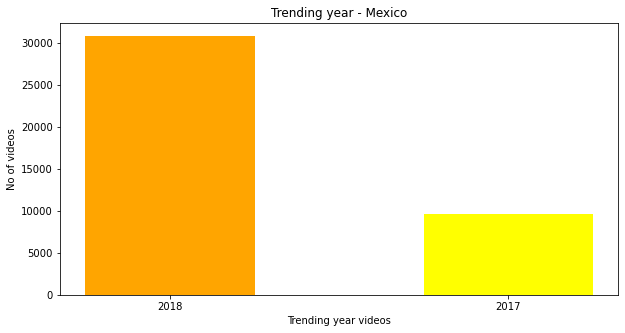

In [261]:
day=df_mexico['trending_date'].dt.strftime('%Y')
total_dict=(day.value_counts()).to_dict()
count= pd.DataFrame(list(total_dict.items()),columns=['Trending year videos','No of videos'])

fig = plt.figure(figsize=(10,5))
plt.bar(count['Trending year videos'], count['No of videos'],color=['orange', 'yellow'], width=0.5)
plt.xlabel("Trending year videos")
plt.ylabel("No of videos")
plt.title("Trending year - Mexico")
plt.show()

<AxesSubplot:title={'center':'Contenido viral - Mexico'}>

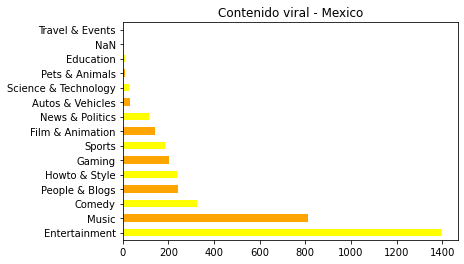

In [425]:
categoria = viralMx['category_name'].value_counts()
categoria.plot(kind='barh', title="Contenido viral - Mexico",color=['yellow','orange'])

<ipython-input-262-870441fba62e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  b = a['category_name','likes'].max()


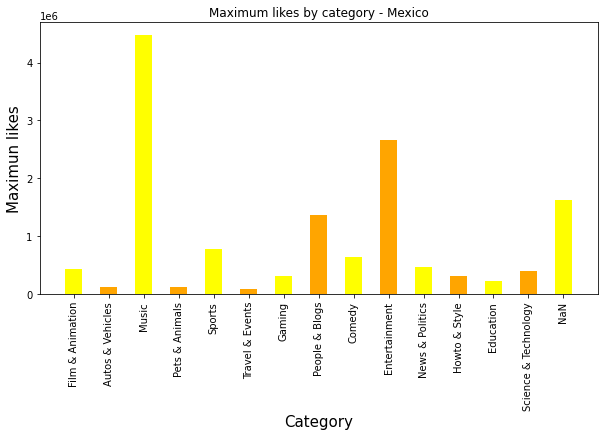

In [262]:
a = viralMx.groupby('category_id')
b = a['category_name','likes'].max()

fig=plt.figure(figsize=(10,5))
plt.bar(b['category_name'],b['likes'],color=['yellow','orange'],width=0.5)
plt.xticks(rotation=90)
plt.xlabel("Category",size=15)
plt.ylabel("Maximun likes",size=15)
plt.title("Maximum likes by category - Mexico")
plt.show()

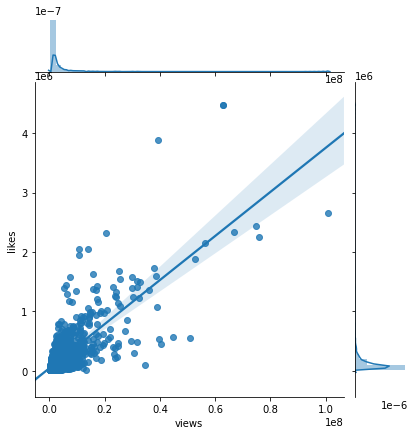

In [340]:
sns.jointplot(x='views', y='likes', data=viralMx,kind='reg')


#### Mostrar los principales canales

<function matplotlib.pyplot.show(close=None, block=None)>

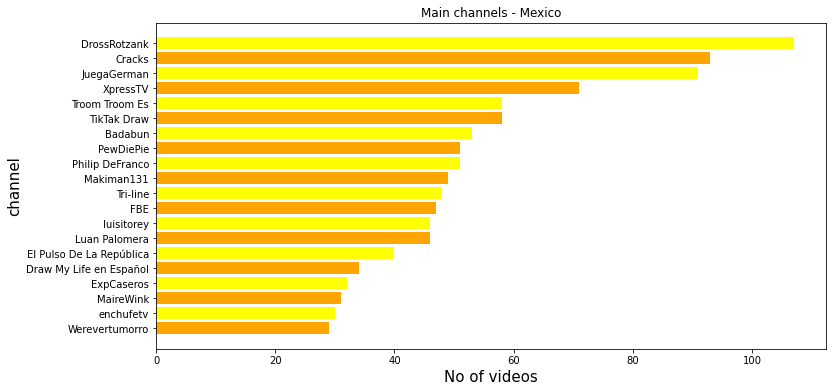

In [263]:
views_channels = viralMx.groupby('channel_title').size().reset_index(name="video_count").sort_values("video_count", ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('video_count')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['video_count'],color=['orange','yellow'])
plt.xlabel("No of videos",size=15)
plt.ylabel("channel",size=15)
plt.title("Main channels - Mexico")
plt.show

## Contenido polémico

In [264]:
polemicoMx = df_mexico.sort_values(by = 'views', ascending = False)
polemicoMx.iloc[:50]

video_id trending_date  \
5261   FlsCjmMhFmw    2017-12-10   
4998   FlsCjmMhFmw    2017-12-09   
3871   6ZfuNTqbHE8    2017-12-03   
3604   6ZfuNTqbHE8    2017-12-02   
35646  7C2z4GqqS5E    2018-05-20   
35793  7C2z4GqqS5E    2018-05-20   
3396   6ZfuNTqbHE8    2017-12-01   
4795   FlsCjmMhFmw    2017-12-08   
21833  _I_D_8Z4sJE    2018-03-05   
23585       #NAME?    2018-03-14   
16715  BhIEIO0vaBE    2018-02-07   
21548  _I_D_8Z4sJE    2018-03-04   
23390       #NAME?    2018-03-13   
35483  7C2z4GqqS5E    2018-05-19   
30929  u9Mv98Gr5pY    2018-04-26   
1248   TyHvyGVs42U    2017-11-20   
3196   6ZfuNTqbHE8    2017-11-30   
24543  QwievZ1Tx-8    2018-03-19   
16381  BhIEIO0vaBE    2018-02-06   
16563  J6-8DQALGt4    2018-02-06   
18811  kLpH1nSLJSs    2018-02-18   
38196  xTlNMmZKwpA    2018-06-02   
23162       #NAME?    2018-03-12   
10966  LsoLEjrDogU    2018-01-07   
33386  VYOjWnS4cMY    2018-05-08   
21339  _I_D_8Z4sJE    2018-03-03   
24324  QwievZ1Tx-8    2018-03-18   
1005   TyHvyGVs42U    2017-11-19   
12133  dfnCAmr569k    2018-01-15   
5554   vn9mMeWcgoM    2017-12-11   
30711  u9Mv98Gr5pY    2018-04-25   
15739  wfWkmURBNv8    2018-02-02   
38328  aJOTlE1K90k    2018-06-03   
37886  xTlNMmZKwpA    2018-06-01   
30148  ffxKSjUwKdU    2018-04-22   
22943       #NAME?    2018-03-11   
5214   vn9mMeWcgoM    2017-12-10   
4596   FlsCjmMhFmw    2017-12-07   
17912  9TRjE7i0ERY    2018-02-13   
23530  tCXGJQYZ9JA    2018-03-14   
29088  9TUBf6l7FBg    2018-04-16   
10623  LsoLEjrDogU    2018-01-06   
35589  yDiXQl7grPQ    2018-05-19   
18582  kLpH1nSLJSs    2018-02-17   
17682  9TRjE7i0ERY    2018-02-12   
34354  8-mloCL49vs    2018-05-13   
11813  dfnCAmr569k    2018-01-14   
31676  Ck4xHocysLw    2018-04-29   
13226  liczsmUSMA4    2018-01-21   
15383  wfWkmURBNv8    2018-02-01   

                                                   title  \
5261   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
4998   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
3871   Marvel Studios' Avengers: Infinity War Officia...   
3604   Marvel Studios' Avengers: Infinity War Officia...   
35646                BTS (방탄소년단) 'FAKE LOVE' Official MV   
35793                BTS (방탄소년단) 'FAKE LOVE' Official MV   
3396   Marvel Studios' Avengers: Infinity War Officia...   
4795   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
21833  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...   
23585              Maluma - El Préstamo (Official Video)   
16715                                    To Our Daughter   
21548  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...   
23390              Maluma - El Préstamo (Official Video)   
35483                BTS (방탄소년단) 'FAKE LOVE' Official MV   
30929                      VENOM - Official Trailer (HD)   
1248           Luis Fonsi, Demi Lovato - Échame La Culpa   
3196   Marvel Studios' Avengers: Infinity War Officia...   
24543  Marvel Studios' Avengers: Infinity War - Offic...   
16381                                    To Our Daughter   
16563  Alexa Loses Her Voice – Amazon Super Bowl LII ...   
18811               Bad Bunny - Amorfoda | Video Oficial   
38196  Cardi B, Bad Bunny & J Balvin - I Like It [Off...   
23162              Maluma - El Préstamo (Official Video)   
10966  Bruno Mars - Finesse (Remix) [Feat. Cardi B] [...   
33386  Childish Gambino - This Is America (Official V...   
21339  Nicky Jam x J. Balvin - X (EQUIS) | Video Oficial   
24324  Marvel Studios' Avengers: Infinity War - Offic...   
1005           Luis Fonsi, Demi Lovato - Échame La Culpa   
12133     Taylor Swift - End Game ft. Ed Sheeran, Future   
5554   Jurassic World: Fallen Kingdom - Official Trai...   
30711                      VENOM - Official Trailer (HD)   
15739           Ozuna x Romeo Santos - El Farsante Remix   
38328              Maroon 5 - Girls Like You ft. Cardi B   
37886  Cardi B, Bad Bunny & J Balvin - I Like It [Off...   
30148               Ariana Grande - No Tears Left To Cry   
22943        

<AxesSubplot:title={'center':'Contenido polémico - Mexico'}>

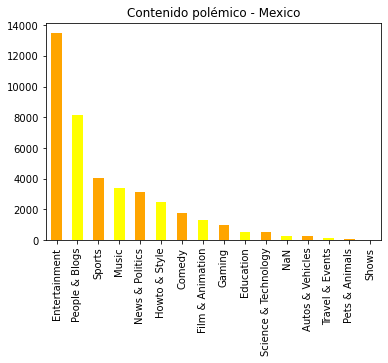

In [337]:
polemicoMx['category_name'].value_counts().plot(kind = "bar", title="Contenido polémico - Mexico", color=['orange','yellow'])

<function matplotlib.pyplot.show(close=None, block=None)>

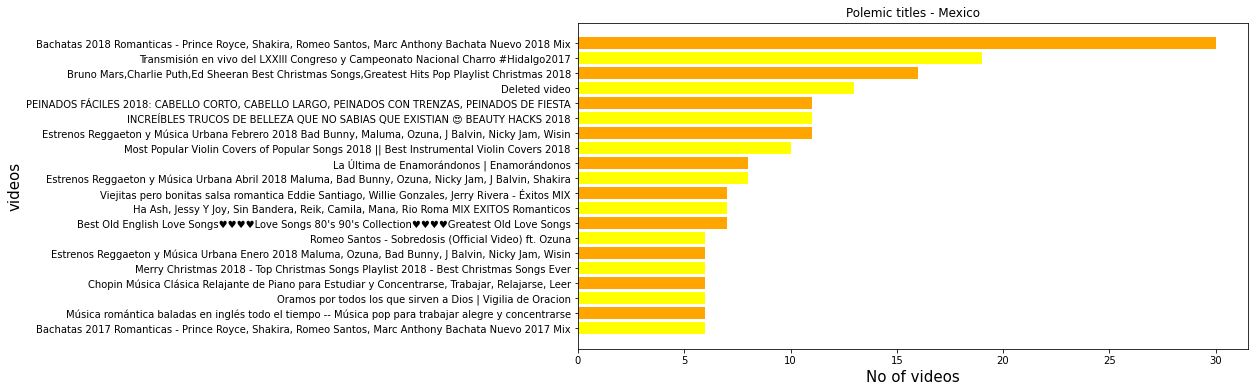

In [335]:
views_videos = polemicoMx.groupby('title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
videos_sort = views_videos.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(videos_sort['title'], videos_sort['views'],color=['yellow','orange'])
plt.xlabel("No of videos",size=15)
plt.ylabel("videos",size=15)
plt.title("Polemic titles - Mexico")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

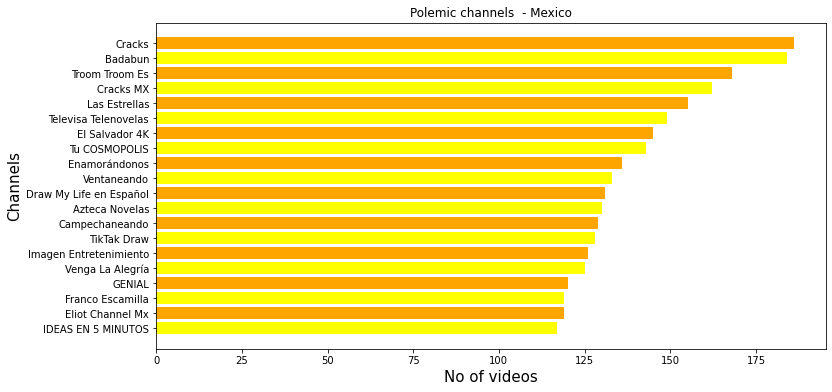

In [267]:
views_channels = polemicoMx.groupby('channel_title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['views'],color=['yellow','orange'])
plt.xlabel("No of videos",size=15)
plt.ylabel("Channels",size=15)
plt.title("Polemic channels  - Mexico")
plt.show

## Seccion especifica

In [268]:
seccionMx = df_mexico[df_canada['category_name'] == 'Film & Animation']
seccionMx.head()

<ipython-input-268-79e239ae5106>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  seccionMx = df_mexico[df_canada['category_name'] == 'Film & Animation']


video_id trending_date  \
12   yhdI98_O-Xc    2017-11-14   
18   KO-QO5QQAyM    2017-11-14   
19   7D-swI6qNLM    2017-11-14   
45   eyskwaltDLs    2017-11-14   
103  62uv76jjUG8    2017-11-14   

                                                 title  \
12   Disney Challenge - feat. Luis Angel Gomez / Mi...   
18   Mexico vs Polonia 1-0 RESUMEN GOLES [Goals-Hig...   
19                          HACKS CON SILICÓN CALIENTE   
45   Terremoto interrumpe una entrevista de TV en d...   
103   Steelers vs. Colts | NFL Week 10 Game Highlights   

                          channel_title  category_id        publish_time  \
12                          Memo Aponte           22 2017-11-13 01:50:12   
18   Central de notícias e esportes CNE           17 2017-11-13 20:40:53   
19                            MaireWink           24 2017-11-13 18:00:01   
45                        RT en Español           25 2017-11-13 11:29:54   
103                                 NFL           17 2017-11-12 21:55:52   

                                                  tags   views  likes  \
12   memo aponte coco|"memo aponte voces"|"memo apo...  127796  13293   
18   México vs Poland 1-0 All Goals & Highlights 20...   39857    233   
19                                              [none]  217025  26934   
45   rt|"rt español"|"irak"|"iraq"|"entrevista"|"tv...   18206    227   
103  NFL|"Football"|"offense"|"defense"|"afc"|"nfc"...  361416   3102   

     dislikes  comment_count    category_name  
12        216           2318   People & Blogs  
18         45            324           Sports  
19        201           1277    Entertainment  
45          2             38  News & Politics  
103       110            799           Sports

<function matplotlib.pyplot.show(close=None, block=None)>

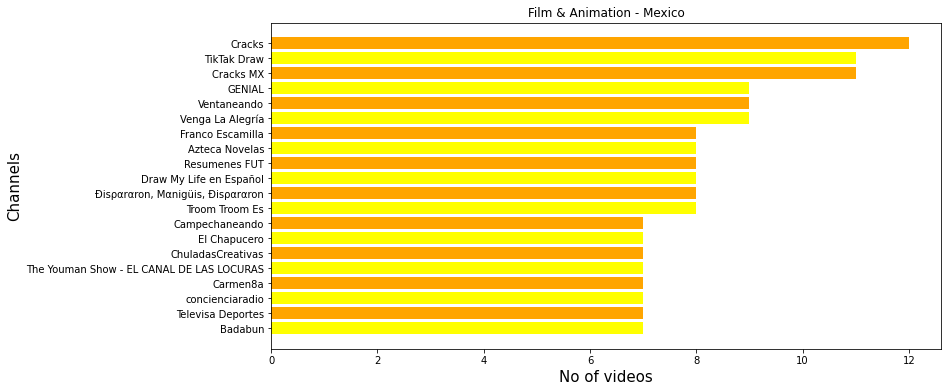

In [269]:
views_channels = seccionMx.groupby('channel_title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['views'],color=['yellow','orange'])
plt.xlabel("No of videos",size=15)
plt.ylabel("Channels",size=15)
plt.title("Film & Animation - Mexico")
plt.show

## Mejor rango de duracion de video

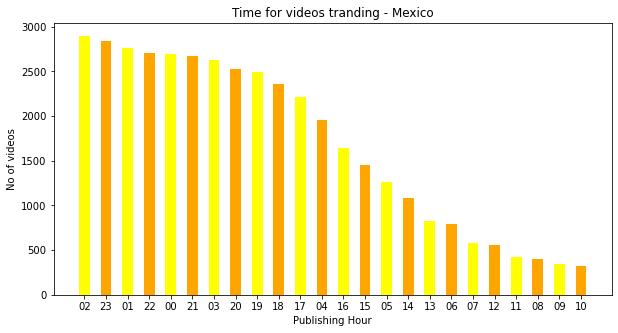

In [270]:
hour = polemicoMx.publish_time.apply(lambda x: x.strftime("%H"))
total_dict=(hour.value_counts().to_dict())
count= pd.DataFrame(list(total_dict.items()),columns = ['Publishing Hour', 'No of videos'])
fig=plt.figure(figsize=(10,5))
plt.bar(count['Publishing Hour'],count['No of videos'],color=['yellow','orange'],width=0.5)
plt.xlabel("Publishing Hour")
plt.ylabel("No of videos")
plt.title("Time for videos tranding - Mexico")
plt.show()

In [349]:
df_mexico['Trending dif_days'] = df_mexico.apply(lambda row: (row.trending_date-row.publish_time).days, axis = 1)
df_mexico.head()

video_id trending_date  \
0  SbOwzAl9ZfQ    2017-11-14   
1  klOV6Xh-DnI    2017-11-14   
2  6L2ZF7Qzsbk    2017-11-14   
3  hcY52MFWMDM    2017-11-14   
4  _OXDcGPVAa4    2017-11-14   

                                               title  \
0                      Capítulo 12 | MasterChef 2017   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2             LOUIS CKAGÓ - EL PULSO DE LA REPÚBLICA   
3   Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4           DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   

              channel_title  category_id        publish_time  \
0           MasterChef 2017           24 2017-11-13 06:06:22   
1  Micky Contreras Martinez           22 2017-11-13 05:11:58   
2  El Pulso De La República           25 2017-11-13 17:00:02   
3                  Casanare           25 2017-11-13 03:47:10   
4                     Musas           26 2017-11-13 19:17:48   

                                                tags   views  likes  dislikes  \
0  MasterChef Junior 2017|"TV Azteca"|"recetas"|"...  310130   4182       361   
1                                    La Voz Mexico 7  104972    271       174   
2  Chumel Torres|"El Pulso de la Republica"|"noti...  136064  10105       266   
3         temblor|"costa rica"|"sismo en costa rica"   96153    378       171   
4  MUSAS|"lesslie"|"karen"|"hacks"|"perros"|"dogs...  499965  57781       681   

   comment_count   categoria_name    category_name  Trending dif_days  
0           1836    Entertainment    Entertainment                  0  
1            369   People & Blogs   People & Blogs                  0  
2            607  News & Politics  News & Politics                  0  
3            208  News & Politics  News & Politics                  0  
4           7428    Howto & Style    Howto & Style                  0

## Tags que podrian posicionarlo mejor

In [350]:
titulo = df_mexico['title'].value_counts(ascending = False).to_frame()
titulo.head(10)

title
Bachatas 2018 Romanticas - Prince Royce, Shakir...     30
Transmisión en vivo del LXXIII Congreso y Campe...     19
Bruno Mars,Charlie Puth,Ed Sheeran Best Christm...     16
Deleted video                                          13
INCREÍBLES TRUCOS DE BELLEZA QUE NO SABIAS QUE ...     11
Estrenos Reggaeton y Música Urbana Febrero 2018...     11
PEINADOS FÁCILES 2018: CABELLO CORTO, CABELLO L...     11
Most Popular Violin Covers of Popular Songs 201...     10
Estrenos Reggaeton y Música Urbana Abril 2018 M...      8
La Última de Enamorándonos | Enamorándonos              8

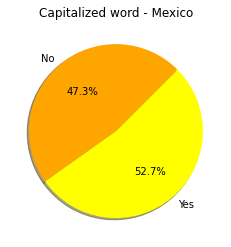

In [271]:
def capitalized_word(title):
    for i in title.split():
        if i.isupper():
            return True
    return False
df_mexico["capitalized"] = df_mexico["title"].apply(capitalized_word)
counts_capitalized = df_mexico["capitalized"].value_counts().to_dict()
plt.pie([counts_capitalized[False], counts_capitalized[True]], labels=['No', 'Yes'], autopct='%1.1f%%', shadow=True, colors=['orange', 'yellow'],startangle=45)
plt.title("Capitalized word - Mexico")
plt.show()

## Caracteristicas titulo video

In [352]:
titulo = df_mexico['tags'].value_counts(ascending = False).to_frame()
titulo.head(5)

tags
[none]                                              7685
4k|"El Salvador"|"El salvador 4k"|"videos"|"pai...   136
TUCOSMOPOLIS|"XPRESS10"|"XPRESSTV"|"INCREIBLE"|...    85
Evangelio del dia|"Oraciones para facebook"|"Or...    85
Estudiando la Biblia|"Palabra de Dios"|"Videos ...    69

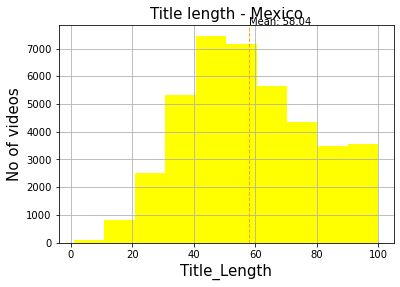

In [272]:
df_mexico["title_length"] = df_mexico["title"].apply(lambda x: len(x))
fig = df_mexico['title_length'].hist(color="yellow")
fig.axvline(df_mexico['title_length'].mean(), color='orange', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
fig.text(df_mexico['title_length'].mean(), max_ylim, 'Mean: {:.2f}'.format(df_mexico['title_length'].mean()))
plt.xlabel("Title_Length",fontsize=15)
plt.ylabel("No of videos",fontsize=15)
plt.title("Title length - Mexico",size=15)
plt.show()

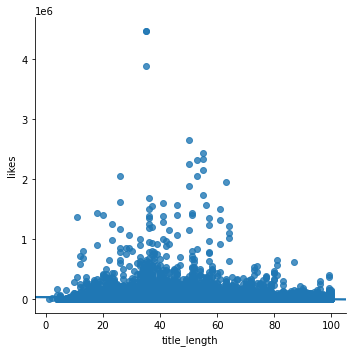

In [354]:
sns.lmplot(x="title_length", y="likes", data = df_mexico)

# RUSIA

In [273]:
rusia = pd.read_csv('RUvideos.csv')
rusia

video_id trending_date  \
0      gDuslQ9avLc      17.14.11   
1      AOCJIFEA_jE      17.14.11   
2      VAWNQDgwwOM      17.14.11   
3      gknkFwKQfHg      17.14.11   
4      3sYvZcwzZr8      17.14.11   
...            ...           ...   
40734  OMmR9THjVKM      18.14.06   
40735  tX7p7NtNVDE      18.14.06   
40736  KAyj5Xm1C64      18.14.06   
40737  4PiSLIrsSiY      18.14.06   
40738  Ehy5foVfKOE      18.14.06   

                                                   title   channel_title  \
0                        Захар и Полина учатся экономить       Т—Ж БОГАЧ   
1                       Биржа Мемов #29. Большой выпуск    Druzhko Show   
2                           ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ            Юлик   
3                             Сочная кесадилья с курицей        Hochland   
4                  КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ        Совергон   
...                                                  ...             ...   
40734  У меня СДВГ! (Story booth на русском) Русская ...    Pastime Time   
40735                    Мои Детские Травмы 2 (анимация)          CaGArt   
40736  [ENG SUB] BTS PROM PARTY 2018 Intro + 2nd Gran...    DaisyxBTS 07   
40737  ОБЗОР ВАННОЙ КОМНАТЫ🛁/ТУАЛЕТНОЙ КОМНАТЫ🚽 + ДЕК...  Ксюша Лебедева   
40738                    Плохой сигнал. Стань человеком!      Tubus Show   

       category_id              publish_time  \
0               22  2017-11-13T09:09:31.000Z   
1               22  2017-11-13T17:32:11.000Z   
2               24  2017-11-13T16:11:31.000Z   
3               22  2017-11-13T06:51:10.000Z   
4               24  2017-11-13T16:52:36.000Z   
...            ...                       ...   
40734           22  2018-06-13T13:47:01.000Z   
40735           23  2018-06-12T09:38:38.000Z   
40736           24  2018-06-13T12:51:23.000Z   
40737           22  2018-06-13T00:23:33.000Z   
40738           29  2018-06-13T09:50:09.000Z   

                                                    tags   views  likes  \
0      захар и полина|"учимся экономить"|"копить день...   62408    334   
1      биржа мемов|"лев шагинян"|"мемы"|"пикчи"|"друж...  330043  43841   
2      юмор|"комедия"|"влог"|"блог"|"смешно"|"смешное...  424596  49854   
3      хохланд|"сыр"|"рецепты"|"как приготовить"|"вку...  112851   3566   
4      Совергон|"Sovergon"|"клипы"|"родители"|"школа"...  243469  36216   
...                                                  ...     ...    ...   
40734  story booth на русском|"story booth перевод"|"...  129488   5893   
40735  кагарт|"каги"|"цагарт"|"гагарт"|"какарт"|"милш...   99163   4659   
40736                                             [none]  449611  24808   
40737  рум тур ванной комнаты|"room tour bathroom"|"д...   14225    793   
40738  плохой сигнал|"тубус шоу"|"reebok"|"стань чело...   52340   7708   

       dislikes  comment_count  \
0           190             50   
1          2244           2977   
2           714           2944   
3           122             80   
4           631           1692   
...         ...            ...   
40734       164            990   
40735       337            692   
40736        93            974   
40737        39            209   
40738       133           1819   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg              False   
1      https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg              False   
2      https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg              False   
3      https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg              False   
4      https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg              False   
...                                               ...                ...   
40734  https://i.ytimg.com/vi/OMmR9THjVKM/default.jpg              False   
40735  https://i.ytimg.com/vi/tX7p7NtNVDE/default.jpg              False   
40736  https://i.ytimg.com/vi/KAyj5Xm1C64/default.jpg              False   
40737  https://i.

In [274]:
rusia = rusia.drop(['thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description'], axis = 1)

In [275]:
rusia['category_name'] = rusia['category_id'].apply(lambda x: dict_categoria.get(x, 'NaN'))

In [276]:
rusia['trending_date'] = pd.to_datetime(pd.Series(rusia['trending_date'].apply(lambda x:'20'+x[0:2]+'.'+x[6:]+'.'+x[3:5])))
rusia['publish_time'] = pd.to_datetime(pd.Series(rusia['publish_time'].apply(lambda x:x[:19])))

In [277]:
df_rusia = rusia.copy()
df_rusia.head()

video_id trending_date                                  title  \
0  gDuslQ9avLc    2017-11-14        Захар и Полина учатся экономить   
1  AOCJIFEA_jE    2017-11-14       Биржа Мемов #29. Большой выпуск   
2  VAWNQDgwwOM    2017-11-14           ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ   
3  gknkFwKQfHg    2017-11-14             Сочная кесадилья с курицей   
4  3sYvZcwzZr8    2017-11-14  КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ   

  channel_title  category_id        publish_time  \
0     Т—Ж БОГАЧ           22 2017-11-13 09:09:31   
1  Druzhko Show           22 2017-11-13 17:32:11   
2          Юлик           24 2017-11-13 16:11:31   
3      Hochland           22 2017-11-13 06:51:10   
4      Совергон           24 2017-11-13 16:52:36   

                                                tags   views  likes  dislikes  \
0  захар и полина|"учимся экономить"|"копить день...   62408    334       190   
1  биржа мемов|"лев шагинян"|"мемы"|"пикчи"|"друж...  330043  43841      2244   
2  юмор|"комедия"|"влог"|"блог"|"смешно"|"смешное...  424596  49854       714   
3  хохланд|"сыр"|"рецепты"|"как приготовить"|"вку...  112851   3566       122   
4  Совергон|"Sovergon"|"клипы"|"родители"|"школа"...  243469  36216       631   

   comment_count   category_name  
0             50  People & Blogs  
1           2977  People & Blogs  
2           2944   Entertainment  
3             80  People & Blogs  
4           1692   Entertainment

In [278]:
df_rusia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40739 entries, 0 to 40738
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   video_id       40739 non-null  object        
 1   trending_date  40739 non-null  datetime64[ns]
 2   title          40739 non-null  object        
 3   channel_title  40739 non-null  object        
 4   category_id    40739 non-null  int64         
 5   publish_time   40739 non-null  datetime64[ns]
 6   tags           40739 non-null  object        
 7   views          40739 non-null  int64         
 8   likes          40739 non-null  int64         
 9   dislikes       40739 non-null  int64         
 10  comment_count  40739 non-null  int64         
 11  category_name  40739 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 3.7+ MB


In [279]:
df_rusia.isnull().sum()

video_id         0
trending_date    0
title            0
channel_title    0
category_id      0
publish_time     0
tags             0
views            0
likes            0
dislikes         0
comment_count    0
category_name    0
dtype: int64

In [280]:
df_rusia.describe(include="object")

video_id                           title   channel_title    tags  \
count     40739                           40739           40739   40739   
unique    34282                           34690            6931   26714   
top      #NAME?  Вот это песня!!! Послушайте!!!  Анатолий Шарий  [none]   
freq        560                              29             197    3984   

         category_name  
count            40739  
unique              17  
top     People & Blogs  
freq             10350

In [281]:
df_rusia['category_name'].unique()

array(['People & Blogs', 'Entertainment', 'Science & Technology',
       'Comedy', 'Education', 'Sports', 'Autos & Vehicles',
       'News & Politics', 'Pets & Animals', 'Gaming', 'Film & Animation',
       'Shows', 'Howto & Style', 'Music', 'NaN', 'Travel & Events',
       'Movies'], dtype=object)

## Contenido viral

In [282]:
views_mediaRu = df_rusia['views'].mean() 
print(views_mediaRu)
likes_mediaRu = df_rusia['likes'].mean()
print(likes_mediaRu)
comments_mediaRu = df_rusia['comment_count'].mean()
print(comments_mediaRu)

240715.15071553056
12435.221556739243
1775.231178968556


In [283]:
viralRu = df_rusia[(df_rusia['views'] > views_mediaRu) & (df_rusia['likes'] > likes_mediaRu) & (df_rusia['comment_count'] > comments_mediaRu)]
viralRu.iloc[:50]

video_id trending_date  \
1    AOCJIFEA_jE    2017-11-14   
2    VAWNQDgwwOM    2017-11-14   
5    SLF34Gt_UxQ    2017-11-14   
6    YVcroDDi24s    2017-11-14   
10   3KdggIRWiR0    2017-11-14   
26   JCBl3_780Cc    2017-11-14   
29   qHL7mEzDxhI    2017-11-14   
35   UXkcv-b1EqQ    2017-11-14   
40   UYhP4UHEBhI    2017-11-14   
55   nWcKZtppdbg    2017-11-14   
57   DNzSAY6IuFY    2017-11-14   
58   ulcBhCJotPU    2017-11-14   
105  plyQJ1zW3EE    2017-11-14   
175  U_4BLnJuR3g    2017-11-14   
202  ndLYcaq7VMY    2017-11-15   
203  wOBnq0Ewz5k    2017-11-15   
205  yTV6dGEOU5w    2017-11-15   
207  DNwTXSrQ6AQ    2017-11-15   
209  _yfTrT0UkY8    2017-11-15   
211  kvgZKTJioEQ    2017-11-15   
214  _WLZY6X2EgY    2017-11-15   
220  kgaO45SyaO4    2017-11-15   
227  PCF92nYXtuo    2017-11-15   
234  UUqxsjHjI6w    2017-11-15   
238  AOCJIFEA_jE    2017-11-15   
252  VAWNQDgwwOM    2017-11-15   
336  SLF34Gt_UxQ    2017-11-15   
376  YVcroDDi24s    2017-11-15   
377  6846jSXLg9o    2017-11-15   
405  Vjg9reOLClg    2017-11-16   
407  CeUaopDSfFY    2017-11-16   
408  h-5bMYY5ikY    2017-11-16   
411  GZez_CnwheU    2017-11-16   
412  ndLYcaq7VMY    2017-11-16   
414  wOBnq0Ewz5k    2017-11-16   
415  9UqPRv975Vg    2017-11-16   
430  yTV6dGEOU5w    2017-11-16   
444  oFd8-hRy9lg    2017-11-16   
457  kgaO45SyaO4    2017-11-16   
465  DNwTXSrQ6AQ    2017-11-16   
469  kvgZKTJioEQ    2017-11-16   
559  UJwXcd0nrCo    2017-11-16   
563  UUqxsjHjI6w    2017-11-16   
598  1YEXXIWqkMM    2017-11-16   
602  P_fs5CaScZM    2017-11-17   
603  ENfbS-k5s-U    2017-11-17   
609  fRj34o4hN4I    2017-11-17   
612  Qlv0FvoYlTM    2017-11-17   
614  2A3y8kLdm-s    2017-11-17   
620  xOjlzuWakD4    2017-11-17   

                                                 title         channel_title  \
1                     Биржа Мемов #29. Большой выпуск          Druzhko Show   
2                         ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ                  Юлик   
5           АНОНС / Versus Fresh Blood 4: Война Стилей        versusbattleru   
6         ЗАМОРОЗКА ЧЕЛОВЕКА + 1 К БЕССМЕРТИЮ — ТОПЛЕС                ТОПЛЕС   
10                        Яценюк. НЕпопулист. Вернулся        Анатолий Шарий   
26     Турникмен против Химика. Жим 100 кг на 100 раз!            Body Mania   
29                  КОРОЧЕ ГОВОРЯ, РЕПЕТИТОР - ТимТим.               Tим Тим   
35   ЗАСМЕЯЛСЯ - ПРОИГРАЛ - ПОПРОБУЙ НЕ ЗАСМЕЯТЬСЯ!...                Виндяй   
40   РВАТЬ НА БИТАХ - 495 SQUAD Х CODEKIEV (МЛЕЧНЫЙ...  #SLOVOSPB PRODUCTION   
55                ЭКСПЕРИМЕНТ: РЕАКЦИЯ РЫБКИ на ВАКУУМ          TimOn ChaveS   
57      ЖЕСТКИЕ ПРЯТКИ В ОСОБНЯКЕ | СОБОЛЕВ И МУРАТАЕВ         ChebuRussiaTV   
58                          НОЧЬ ПУГАЮЩАЯ ЗАГАДКА! ТБИ              Anny May   
105  НЕ НУЖНО БЫЛО НАХОДИТЬ ЭТОТ ТЕЛЕФОН... - Simul...               windy31   
175            12 лайфхаков с термоклеем для хендмейда             Трум Трум   
202  Как живет Овечкин в США.  Сергей Полонский п...          ДНЕВНИК ХАЧА   
203     Feduk & Элджей - Розовое вино (Official Video)                 FEDUK   
205        Как мы для Усманова акции Фейсбука покупали     Алексей Навальный   
207           А ТЫ ДОСТОИН? Тор с НАУЧНОЙ точки зрения           Utopia Show   
209  Друже пытается делать САМСУ В ТАНДЫРЕ! До успе...              oblomoff   
211        Lexus LX570 СМЕРТЬ МОТОРА. Лолы больше НЕТ.    Black & White Team   
214                               Как вам промыли мозг        Анатолий Шарий   
220                                   The New SpotMini        BostonDynamics   
227  12 пранков и лайфхаков для школы / Как пронест...             Трум Трум   
234                              Топ10 УМНЫХ Ютуберов!           telblog.net   
238                   Биржа Мемов #29. Большой выпуск          Druzhko Show   
252                       ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ                  Юлик   
336         АНОНС / Versus Fresh Blood 4: Война Стилей        versusbattleru   
376       ЗАМОРОЗКА ЧЕЛОВЕКА + 1 

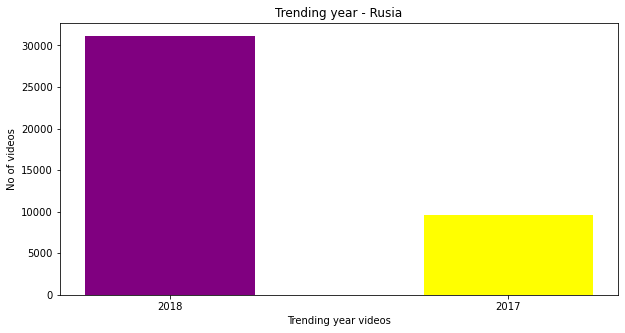

In [284]:
day=df_rusia['trending_date'].dt.strftime('%Y')
total_dict=(day.value_counts()).to_dict()
count= pd.DataFrame(list(total_dict.items()),columns=['Trending year videos','No of videos'])

fig = plt.figure(figsize=(10,5))
plt.bar(count['Trending year videos'], count['No of videos'],color=['purple', 'yellow'], width=0.5)
plt.xlabel("Trending year videos")
plt.ylabel("No of videos")
plt.title("Trending year - Rusia")
plt.show()

<AxesSubplot:title={'center':'Contenido viral - Rusia'}>

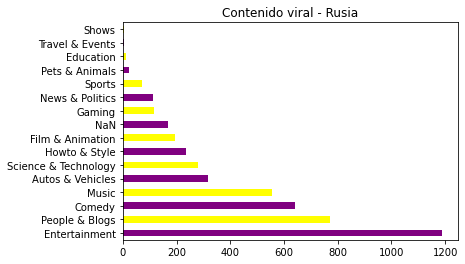

In [426]:
categoria = viralRu['category_name'].value_counts()
categoria.plot(kind='barh', title="Contenido viral - Rusia",color=['purple','yellow'])

<ipython-input-285-50d04cb12ed5>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  b = a['category_name','likes'].max()


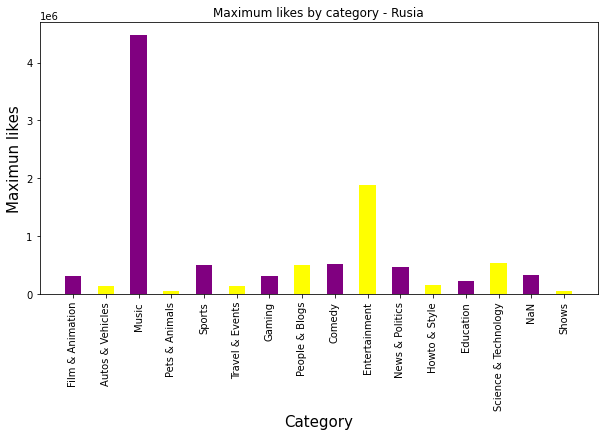

In [285]:
a = viralRu.groupby('category_id')
b = a['category_name','likes'].max()

fig=plt.figure(figsize=(10,5))
plt.bar(b['category_name'],b['likes'],color=['purple','yellow'],width=0.5)
plt.xticks(rotation=90)
plt.xlabel("Category",size=15)
plt.ylabel("Maximun likes",size=15)
plt.title("Maximum likes by category - Rusia")
plt.show()

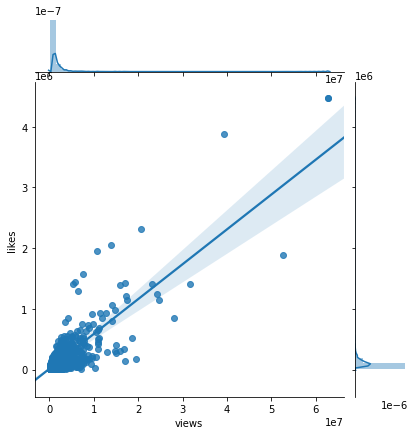

In [369]:
sns.jointplot(x='views', y='likes', data=viralRu,kind='reg')


#### Mostrar los principales canales

<function matplotlib.pyplot.show(close=None, block=None)>

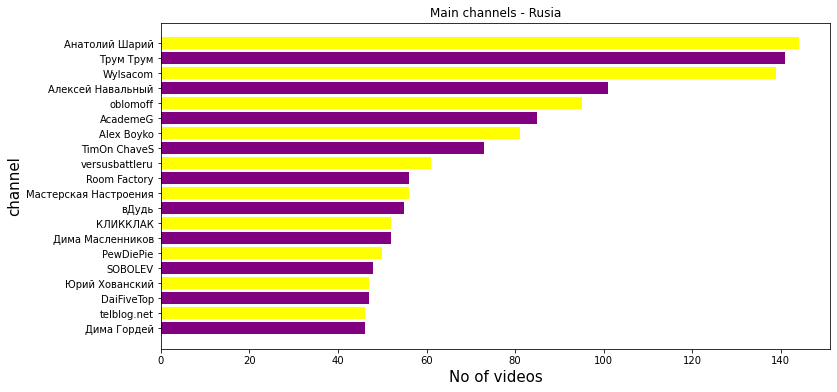

In [286]:
views_channels = viralRu.groupby('channel_title').size().reset_index(name="video_count").sort_values("video_count", ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('video_count')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['video_count'],color=['purple','yellow'])
plt.xlabel("No of videos",size=15)
plt.ylabel("channel",size=15)
plt.title("Main channels - Rusia")
plt.show

## Contenido polémico

In [287]:
polemicoRu = df_rusia.sort_values(by = 'views', ascending = False)
polemicoRu.iloc[:50]

video_id trending_date  \
35838  7C2z4GqqS5E    2018-05-20   
35688  7C2z4GqqS5E    2018-05-20   
4833   FlsCjmMhFmw    2017-12-08   
35528  7C2z4GqqS5E    2018-05-19   
16449  BhIEIO0vaBE    2018-02-06   
33377  VYOjWnS4cMY    2018-05-08   
30739  u9Mv98Gr5pY    2018-04-25   
4608   FlsCjmMhFmw    2017-12-07   
23609  tCXGJQYZ9JA    2018-03-14   
11844  dfnCAmr569k    2018-01-14   
16231  BhIEIO0vaBE    2018-02-05   
2574   kTlv5_Bs8aw    2017-11-26   
35115  84LBjXaeKk4    2018-05-16   
30879  rRr1qiJRsXk    2018-04-25   
28797  DPxL7dO5XPc    2018-04-15   
38318  aJOTlE1K90k    2018-06-02   
19089  xpVfcZ0ZcFM    2018-02-19   
34755  84LBjXaeKk4    2018-05-15   
17005  wbSwFU6tY1c    2018-02-09   
40283  TIE92mUvSsw    2018-06-12   
30005  ffxKSjUwKdU    2018-04-21   
22663  lkfpqGWzHCE    2018-03-09   
16068  Sl9npEDYeLk    2018-02-04   
35445  yDiXQl7grPQ    2018-05-18   
23411  tCXGJQYZ9JA    2018-03-13   
16792  wbSwFU6tY1c    2018-02-08   
33143  VYOjWnS4cMY    2018-05-07   
11603  dfnCAmr569k    2018-01-13   
2220   kTlv5_Bs8aw    2017-11-25   
16637  pVxOVlm_lE8    2018-02-07   
10440  LsoLEjrDogU    2018-01-05   
39297  VY1eFxgRR-k    2018-06-07   
28563  DPxL7dO5XPc    2018-04-14   
32986  Wpm07-BGJnE    2018-05-06   
2037   UceaB4D0jpo    2017-11-24   
28881  9TUBf6l7FBg    2018-04-15   
5704   rRzxEiBLQCA    2017-12-12   
36659  HfRZ67HSDdA    2018-05-25   
31942  IAuzNXGmkL4    2018-05-01   
39488  g4Hbz2jLxvQ    2018-06-08   
19449  qZHycHI3F1Q    2018-02-21   
34476  baODA54mAtc    2018-05-13   
33188  p8npDG2ulKQ    2018-05-07   
30716  ln6yZu03E18    2018-04-24   
16591  wbSwFU6tY1c    2018-02-07   
38541  E5yFcdPAGv0    2018-06-03   
16404  qUmfriZoMw0    2018-02-06   
11865  Mgfe5tIwOj0    2018-01-14   
34144  oSEeK9yDNQI    2018-05-12   
10846  gA-NDZb29I4    2018-01-07   

                                                   title  \
35838                BTS (방탄소년단) 'FAKE LOVE' Official MV   
35688                BTS (방탄소년단) 'FAKE LOVE' Official MV   
4833   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
35528                BTS (방탄소년단) 'FAKE LOVE' Official MV   
16449                                    To Our Daughter   
33377  Childish Gambino - This Is America (Official V...   
30739                      VENOM - Official Trailer (HD)   
4608   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
23609                            Taylor Swift - Delicate   
11844     Taylor Swift - End Game ft. Ed Sheeran, Future   
16231                                    To Our Daughter   
2574   BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...   
35115  Netta - Toy - Israel - LIVE - Grand Final - Eu...   
30879  Sanju | Official Teaser | Ranbir Kapoor | Rajk...   
28797        Lil Pump - ESSKEETIT (Official Music Video)   
38318              Maroon 5 - Girls Like You ft. Cardi B   
19089                                 Drake - God’s Plan   
34755  Netta - Toy - Israel - LIVE - Grand Final - Eu...   
17005                           Falcon Heavy Test Flight   
40283  Dhadak | Official Trailer | Janhvi & Ishaan | ...   
30005               Ariana Grande - No Tears Left To Cry   
22663  Searching for Gender Equality — International ...   
16068  KSI vs Joe Weller – Copper Box Arena February ...   
35445  Do You Hear Yanny or Laurel? (SOLVED with SCIE...   
23411                            Taylor Swift - Delicate   
16792                           Falcon Heavy Test Flight   
33143  Childish Gambino - This Is America (Official V...   
11603     Taylor Swift - End Game ft. Ed Sheeran, Future   
2220   BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...   
16637  Marvel Studios’ Avengers: Infinity War - Big G...   
10440  Bruno Mars - Finesse (Remix) [Feat. Cardi B] [...   
39297                         Selena Gomez - Back To You   
28563        Lil Pump - ESSKEETIT (Official Music Video)   
32986                              Nicki Minaj - Chun-Li   
2037                Post Malone - rockstar ft. 21 Savage   
28881        

<AxesSubplot:title={'center':'Contenido polémico - Rusia'}>

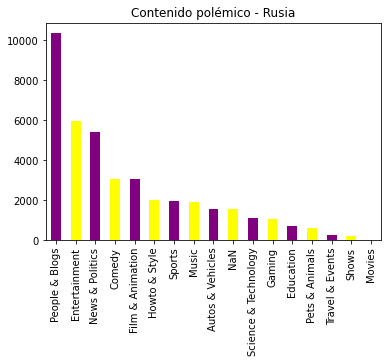

In [288]:
polemicoRu['category_name'].value_counts().plot(kind = "bar", title="Contenido polémico - Rusia", color=['purple','yellow'])

<function matplotlib.pyplot.show(close=None, block=None)>

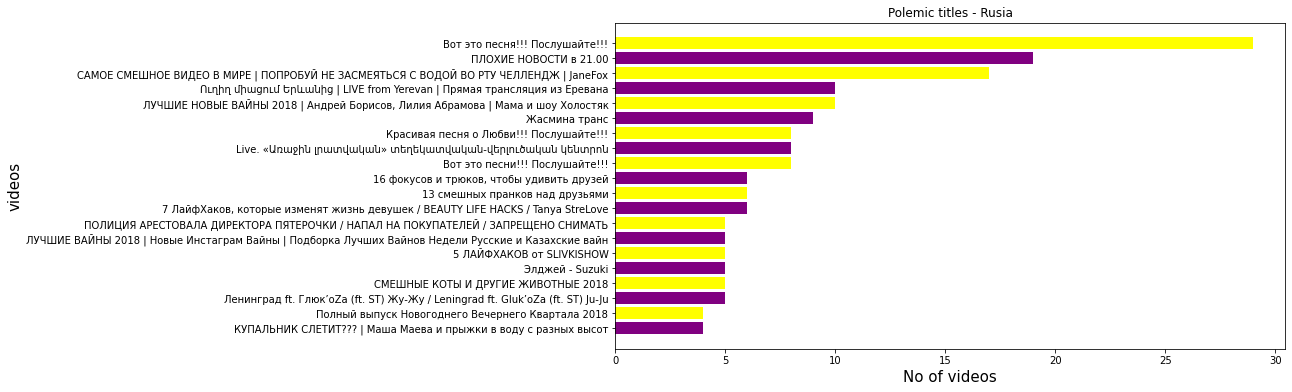

In [289]:
views_videos = polemicoRu.groupby('title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
videos_sort = views_videos.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(videos_sort['title'], videos_sort['views'],color=['purple','yellow'])
plt.xlabel("No of videos",size=15)
plt.ylabel("videos",size=15)
plt.title("Polemic titles - Rusia")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

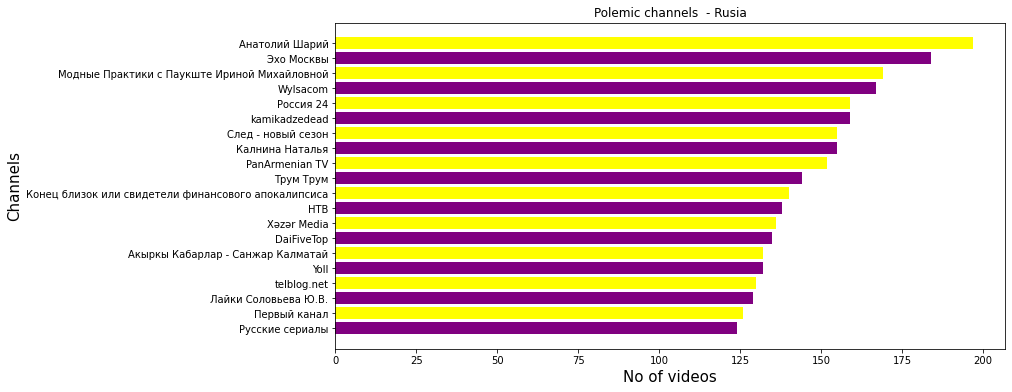

In [291]:
views_channels = polemicoRu.groupby('channel_title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['views'],color=['purple','yellow'])
plt.xlabel("No of videos",size=15)
plt.ylabel("Channels",size=15)
plt.title("Polemic channels  - Rusia")
plt.show

## Seccion especifica

In [292]:
seccionRu = df_rusia[df_rusia['category_name'] == 'Film & Animation']
seccionRu.head()

video_id trending_date  \
25  kK-9T4kcZOY    2017-11-14   
32  YCGNdWqFlBM    2017-11-14   
38  slTrGn2h90Y    2017-11-14   
43  G_GpbL9Y7fM    2017-11-14   
69  q1IyHz7BR2Y    2017-11-14   

                                                title   channel_title  \
25                               Шоу Успех | Выпуск 2             СТС   
32   Клим Жуков про сериалы Троцкий и Демон революции  Dmitry Puchkov   
38                                           13 11 17        Jonny .E   
43  Убийство в Восточном экспрессе – ПРИТОРНЫЙ ФАР...     КИНОКРИТИКА   
69  Նռան հատիկ, Սերիա 46 / Pomegranate seed / Nran...  PanArmenian TV   

    category_id        publish_time  \
25            1 2017-11-13 15:30:03   
32            1 2017-11-13 13:08:54   
38            1 2017-11-13 07:32:26   
43            1 2017-11-13 16:31:27   
69            1 2017-11-13 18:30:01   

                                                 tags   views  likes  \
25  стс|"ctc"|"стс медиа"|"ctc media"|"ctctv"|"стс...   23316    699   
32  goblin|"гоблин"|"дмитрий пучков"|"клим жуков"|...  101402   6304   
38   стеклоногой|"бентли"|"недоумки"|"дорога в школу"   55554     52   
43  убийство в восточном экспрессе|"убийство в вос...   44339   3038   
69  Նռան հատիկ|"Սերիա 46"|"Pomegranate seed"|"Nran...   54031    227   

    dislikes  comment_count     category_name  
25       160            217  Film & Animation  
32       249            863  Film & Animation  
38         7             69  Film & Animation  
43       499            361  Film & Animation  
69        35             72  Film & Animation

<function matplotlib.pyplot.show(close=None, block=None)>

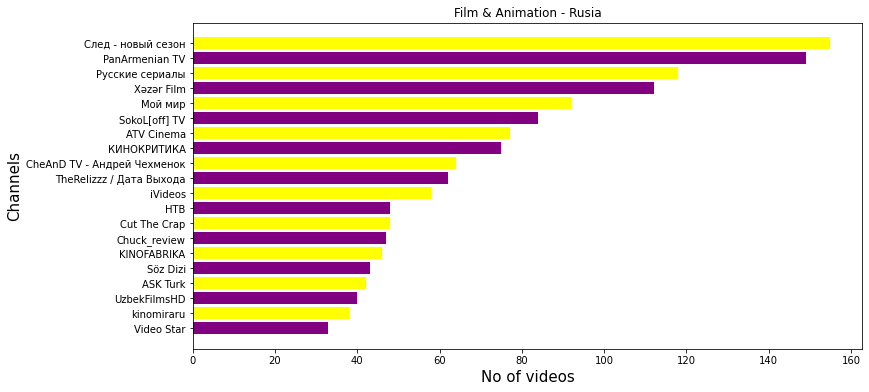

In [293]:
views_channels = seccionRu.groupby('channel_title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['views'],color=['purple','yellow'])
plt.xlabel("No of videos",size=15)
plt.ylabel("Channels",size=15)
plt.title("Film & Animation - Rusia")
plt.show

## Mejor rango de duración de video

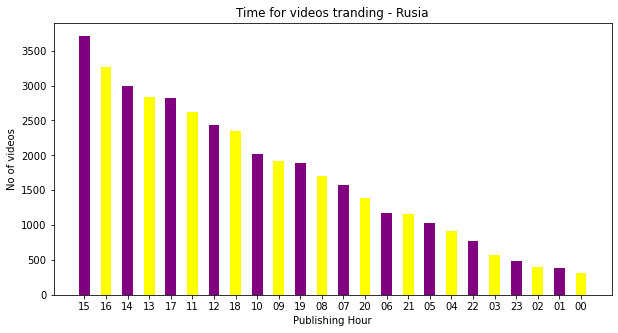

In [294]:
hour = polemicoRu.publish_time.apply(lambda x: x.strftime("%H"))
total_dict=(hour.value_counts().to_dict())
count= pd.DataFrame(list(total_dict.items()),columns = ['Publishing Hour', 'No of videos'])
fig=plt.figure(figsize=(10,5))
plt.bar(count['Publishing Hour'],count['No of videos'],color=['purple','yellow'],width=0.5)
plt.xlabel("Publishing Hour")
plt.ylabel("No of videos")
plt.title("Time for videos tranding - Rusia")
plt.show()

In [378]:
df_rusia['Trending dif_days'] = df_rusia.apply(lambda row: (row.trending_date-row.publish_time).days, axis = 1)
df_rusia.head()

video_id trending_date                                  title  \
0  gDuslQ9avLc    2017-11-14        Захар и Полина учатся экономить   
1  AOCJIFEA_jE    2017-11-14       Биржа Мемов #29. Большой выпуск   
2  VAWNQDgwwOM    2017-11-14           ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ   
3  gknkFwKQfHg    2017-11-14             Сочная кесадилья с курицей   
4  3sYvZcwzZr8    2017-11-14  КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ   

  channel_title  category_id        publish_time  \
0     Т—Ж БОГАЧ           22 2017-11-13 09:09:31   
1  Druzhko Show           22 2017-11-13 17:32:11   
2          Юлик           24 2017-11-13 16:11:31   
3      Hochland           22 2017-11-13 06:51:10   
4      Совергон           24 2017-11-13 16:52:36   

                                                tags   views  likes  dislikes  \
0  захар и полина|"учимся экономить"|"копить день...   62408    334       190   
1  биржа мемов|"лев шагинян"|"мемы"|"пикчи"|"друж...  330043  43841      2244   
2  юмор|"комедия"|"влог"|"блог"|"смешно"|"смешное...  424596  49854       714   
3  хохланд|"сыр"|"рецепты"|"как приготовить"|"вку...  112851   3566       122   
4  Совергон|"Sovergon"|"клипы"|"родители"|"школа"...  243469  36216       631   

   comment_count   category_name  Trending dif_days  
0             50  People & Blogs                  0  
1           2977  People & Blogs                  0  
2           2944   Entertainment                  0  
3             80  People & Blogs                  0  
4           1692   Entertainment                  0

## Tags que podrian posicionarlo mejor

In [379]:
titulo = df_rusia['title'].value_counts(ascending = False).to_frame()
titulo.head(10)

title
Вот это песня!!! Послушайте!!!                         29
ПЛОХИЕ НОВОСТИ в 21.00                                 19
САМОЕ СМЕШНОЕ ВИДЕО В МИРЕ | ПОПРОБУЙ НЕ ЗАСМЕЯ...     17
ЛУЧШИЕ НОВЫЕ ВАЙНЫ 2018 | Андрей Борисов, Лилия...     10
Ուղիղ միացում Երևանից | LIVE from Yerevan | Пря...     10
Жасмина транс                                           9
Красивая песня о Любви!!! Послушайте!!!                 8
Live. «Առաջին լրատվական» տեղեկատվական-վերլուծակ...      8
Вот это песни!!! Послушайте!!!                          8
7 ЛайфХаков, которые изменят жизнь девушек / BE...      6

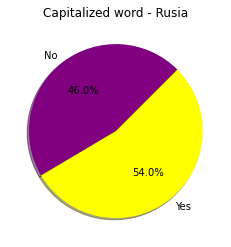

In [295]:
def capitalized_word(title):
    for i in title.split():
        if i.isupper():
            return True
    return False
df_rusia["capitalized"] = df_rusia["title"].apply(capitalized_word)
counts_capitalized = df_rusia["capitalized"].value_counts().to_dict()
plt.pie([counts_capitalized[False], counts_capitalized[True]], labels=['No', 'Yes'], autopct='%1.1f%%', shadow=True, colors=['purple', 'yellow'],startangle=45)
plt.title("Capitalized word - Rusia")
plt.show()

## Caracteristicas titulo video

In [296]:
titulo = df_rusia['tags'].value_counts(ascending = False).to_frame()
titulo.head(5)

tags
[none]                                              3984
шарий|"шарий блог"|"новое видео шарий"|"шарий н...   182
след                                                 155
камикадзе|"kamikadzedead"|"камикадзе ди"|"kamik...   113
жалбырак|"жалбырак тв"|"акыркы жанылыктар"|"кыр...    91

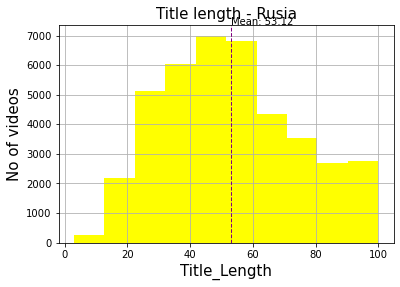

In [297]:
df_rusia["title_length"] = df_rusia["title"].apply(lambda x: len(x))
fig = df_rusia['title_length'].hist(color="yellow")
fig.axvline(df_rusia['title_length'].mean(), color='purple', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
fig.text(df_rusia['title_length'].mean(), max_ylim, 'Mean: {:.2f}'.format(df_rusia['title_length'].mean()))
plt.xlabel("Title_Length",fontsize=15)
plt.ylabel("No of videos",fontsize=15)
plt.title("Title length - Rusia",size=15)
plt.show()

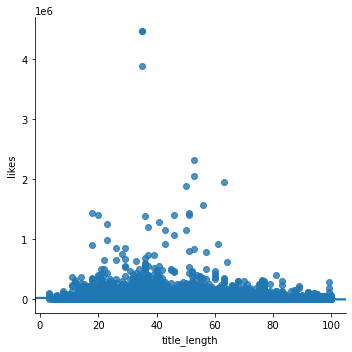

In [383]:
sns.lmplot(x="title_length", y="likes", data = df_rusia)

# USA

In [298]:
usa = pd.read_csv('USvideos.csv')
usa

video_id trending_date  \
0      2kyS6SvSYSE      17.14.11   
1      1ZAPwfrtAFY      17.14.11   
2      5qpjK5DgCt4      17.14.11   
3      puqaWrEC7tY      17.14.11   
4      d380meD0W0M      17.14.11   
...            ...           ...   
40944  BZt0qjTWNhw      18.14.06   
40945  1h7KV2sjUWY      18.14.06   
40946  D6Oy4LfoqsU      18.14.06   
40947  oV0zkMe1K8s      18.14.06   
40948  ooyjaVdt-jA      18.14.06   

                                                   title  \
0                     WE WANT TO TALK ABOUT OUR MARRIAGE   
1      The Trump Presidency: Last Week Tonight with J...   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                       Nickelback Lyrics: Real or Fake?   
4                               I Dare You: GOING BALD!?   
...                                                  ...   
40944                       The Cat Who Caught the Laser   
40945                         True Facts : Ant Mutualism   
40946  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
40947                How Black Panther Should Have Ended   
40948  Official Call of Duty®: Black Ops 4 — Multipla...   

                  channel_title  category_id              publish_time  \
0                  CaseyNeistat           22  2017-11-13T17:13:01.000Z   
1               LastWeekTonight           24  2017-11-13T07:30:00.000Z   
2                  Rudy Mancuso           23  2017-11-12T19:05:24.000Z   
3         Good Mythical Morning           24  2017-11-13T11:00:04.000Z   
4                      nigahiga           24  2017-11-12T18:01:41.000Z   
...                         ...          ...                       ...   
40944             AaronsAnimals           15  2018-05-18T13:00:04.000Z   
40945                  zefrank1           22  2018-05-18T01:00:06.000Z   
40946                Brad Mondo           24  2018-05-18T17:34:22.000Z   
40947  How It Should Have Ended            1  2018-05-17T17:00:04.000Z   
40948              Call of Duty           20  2018-05-17T17:09:38.000Z   

                                                    tags     views   likes  \
0                                        SHANtell martin    748374   57527   
1      last week tonight trump presidency|"last week ...   2418783   97185   
2      racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146033   
3      rhett and link|"gmm"|"good mythical morning"|"...    343168   10172   
4      ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095731  132235   
...                                                  ...       ...     ...   
40944  aarons animals|"aarons"|"animals"|"cat"|"cats"...   1685609   38160   
40945                                             [none]   1064798   60008   
40946  I gave safiya nygaard a perfect hair makeover ...   1066451   48068   
40947  Black Panther|"HISHE"|"Marvel"|"Infinity War"|...   5660813  192957   
40948      call of duty|"cod"|"activision"|"Black Ops 4"  10306119  357079   

       dislikes  comment_count  \
0          2966          15954   
1          6146          12703   
2          5339           8181   
3           666           2146   
4          1989          17518   
...         ...            ...   
40944      1385           2657   
40945       382           3936   
40946      1032           3992   
40947      2846          13088   
40948    212976         144795   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg              False   
1      https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg              False   
2      https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg              False   
3      https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg              False   
4      https://i.ytimg.com/vi/d380meD0W0M/default.jpg              False   
...                                               ...                ...   
40944  https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg              False   
40945  https:

In [299]:
usa = usa.drop(['thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description'], axis = 1)

In [300]:
usa['category_name'] = usa['category_id'].apply(lambda x: dict_categoria.get(x, 'NaN'))

In [301]:
usa['trending_date'] = pd.to_datetime(pd.Series(usa['trending_date'].apply(lambda x:'20'+x[0:2]+'.'+x[6:]+'.'+x[3:5])))
usa['publish_time'] = pd.to_datetime(pd.Series(usa['publish_time'].apply(lambda x:x[:19])))

In [302]:
df_usa = usa.copy()
df_usa.head()

video_id trending_date  \
0  2kyS6SvSYSE    2017-11-14   
1  1ZAPwfrtAFY    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   
3  puqaWrEC7tY    2017-11-14   
4  d380meD0W0M    2017-11-14   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id        publish_time  \
0           22 2017-11-13 17:13:01   
1           24 2017-11-13 07:30:00   
2           23 2017-11-12 19:05:24   
3           24 2017-11-13 11:00:04   
4           24 2017-11-12 18:01:41   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count   category_name  
0      2966          15954  People & Blogs  
1      6146          12703   Entertainment  
2      5339           8181          Comedy  
3       666           2146   Entertainment  
4      1989          17518   Entertainment

In [303]:
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   video_id       40949 non-null  object        
 1   trending_date  40949 non-null  datetime64[ns]
 2   title          40949 non-null  object        
 3   channel_title  40949 non-null  object        
 4   category_id    40949 non-null  int64         
 5   publish_time   40949 non-null  datetime64[ns]
 6   tags           40949 non-null  object        
 7   views          40949 non-null  int64         
 8   likes          40949 non-null  int64         
 9   dislikes       40949 non-null  int64         
 10  comment_count  40949 non-null  int64         
 11  category_name  40949 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 3.7+ MB


In [304]:
df_usa.isnull().sum()

video_id         0
trending_date    0
title            0
channel_title    0
category_id      0
publish_time     0
tags             0
views            0
likes            0
dislikes         0
comment_count    0
category_name    0
dtype: int64

In [305]:
df_rusia.describe(include="object")

video_id                           title   channel_title    tags  \
count     40739                           40739           40739   40739   
unique    34282                           34690            6931   26714   
top      #NAME?  Вот это песня!!! Послушайте!!!  Анатолий Шарий  [none]   
freq        560                              29             197    3984   

         category_name  
count            40739  
unique              17  
top     People & Blogs  
freq             10350

In [306]:
df_usa['category_name'].unique()

array(['People & Blogs', 'Entertainment', 'Comedy',
       'Science & Technology', 'Film & Animation', 'News & Politics',
       'Sports', 'Music', 'Pets & Animals', 'Education', 'Howto & Style',
       'Autos & Vehicles', 'Travel & Events', 'Gaming', 'NaN', 'Shows'],
      dtype=object)

## Contenido viral

In [307]:
views_mediaUs = df_usa['views'].mean() 
print(views_mediaUs)
likes_mediaUs = df_usa['likes'].mean()
print(likes_mediaUs)
comments_mediaUs = df_usa['comment_count'].mean()
print(comments_mediaUs)

2360784.6382573447
74266.7024347359
8446.803682629612


In [308]:
viralUs = df_usa[(df_usa['views'] > views_mediaUs) & (df_usa['likes'] > likes_mediaUs) & (df_usa['comment_count'] > comments_mediaUs)]
viralUs.head()

video_id trending_date  \
1   1ZAPwfrtAFY    2017-11-14   
32  n1WpP7iowLc    2017-11-14   
53  9t9u_yPEidY    2017-11-14   
70  2Vv-BfVoq4g    2017-11-14   
98  jp9hK-jY6yY    2017-11-14   

                                                title      channel_title  \
1   The Trump Presidency: Last Week Tonight with J...    LastWeekTonight   
32         Eminem - Walk On Water (Audio) ft. Beyoncé         EminemVEVO   
53  Jennifer Lopez - Amor, Amor, Amor (Official Vi...  JenniferLopezVEVO   
70        Ed Sheeran - Perfect (Official Music Video)         Ed Sheeran   
98      When Someone Has A Crush on You | Lilly Singh     IISuperwomanII   

    category_id        publish_time  \
1            24 2017-11-13 07:30:00   
32           10 2017-11-10 17:00:03   
53           10 2017-11-10 15:00:00   
70           10 2017-11-09 11:04:14   
98           23 2017-11-09 22:21:13   

                                                 tags     views    likes  \
1   last week tonight trump presidency|"last week ...   2418783    97185   
32  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158531   787419   
53  Jennifer Lopez ft. Wisin|"Jennifer Lopez ft. W...   9548677   190083   
70  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634124   
98  iisuperwomanii|"iisuperwomenii"|"superwoman"|"...   3371669   202676   

    dislikes  comment_count  category_name  
1       6146          12703  Entertainment  
32     43420         125882          Music  
53     15015          11473          Music  
70     21082          85067          Music  
98      3394          20086         Comedy

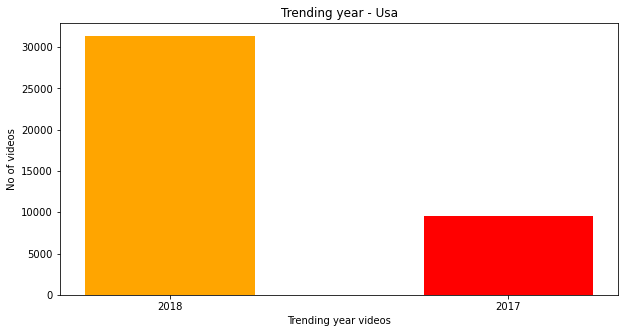

In [309]:
day=df_usa['trending_date'].dt.strftime('%Y')
total_dict=(day.value_counts()).to_dict()
count= pd.DataFrame(list(total_dict.items()),columns=['Trending year videos','No of videos'])

fig = plt.figure(figsize=(10,5))
plt.bar(count['Trending year videos'], count['No of videos'],color=['orange', 'red'], width=0.5)
plt.xlabel("Trending year videos")
plt.ylabel("No of videos")
plt.title("Trending year - Usa")
plt.show()

<AxesSubplot:title={'center':'Contenido viral - Usa'}>

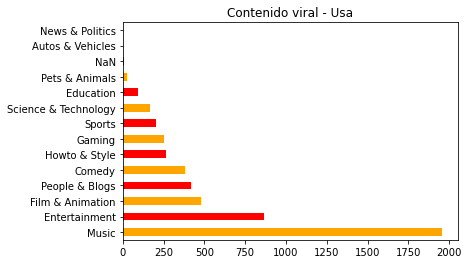

In [400]:
categoria = viralUs['category_name'].value_counts()
categoria.plot(kind='barh', title="Contenido viral - Usa",color=['orange','red'])

<ipython-input-310-de23c6a48eed>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  b = a['category_name','likes'].max()


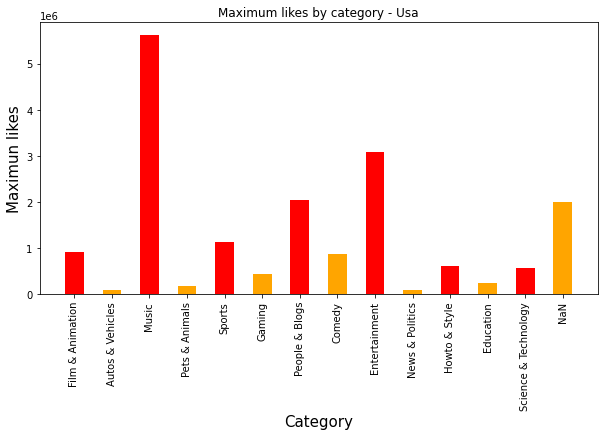

In [310]:
a = viralUs.groupby('category_id')
b = a['category_name','likes'].max()

fig=plt.figure(figsize=(10,5))
plt.bar(b['category_name'],b['likes'],color=['red','orange'],width=0.5)
plt.xticks(rotation=90)
plt.xlabel("Category",size=15)
plt.ylabel("Maximun likes",size=15)
plt.title("Maximum likes by category - Usa")
plt.show()

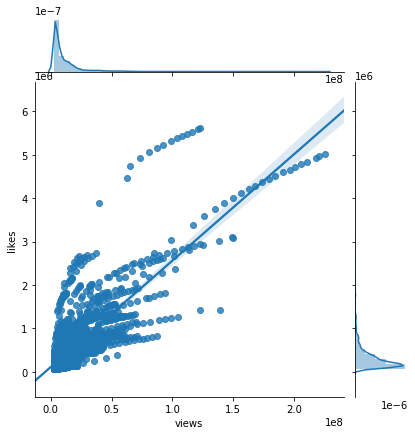

In [402]:
sns.jointplot(x='views', y='likes', data=viralUs,kind='reg')


#### Mostrar los principales canales

<function matplotlib.pyplot.show(close=None, block=None)>

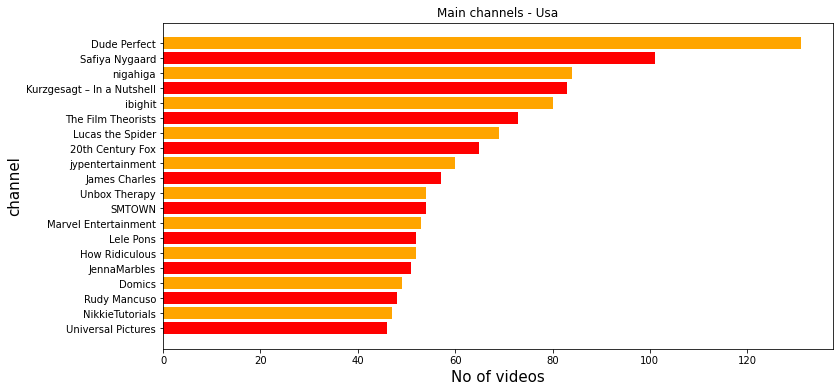

In [311]:
views_channels = viralUs.groupby('channel_title').size().reset_index(name="video_count").sort_values("video_count", ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('video_count')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['video_count'],color=['red','orange'])
plt.xlabel("No of videos",size=15)
plt.ylabel("channel",size=15)
plt.title("Main channels - Usa")
plt.show

## Contenido polémico

In [312]:
polemicoUs = df_usa.sort_values(by = 'views', ascending = False)
polemicoUs.iloc[:50]

video_id trending_date  \
38547  VYOjWnS4cMY    2018-06-02   
38345  VYOjWnS4cMY    2018-06-01   
38146  VYOjWnS4cMY    2018-05-31   
37935  VYOjWnS4cMY    2018-05-30   
37730  VYOjWnS4cMY    2018-05-29   
37531  VYOjWnS4cMY    2018-05-28   
37333  VYOjWnS4cMY    2018-05-27   
37123  VYOjWnS4cMY    2018-05-26   
36913  VYOjWnS4cMY    2018-05-25   
36710  VYOjWnS4cMY    2018-05-24   
36505  VYOjWnS4cMY    2018-05-23   
36301  VYOjWnS4cMY    2018-05-22   
36100  VYOjWnS4cMY    2018-05-21   
35878  VYOjWnS4cMY    2018-05-20   
35675  VYOjWnS4cMY    2018-05-19   
6181   FlsCjmMhFmw    2017-12-14   
34708  ffxKSjUwKdU    2018-05-14   
35474  VYOjWnS4cMY    2018-05-18   
34888  zEf423kYfqk    2018-05-15   
5935   FlsCjmMhFmw    2017-12-13   
35265  VYOjWnS4cMY    2018-05-17   
35057  VYOjWnS4cMY    2018-05-16   
5699   FlsCjmMhFmw    2017-12-12   
38273  7C2z4GqqS5E    2018-06-01   
33748  ffxKSjUwKdU    2018-05-09   
34747  M4ZoCHID9GI    2018-05-14   
38072  7C2z4GqqS5E    2018-05-31   
33546  ffxKSjUwKdU    2018-05-08   
34850  VYOjWnS4cMY    2018-05-15   
37861  7C2z4GqqS5E    2018-05-30   
5452   FlsCjmMhFmw    2017-12-11   
33339  ffxKSjUwKdU    2018-05-07   
37655  7C2z4GqqS5E    2018-05-29   
37453  7C2z4GqqS5E    2018-05-28   
33132  ffxKSjUwKdU    2018-05-06   
33743  zEf423kYfqk    2018-05-09   
37247  7C2z4GqqS5E    2018-05-27   
2587   TyHvyGVs42U    2017-11-26   
32924  ffxKSjUwKdU    2018-05-05   
5236   FlsCjmMhFmw    2017-12-10   
33541  zEf423kYfqk    2018-05-08   
34420  VYOjWnS4cMY    2018-05-13   
37031  7C2z4GqqS5E    2018-05-26   
32718  ffxKSjUwKdU    2018-05-04   
40869  xTlNMmZKwpA    2018-06-14   
33334  zEf423kYfqk    2018-05-07   
36816  7C2z4GqqS5E    2018-05-25   
4997   6ZfuNTqbHE8    2017-12-08   
2365   TyHvyGVs42U    2017-11-25   
4743   6ZfuNTqbHE8    2017-12-07   

                                                   title  \
38547  Childish Gambino - This Is America (Official V...   
38345  Childish Gambino - This Is America (Official V...   
38146  Childish Gambino - This Is America (Official V...   
37935  Childish Gambino - This Is America (Official V...   
37730  Childish Gambino - This Is America (Official V...   
37531  Childish Gambino - This Is America (Official V...   
37333  Childish Gambino - This Is America (Official V...   
37123  Childish Gambino - This Is America (Official V...   
36913  Childish Gambino - This Is America (Official V...   
36710  Childish Gambino - This Is America (Official V...   
36505  Childish Gambino - This Is America (Official V...   
36301  Childish Gambino - This Is America (Official V...   
36100  Childish Gambino - This Is America (Official V...   
35878  Childish Gambino - This Is America (Official V...   
35675  Childish Gambino - This Is America (Official V...   
6181   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
34708               Ariana Grande - No Tears Left To Cry   
35474  Childish Gambino - This Is America (Official V...   
34888  Becky G, Natti Natasha - Sin Pijama (Official ...   
5935   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
35265  Childish Gambino - This Is America (Official V...   
35057  Childish Gambino - This Is America (Official V...   
5699   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
38273                BTS (방탄소년단) 'FAKE LOVE' Official MV   
33748               Ariana Grande - No Tears Left To Cry   
34747     The Weeknd - Call Out My Name (Official Video)   
38072                BTS (방탄소년단) 'FAKE LOVE' Official MV   
33546               Ariana Grande - No Tears Left To Cry   
34850  Childish Gambino - This Is America (Official V...   
37861                BTS (방탄소년단) 'FAKE LOVE' Official MV   
5452   YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
33339               Ariana Grande - No Tears Left To Cry   
37655                BTS (방탄소년단) 'FAKE LOVE' Official MV   
37453                BTS (방탄소년단) 'FAKE LOVE' Official MV   
33132               Ariana Grande - No Tears Left To Cry   
33743  Becky 

<AxesSubplot:title={'center':'Contenido polémico - Usa'}>

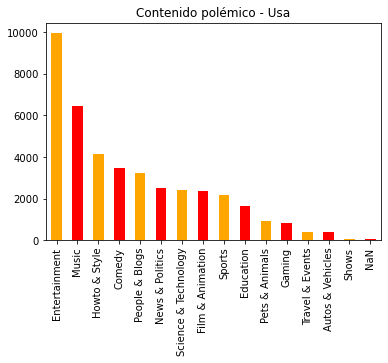

In [313]:
polemicoUs['category_name'].value_counts().plot(kind = "bar", title="Contenido polémico - Usa", color=['orange','red'])

<function matplotlib.pyplot.show(close=None, block=None)>

/Users/learning/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/learning/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/learning/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20523 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/learning/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12304 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/learning/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19981 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/learning/opt/anaconda3/lib/python3.8/site-p

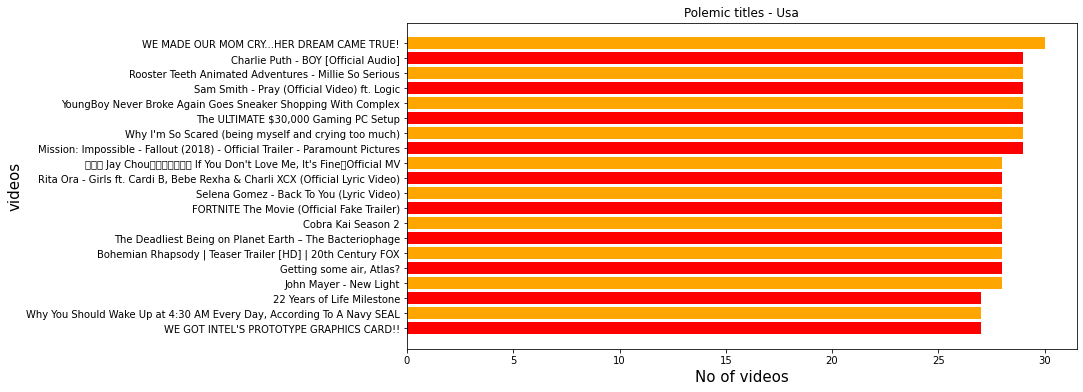

In [314]:
views_videos = polemicoUs.groupby('title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
videos_sort = views_videos.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(videos_sort['title'], videos_sort['views'],color=['red','orange'])
plt.xlabel("No of videos",size=15)
plt.ylabel("videos",size=15)
plt.title("Polemic titles - Usa")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

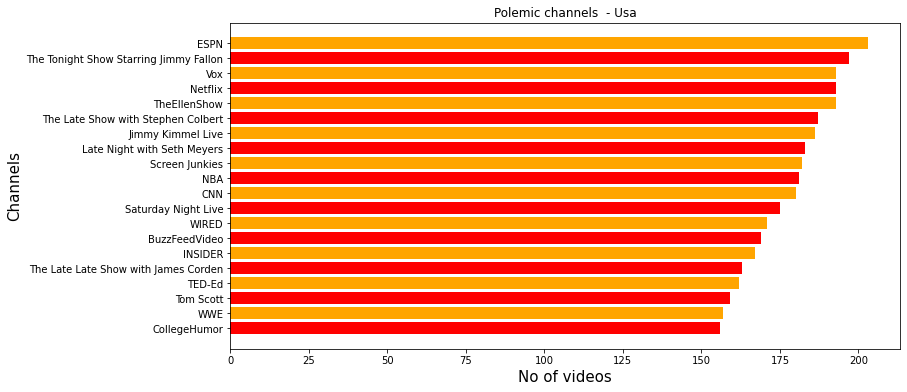

In [315]:
views_channels = polemicoUs.groupby('channel_title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['views'],color=['red','orange'])
plt.xlabel("No of videos",size=15)
plt.ylabel("Channels",size=15)
plt.title("Polemic channels  - Usa")
plt.show

## Seccion especifica

In [330]:
seccionUs = df_usa[df_usa['category_name'] == 'Film & Animation']
seccionUs.head()

video_id trending_date  \
8   jr9QtXwC9vc    2017-11-14   
29  n30k5CwLhS4    2017-11-14   
36  Om_zGhJLZ5U    2017-11-14   
71  UFYCTJlayS4    2017-11-14   
86  fNtLIcyjsnI    2017-11-14   

                                                title     channel_title  \
8   The Greatest Showman | Official Trailer 2 [HD]...  20th Century Fox   
29                            Nick Andopolis: Drummer    FaeryInLoveInc   
36     TL;DW - Every DCEU Movie Before Justice League    Screen Junkies   
71  Top 10 iPhone Apps for Productivity & Content ...     Sara Dietschy   
86  Game Night Official Trailer #1 (2018) Rachel M...        Zero Media   

    category_id        publish_time  \
8             1 2017-11-13 14:00:23   
29            1 2011-05-29 17:03:12   
36            1 2017-11-12 18:00:03   
71            1 2017-11-11 03:56:10   
86            1 2017-11-09 17:11:32   

                                                 tags    views  likes  \
8   Trailer|"Hugh Jackman"|"Michelle Williams"|"Za...   826059   3543   
29  freaks and geeks|"jason segel"|"judd apatow"|"...    50867    715   
36  screenjunkies|"screen junkies"|"sj news"|"hone...   288922   7515   
71  best productivity apps 2017|"best iphone apps ...    52591   2233   
86  Game Night|"2018"|"Jason Bateman"|"Rachel McAd...  1751064  16430   

    dislikes  comment_count     category_name  capitalized  title_length  
8        119            340  Film & Animation         True            65  
29       238            246  Film & Animation        False            23  
36       792           2111  Film & Animation         True            46  
71       187            255  Film & Animation        False            54  
86       945           1231  Film & Animation         True            83

<function matplotlib.pyplot.show(close=None, block=None)>

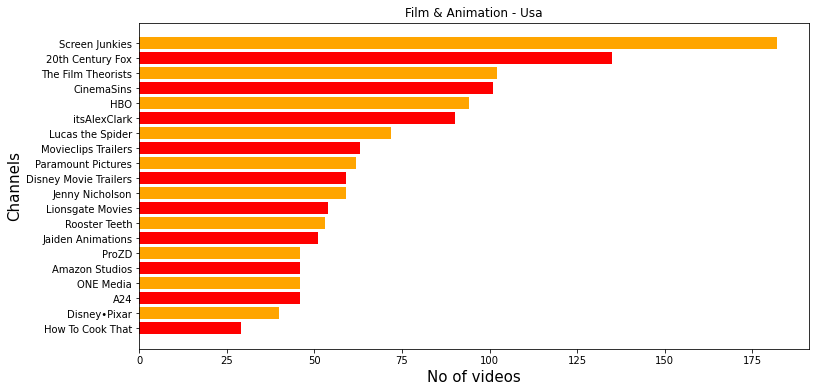

In [333]:
views_channels = seccionUs.groupby('channel_title').size().reset_index(name='views').sort_values('views', ascending=False).head(20)
#print(views_channels)
channels_sort = views_channels.sort_values('views')
fig=plt.figure(figsize=(12,6))
plt.barh(channels_sort['channel_title'], channels_sort['views'],color=['red','orange'])
plt.xlabel("No of videos",size=15)
plt.ylabel("Channels",size=15)
plt.title("Film & Animation - Usa")
plt.show

## Mejor rango de duración de video

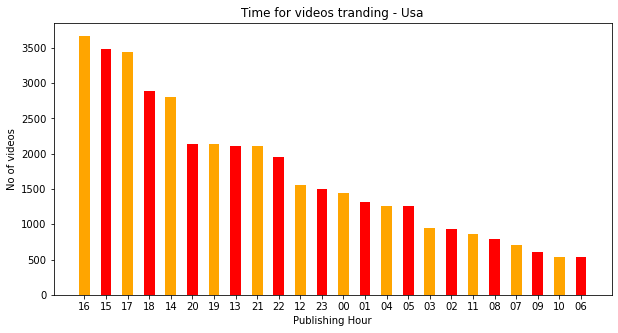

In [318]:
hour = polemicoUs.publish_time.apply(lambda x: x.strftime("%H"))
total_dict=(hour.value_counts().to_dict())
count= pd.DataFrame(list(total_dict.items()),columns = ['Publishing Hour', 'No of videos'])
fig=plt.figure(figsize=(10,5))
plt.bar(count['Publishing Hour'],count['No of videos'],color=['orange','red'],width=0.5)
plt.xlabel("Publishing Hour")
plt.ylabel("No of videos")
plt.title("Time for videos tranding - Usa")
plt.show()

In [412]:
df_usa['Trending dif_days'] = df_usa.apply(lambda row: (row.trending_date-row.publish_time).days, axis = 1)
df_usa.head()

video_id trending_date  \
0  2kyS6SvSYSE    2017-11-14   
1  1ZAPwfrtAFY    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   
3  puqaWrEC7tY    2017-11-14   
4  d380meD0W0M    2017-11-14   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id        publish_time  \
0           22 2017-11-13 17:13:01   
1           24 2017-11-13 07:30:00   
2           23 2017-11-12 19:05:24   
3           24 2017-11-13 11:00:04   
4           24 2017-11-12 18:01:41   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count   category_name  Trending dif_days  
0      2966          15954  People & Blogs                  0  
1      6146          12703   Entertainment                  0  
2      5339           8181          Comedy                  1  
3       666           2146   Entertainment                  0  
4      1989          17518   Entertainment                  1

## Tags que podrian posicionarlo mejor

In [413]:
titulo = df_usa['title'].value_counts(ascending = False).to_frame()
titulo.head(10)

title
WE MADE OUR MOM CRY...HER DREAM CAME TRUE!             30
The ULTIMATE $30,000 Gaming PC Setup                   29
YoungBoy Never Broke Again Goes Sneaker Shoppin...     29
Mission: Impossible - Fallout (2018) - Official...     29
Sam Smith - Pray (Official Video) ft. Logic            29
Charlie Puth - BOY [Official Audio]                    29
Why I'm So Scared (being myself and crying too ...     29
Rooster Teeth Animated Adventures - Millie So S...     29
John Mayer - New Light                                 28
周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's ...     28

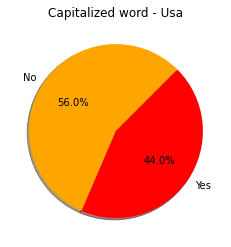

In [319]:
def capitalized_word(title):
    for i in title.split():
        if i.isupper():
            return True
    return False
df_usa["capitalized"] = df_usa["title"].apply(capitalized_word)
counts_capitalized = df_usa["capitalized"].value_counts().to_dict()
plt.pie([counts_capitalized[False], counts_capitalized[True]], labels=['No', 'Yes'], autopct='%1.1f%%', shadow=True, colors=['orange', 'red'],startangle=45)
plt.title("Capitalized word - Usa")
plt.show()

## Caracteristicas titulo video

In [415]:
titulo = df_usa['tags'].value_counts(ascending = False).to_frame()
titulo.head(5)

tags
[none]                                              1535
ABC|"americanidol"|"idol"|"american idol"|"ryan...    87
Jacksfilms|"Jack Douglass"|"YGS"|"YGS 100"|"YGS...    80
James Corden|"The Late Late Show"|"Colbert"|"la...    71
The Late Show|"Stephen Colbert"|"Colbert"|"Late...    66

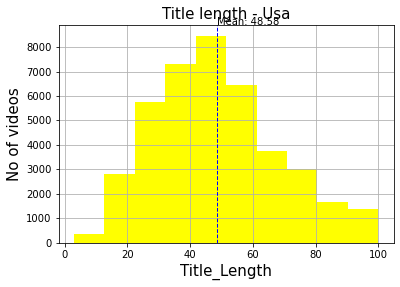

In [320]:
df_usa["title_length"] = df_usa["title"].apply(lambda x: len(x))
fig = df_usa['title_length'].hist(color="yellow")
fig.axvline(df_usa['title_length'].mean(), color='blue', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
fig.text(df_usa['title_length'].mean(), max_ylim, 'Mean: {:.2f}'.format(df_usa['title_length'].mean()))
plt.xlabel("Title_Length",fontsize=15)
plt.ylabel("No of videos",fontsize=15)
plt.title("Title length - Usa",size=15)
plt.show()

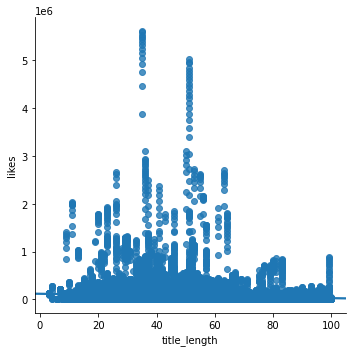

In [418]:
sns.lmplot(x="title_length", y="likes", data = df_usa)

In [339]:
#df_canada

video_id trending_date  \
0      n1WpP7iowLc    2017-11-14   
1      0dBIkQ4Mz1M    2017-11-14   
2      5qpjK5DgCt4    2017-11-14   
3      d380meD0W0M    2017-11-14   
4      2Vv-BfVoq4g    2017-11-14   
...            ...           ...   
40876  sGolxsMSGfQ    2018-06-14   
40877  8HNuRNi8t70    2018-06-14   
40878  GWlKEM3m2EE    2018-06-14   
40879  lbMKLzQ4cNQ    2018-06-14   
40880  POTgw38-m58    2018-06-14   

                                                   title     channel_title  \
0             Eminem - Walk On Water (Audio) ft. Beyoncé        EminemVEVO   
1                          PLUSH - Bad Unboxing Fan Mail         iDubbbzTV   
2      Racist Superman | Rudy Mancuso, King Bach & Le...      Rudy Mancuso   
3                               I Dare You: GOING BALD!?          nigahiga   
4            Ed Sheeran - Perfect (Official Music Video)        Ed Sheeran   
...                                                  ...               ...   
40876                       HOW2: How to Solve a Mystery   Annoying Orange   
40877                   Eli Lik Lik Episode 13 Partie 01  Elhiwar Ettounsi   
40878  KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...    Kingdom Hearts   
40879                   Trump Advisor Grovels To Trudeau   The Young Turks   
40880                   【完整版】遇到恐怖情人該怎麼辦？2018.06.13小明星大跟班          我愛小明星大跟班   

       category_id        publish_time  \
0               10 2017-11-10 17:00:03   
1               23 2017-11-13 17:00:00   
2               23 2017-11-12 19:05:24   
3               24 2017-11-12 18:01:41   
4               10 2017-11-09 11:04:14   
...            ...                 ...   
40876           24 2018-06-13 18:00:07   
40877           24 2018-06-13 19:01:18   
40878           20 2018-06-11 17:30:53   
40879           25 2018-06-13 04:00:05   
40880           24 2018-06-13 16:00:03   

                                                    tags     views    likes  \
0      Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1      plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2      racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3      ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4      edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   
...                                                  ...       ...      ...   
40876  annoying orange|"funny"|"fruit"|"talking"|"ani...     80685     1701   
40877  hkayet tounsia|"elhiwar ettounsi"|"denya okhra...    103339      460   
40878  Kingdom Hearts|"KH3"|"Kingdom Hearts 3"|"Froze...    773347    25900   
40879  180612__TB02SorryExcuse|"News"|"Politics"|"The...    115225     2115   
40880  吳宗憲|"吳姍儒"|"小明星大跟班"|"Sandy"|"Jacky wu"|"憲哥"|"中天...    107392      300   

       dislikes  comment_count    category_name  Trending dif_days  \
0         43420         125882            Music                  3   
1          1688          13030           Comedy                  0   
2          5339           8181           Comedy                  1   
3          1989          17518    Entertainment                  1   
4         21082          85067            Music                  4   
...         ...            ...              ...                ...   
40876        99           1312    Entertainment                  0   
40877        66             51    Entertainment                  0   
40878       224           3881           Gaming                  2   
40879       182           1672  News & Politics                  0   
40880        62            251    Entertainment                  0   

       capitalized  title_length  
0            False            42  
1             True            29  
2            False            53  
3             True            24  
4            False            43  
...            ...           ...  
40876         True            28  
40877        False            32  
40878         True            